<a href="https://colab.research.google.com/github/VenkataSairamMandapati/Combine-Data-Cleaning-Feature-Selection-Modeling-and-Interpretability-into-one-report/blob/main/VenkatS_Marketting_Campaign_Feature_Engineering__Modeling_Interpretability_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Venkata Sairam Mandapati

NU ID : 002768738

# Marketting Campaign_Combine Data Cleaning, Feature Selection, Modeling and Interpretability into one report

# Abstract

Market Sales data contains customer specific information about a customers details like age, income and shopping habits like amount spent, website visits etc. We aim to find if a customer will repond positively to a marketting campaign or not. Various techniques are used to explore data like correlation heatmaps and boxplots, Q-Q plots etc. Finally a logistic regression model is built to predict customer response. It appears that only some columns were of significance while predicting dependent variable. Different impute methods and their effectiveness is explored. Further Linear, Tree based and AutoML models are compared and interpreted using various model interpretability methods. Using AutoML we aim to find the best classification model. Use Regularization to check if model improved or not and try tuning hyperparameters for best results. We also check the relationships we get between multivariate models and if the models make sense.

## About Dataset - Marketing Campaign

**Context**

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

**Content**

1. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
2. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
3. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
4. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
5. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
6. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
7. Complain - 1 if customer complained in the last 2 years
8. DtCustomer - date of customer’s enrolment with the company
9. Education - customer’s level of education
10. Marital - customer’s marital status
11. Kidhome - number of small children in customer’s household
12. Teenhome - number of teenagers in customer’s household
13. Income - customer’s yearly household income
14. MntFishProducts - amount spent on fish products in the last 2 years
15. MntMeatProducts - amount spent on meat products in the last 2 years
16. MntFruits - amount spent on fruits products in the last 2 years
17. MntSweetProducts - amount spent on sweet products in the last 2 years
18. MntWines - amount spent on wine products in the last 2 years
19. MntGoldProds - amount spent on gold products in the last 2 years
20. NumDealsPurchases - number of purchases made with discount
21. NumCatalogPurchases - number of purchases made using catalogue
22. NumStorePurchases - number of purchases made directly in stores
23. NumWebPurchases - number of purchases made through company’s web site
24. NumWebVisitsMonth - number of visits to company’s web site in the last month
25. Recency - number of days since the last purchase


## Assignment

Combine Data Cleaning, Feature Selection, Modeling, and Interpretability into one report (Every assignment except TMINST) and make it a cohesive readable report.

The focus is readability and clarity.


The following must be answered:

1. What is the question?
2. What did you do?
3. How well did it work?
4. What did you learn?



# Installing Dependencies and Importing Libraries

In [1]:
!pip install eli5
!pip install h2o
!pip install graphviz
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=07274ff3d0ee6633d66b55c43d76fce29700078580443acda50434ff85ce097e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=07745dd2b49cf8df1485b94b11633eef1c3f5d0bbea8ab49e3b8074aab1e3fe5
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

# Data Cleaning and Feature Engineering

In [3]:
#Reading the Marketting campaign Dataset
data = pd.read_csv("https://raw.githubusercontent.com/VenkataSairamMandapati/ML-Data-Cleaning-and-Feature-Selection/main/MARKETING_CAMPAIGN.csv", sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i



Using data.info() we have the following information-


1.   25 integer data types,
2.   3 categorical data type
3.   1 floating point data type


In [4]:
#pandas by default only displays 20 columns max, to view all 28 columns in output we set max_columns to None
pd.options.display.max_columns = None
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [5]:
data[["Education", "Marital_Status","Dt_Customer"]].describe()

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  2012-08-31
freq          1127            864          12

In [6]:
data[["Z_CostContact", "Z_Revenue"]].describe()

Z_CostContact  Z_Revenue
count         2240.0     2240.0
mean             3.0       11.0
std              0.0        0.0
min              3.0       11.0
25%              3.0       11.0
50%              3.0       11.0
75%              3.0       11.0
max              3.0       11.0


Getting a first look at the raw data lets us understand some nature of the data.


1.   Dt_customer represents start date of customer journey, he can be converted to numeric type "customer since" to indicate number of days months or year a customer has been a part
2.   AcceptedCmp variables have 1/0 representing if customer accepted campaign offer before hence they can be treated as categorical yes/no
3. Response is our target prediction variable
4. We have no description of Z_CostContact	Z_Revenue variables in data description. Describing them rreveals they are filled with 11s and 3s and have no real significance hence we will be dropping those for this analysis.


Considered Data Types:-

Column Data type (categorical/numeric)                 

-------      

Year_Birth              int64  numeric

Education               object categorical

Marital_Status          object categorical

Income                 float64 numeric

Kidhome                 int64  numeric

Teenhome                int64  numeric

Dt_Customer             object categorical

Recency                 int64  numeric

MntWines                int64  numeric

MntFruits               int64  numeric

MntMeatProducts         int64  numeric

MntFishProducts         int64  numeric

MntSweetProducts        int64  numeric

MntGoldProds            int64  numeric

NumDealsPurchases       int64  numeric

NumWebPurchases         int64  numeric

NumCatalogPurchases     int64  numeric

NumStorePurchases       int64  numeric

NumWebVisitsMonth       int64  numeric

AcceptedCmp3            int64  categorical

AcceptedCmp4            int64  categorical

AcceptedCmp5            int64  categorical

AcceptedCmp1            int64  categorical

AcceptedCmp2            int64  categorical

Complain                int64  categorical

Response                int64  categorical

In [7]:
#Dropping columns
data.drop(columns = ["Z_CostContact","Z_Revenue","ID",],inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

## Null Values

In [8]:
#checking if the any data is missing
percent_missing = data.isnull().sum() * 100 / len(data)
null_values_total = data.isnull().sum()
missing_value_df = pd.DataFrame({
                                 'Missing_Total' : null_values_total,
                                 'percent_missing': percent_missing,
                                 })
missing_value_df

Missing_Total  percent_missing
Year_Birth                       0         0.000000
Education                        0         0.000000
Marital_Status                   0         0.000000
Income                          24         1.071429
Kidhome                          0         0.000000
Teenhome                         0         0.000000
Dt_Customer                      0         0.000000
Recency                          0         0.000000
MntWines                         0         0.000000
MntFruits                        0         0.000000
MntMeatProducts                  0         0.000000
MntFishProducts                  0         0.000000
MntSweetProducts                 0         0.000000
MntGoldProds                     0         0.000000
NumDealsPurchases                0         0.000000
NumWebPurchases                  0         0.000000
NumCatalogPurchases              0         0.000000
NumStorePurchases                0         0.000000
NumWebVisitsMonth                0         0.000000
AcceptedCmp3                     0         0.000000
AcceptedCmp4                     0         0.000000
AcceptedCmp5                     0         0.000000
AcceptedCmp1                     0         0.000000
AcceptedCmp2                     0         0.000000
Complain                         0         0.000000
Response                         0         0.000000

There are several ways to handle null-values :



1. We can delete the rows containing null-values
2. We can impute the mean value
3. We can input the mean value of a specific population : in this case we would split by Education
4. We can use a model to predict missing values


With our dataset, we will fill missing values of Income by mean of Eduction

In [9]:
data['Income'].fillna(data.groupby('Education')['Income'].transform('mean'), inplace = True)

In [10]:
#checking if the any data is missing
percent_missing = data.isnull().sum() * 100 / len(data)
null_values_total = data.isnull().sum()
missing_value_df = pd.DataFrame({
                                 'Missing_Total' : null_values_total,
                                 'percent_missing': percent_missing,
                                 })
missing_value_df

Missing_Total  percent_missing
Year_Birth                       0              0.0
Education                        0              0.0
Marital_Status                   0              0.0
Income                           0              0.0
Kidhome                          0              0.0
Teenhome                         0              0.0
Dt_Customer                      0              0.0
Recency                          0              0.0
MntWines                         0              0.0
MntFruits                        0              0.0
MntMeatProducts                  0              0.0
MntFishProducts                  0              0.0
MntSweetProducts                 0              0.0
MntGoldProds                     0              0.0
NumDealsPurchases                0              0.0
NumWebPurchases                  0              0.0
NumCatalogPurchases              0              0.0
NumStorePurchases                0              0.0
NumWebVisitsMonth                0              0.0
AcceptedCmp3                     0              0.0
AcceptedCmp4                     0              0.0
AcceptedCmp5                     0              0.0
AcceptedCmp1                     0              0.0
AcceptedCmp2                     0              0.0
Complain                         0              0.0
Response                         0              0.0

## Numeric data distribution

In [11]:
data.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2240.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52253.592375     0.444196     0.506250    49.109375   
std      11.984069   25039.085601     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35538.750000     0.000000     0.000000    24.000000   
50%    1970.000000   51609.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68289.750000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2240.000000   2240.000000        2240.000000      2240.000000   
mean          27.062946     44.021875           2.325000         4.084821   
std           41.280498     52.167439           1.932238         2.778714   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           33.000000     56.000000           3.000000         6.000000   
max          263.000000    362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2240.000000        2240.000000        2240.000000   
mean              2.662054           5.790179           5.316518   
std               2.923101           3.250958           2.426645   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   
mean       0.072768      0.074554      0.072768      0.064286      0.013393   
std        0.259813      0.262728      0.259813      0.245316      0.114976   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Complain     Response  
count  2240.000000  2240.000000  
mean      0.009375     0.149107  
std       0.096391     0.356274  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000

[Text(0, 0, 'MntWines'),
 Text(1, 0, 'MntFruits'),
 Text(2, 0, 'MntMeatProducts'),
 Text(3, 0, 'MntFishProducts'),
 Text(4, 0, 'MntSweetProducts'),
 Text(5, 0, 'MntGoldProds')]

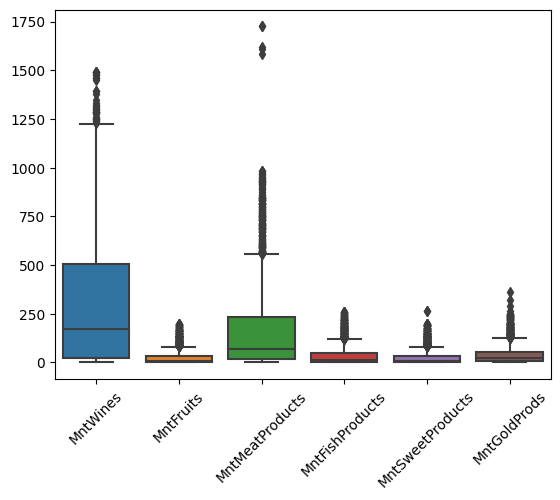

In [12]:
data_f=data[["MntWines",	"MntFruits"	,"MntMeatProducts",	"MntFishProducts","MntSweetProducts",	"MntGoldProds"]]
x = sns.boxplot(data=data_f)
x.set_xticklabels(x.get_xticklabels(),rotation=45)


data.describe() gives us an estimate of the numeric distribution of data


1. Average age of customers is 51 with median being 50 with max being 127 which I think is a rare case
2. Average income is 52253 with min and max being 1730 and 666666 indicating presence of outliers
3. Recency ranges between 0 and 99 indicating all customers surveyed were very active in within last 4 months
4. Amount spent on Wines and Meat is the most indicating thats where the majority sales lies
5. Number of items purchased is usually higher in stores
6. Almost all columns in the data need to be normalized as there is a vast difference in range of values of all columns



<Axes: xlabel='Education', ylabel='Income'>

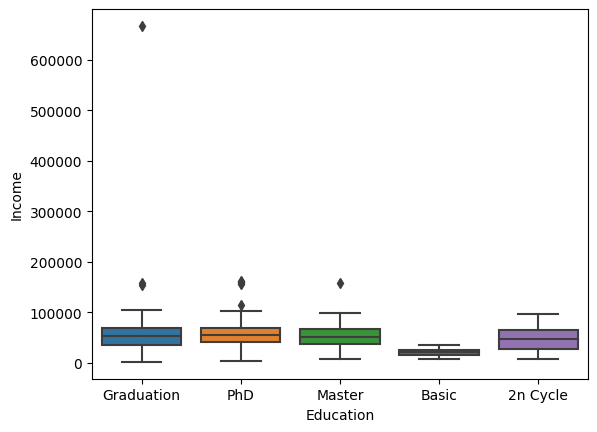

In [13]:
sns.boxplot( x = 'Education',y = 'Income', data = data)

Plotting Income grouped by education shows very less correlation between income and education for all educational categories except Basic which has very low Income.

Notice we have ommited outliers to get a better visual representation of the boxplot

In [14]:
print(data['Income'].quantile(0.99))

94437.68000000001


<Axes: xlabel='Marital_Status', ylabel='Income'>

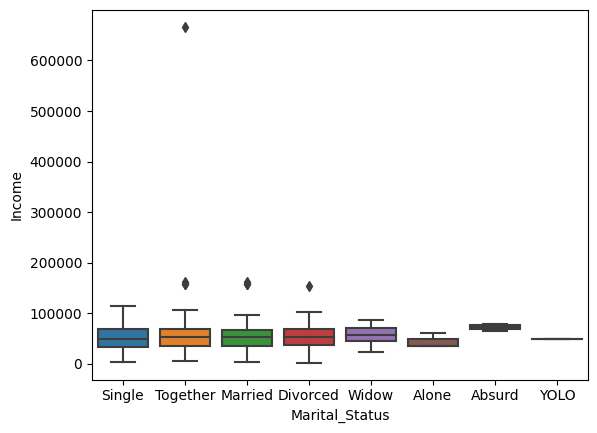

In [15]:
sns.boxplot( x = 'Marital_Status',y = 'Income', data = data)

## Data Transformation

<ipython-input-16-e4de275c286c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


<Axes: >

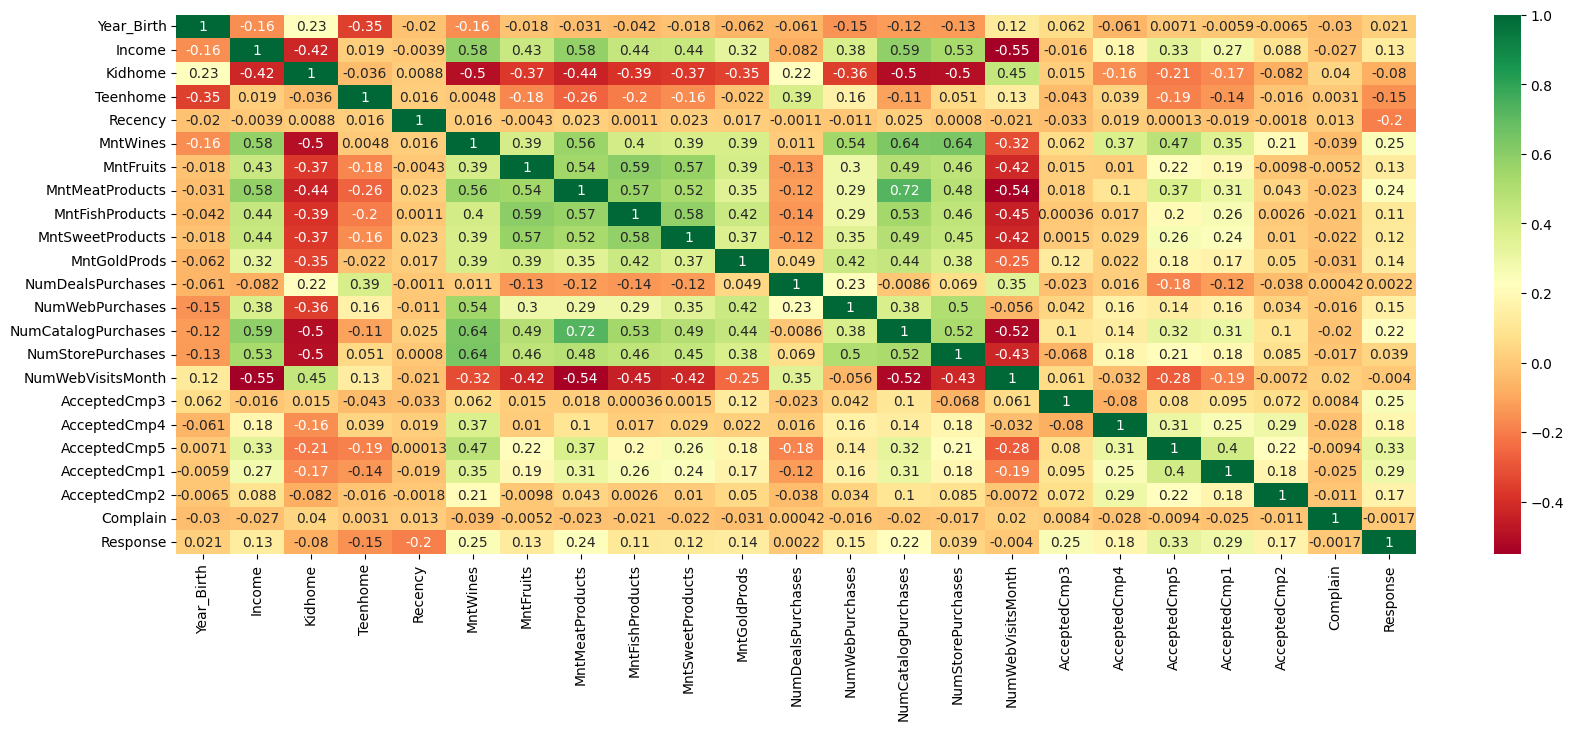

In [16]:
#The heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

Above Correlation shows there are very few variables closely related.
1. All Number of purchases are above 0.5 and seem to be closely related
2. Similarly all amount purchased columns are also slightly closely related and can be grouped to denote one feature

In [17]:
# Converting birth year to age, considering age with respect to year 2020 because the data was last updated 3 years ago
data['Year_Birth'] = data['Year_Birth'].apply(lambda x: 2020-x)
data = data.rename(columns={'Year_Birth': 'Age'})
data[['Age']].head()

Age
0   63
1   66
2   55
3   36
4   39

In [18]:
data.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Education is Ordinal type variable.

By Doing some research "2nd Cycle" Eduction type usually represents graduate or masters level education in some countries [Source](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/)

So we transform education in order of education levels


1.   Basic
2.   Graduation
3.   Master / 2nd Cycle
4.   PhD



In [19]:
Education_map = {'Basic':1,
            'Graduation':2,
            'Master':3,
            '2n Cycle':3,
            'PhD':4}
# Create the mapped values in a new column
data['Education'] = data['Education'].map(Education_map)
# Review dataset
data[['Education']].head()

Education
0          2
1          2
2          2
3          2
4          4

Dt_Customer represents how long a person was a customer, thus we convert the date to how many days it has been since a person became a customer of the store

In [20]:
from datetime import datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
data['Dt_Customer'] = (datetime(2020,1,1) - data['Dt_Customer']).dt.days
data[['Dt_Customer']].describe()

Dt_Customer
count  2240.000000
mean   2365.582143
std     202.122512
min    2012.000000
25%    2192.750000
50%    2367.500000
75%    2541.000000
max    2711.000000



1.   Kidhome and Teenhome is combined to total number of children home
2.   All amounts are aggregated to amount spent denoting totoal amount spent by customer till now
3. All orders are clubbed to toal number of orders made by the customer
4. Previous campaign responses are clubbed to total number of campaigns accepted before



In [21]:
data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(columns = ["Kidhome","Teenhome"],inplace = True)

data['AmountSpent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.drop(columns = ["MntWines",	"MntFruits"	,"MntMeatProducts",	"MntFishProducts","MntSweetProducts",	"MntGoldProds"],inplace = True)

data['NumPurchased'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data.drop(columns = ["NumWebPurchases",	"NumCatalogPurchases",	"NumStorePurchases"],inplace = True)

data['Prev_campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data.drop(columns = ["AcceptedCmp3",	"AcceptedCmp4",	"AcceptedCmp5",	"AcceptedCmp1",	"AcceptedCmp2"],inplace = True)

data.head()


Age  Education Marital_Status   Income  Dt_Customer  Recency  \
0   63          2         Single  58138.0         2675       58   
1   66          2         Single  46344.0         2125       38   
2   55          2       Together  71613.0         2324       26   
3   36          2       Together  26646.0         2151       26   
4   39          4        Married  58293.0         2173       94   

   NumDealsPurchases  NumWebVisitsMonth  Complain  Response  Children  \
0                  3                  7         0         1         0   
1                  2                  5         0         0         2   
2                  1                  4         0         0         0   
3                  2                  6         0         0         1   
4                  5                  5         0         0         1   

   AmountSpent  NumPurchased  Prev_campaigns  
0         1617            22               0  
1           27             4               0  
2          776            20               0  
3           53             6               0  
4          422            14               0

<ipython-input-22-e4de275c286c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


<Axes: >

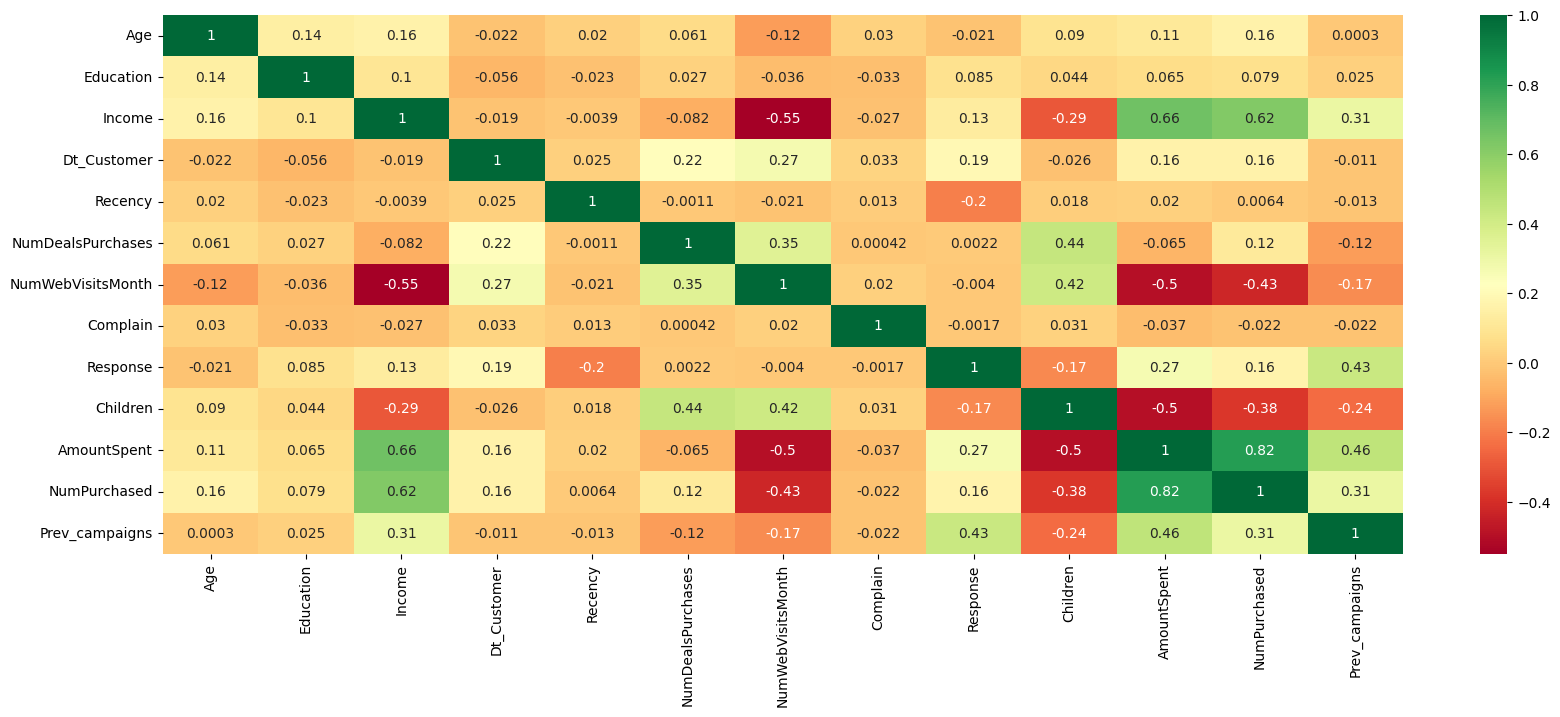

In [22]:
#The heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

Aggregated data abouve shows a close correlation of amount spent and number of orders

In [23]:
data.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Here different marital statuses denote the same thing thus we map them to two categories Couple and Single

In [24]:
maratial_map = {'Married':"Couple",
            'Together':"Couple",
            'Single':'Single',
            'Divorced':'Single',
            'Widow':'Single',
            'Alone':'Single',
            'Absurd':'Single',
            'YOLO':'Single'}
# Create the mapped values in a new column
data['Marital_Status'] = data['Marital_Status'].map(maratial_map)
# Review dataset
data[['Marital_Status']].head()

Marital_Status
0         Single
1         Single
2         Couple
3         Couple
4         Couple

In [25]:
dummy_status = pd.get_dummies(data['Marital_Status'], prefix='Marital_Status')
dummy_status.head()

Marital_Status_Couple  Marital_Status_Single
0                      0                      1
1                      0                      1
2                      1                      0
3                      1                      0
4                      1                      0

Since maratial_status is a categorical column we create dummy variables

In [26]:
data = pd.concat([data, dummy_status], axis=1)
data.drop(['Marital_Status'], axis=1, inplace=True)
data.drop(['Marital_Status_Single'], axis=1, inplace=True)

data

Age  Education   Income  Dt_Customer  Recency  NumDealsPurchases  \
0      63          2  58138.0         2675       58                  3   
1      66          2  46344.0         2125       38                  2   
2      55          2  71613.0         2324       26                  1   
3      36          2  26646.0         2151       26                  2   
4      39          4  58293.0         2173       94                  5   
...   ...        ...      ...          ...      ...                ...   
2235   53          2  61223.0         2393       46                  2   
2236   74          4  64014.0         2031       56                  7   
2237   39          2  56981.0         2167       91                  1   
2238   64          3  69245.0         2168        8                  2   
2239   66          4  52869.0         2634       40                  3   

      NumWebVisitsMonth  Complain  Response  Children  AmountSpent  \
0                     7         0         1         0         1617   
1                     5         0         0         2           27   
2                     4         0         0         0          776   
3                     6         0         0         1           53   
4                     5         0         0         1          422   
...                 ...       ...       ...       ...          ...   
2235                  5         0         0         1         1341   
2236                  7         0         0         3          444   
2237                  6         0         0         0         1241   
2238                  3         0         0         1          843   
2239                  7         0         1         2          172   

      NumPurchased  Prev_campaigns  Marital_Status_Couple  
0               22               0                      0  
1                4               0                      0  
2               20               0                      1  
3                6               0                      1  
4               14               0                      1  
...            ...             ...                    ...  
2235            16               0                      1  
2236            15               1                      1  
2237            18               1                      0  
2238            21               0                      1  
2239             8               0                      1  

[2240 rows x 14 columns]

## Removing Outliers

In [27]:
data.Income.quantile(0.99)

94437.68000000001

In [28]:
data.drop(data[data['Income'] >= 93651].index, inplace = True)

[Text(0, 0, 'Age'),
 Text(1, 0, 'Education'),
 Text(2, 0, 'Income'),
 Text(3, 0, 'Dt_Customer'),
 Text(4, 0, 'Recency'),
 Text(5, 0, 'NumDealsPurchases'),
 Text(6, 0, 'NumWebVisitsMonth'),
 Text(7, 0, 'Complain'),
 Text(8, 0, 'Response'),
 Text(9, 0, 'Children'),
 Text(10, 0, 'AmountSpent'),
 Text(11, 0, 'NumPurchased'),
 Text(12, 0, 'Prev_campaigns'),
 Text(13, 0, 'Marital_Status_Couple')]

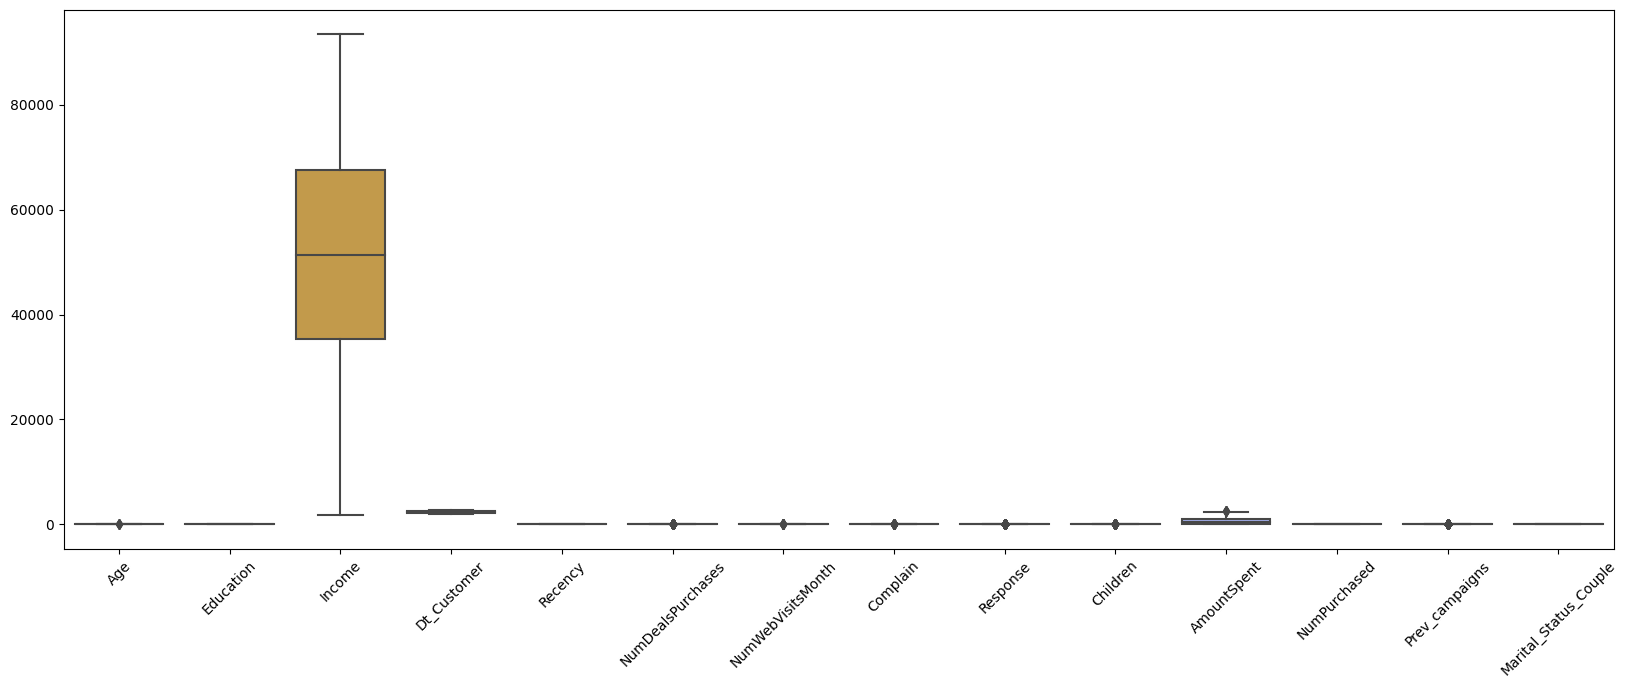

In [29]:
plt.figure(figsize=(20,7))
x = sns.boxplot(data=data)
x.set_xticklabels(x.get_xticklabels(),rotation=45)

In [30]:
from sklearn.linear_model import LogisticRegression

data = data.dropna()
X = data[["Age",	"Education",	"Income",	"Dt_Customer",
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",
                                       "Prev_campaigns",	"Marital_Status_Couple"]]

y = data['Response']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

x_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)
logreg=LogisticRegression()
loggreg_final=logreg.fit(x_train,y_train)
print(loggreg_final.score(x_train,y_train))

0.8564678086237448


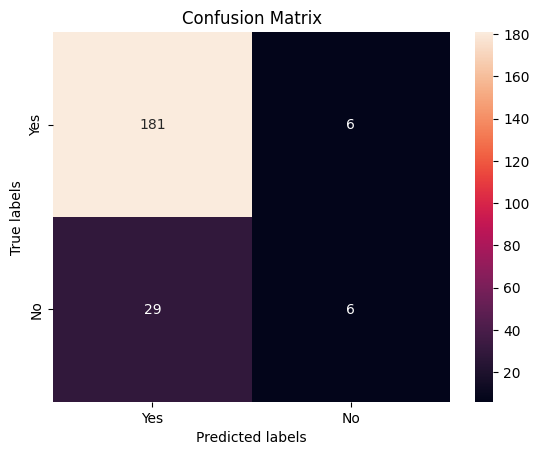

In [31]:
y_pred=logreg.predict(X_test)

cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Yes', 'No']);
ax.yaxis.set_ticklabels(['Yes', 'No']);

In [32]:
print(classification_report(y_test, y_pred))
#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       187
           1       0.50      0.17      0.26        35

    accuracy                           0.84       222
   macro avg       0.68      0.57      0.58       222
weighted avg       0.80      0.84      0.81       222



## Normalization

[Text(0, 0, 'Age'),
 Text(1, 0, 'Education'),
 Text(2, 0, 'Income'),
 Text(3, 0, 'Dt_Customer'),
 Text(4, 0, 'Recency'),
 Text(5, 0, 'NumDealsPurchases'),
 Text(6, 0, 'NumWebVisitsMonth'),
 Text(7, 0, 'Complain'),
 Text(8, 0, 'Response'),
 Text(9, 0, 'Children'),
 Text(10, 0, 'AmountSpent'),
 Text(11, 0, 'NumPurchased'),
 Text(12, 0, 'Prev_campaigns'),
 Text(13, 0, 'Marital_Status_Couple')]

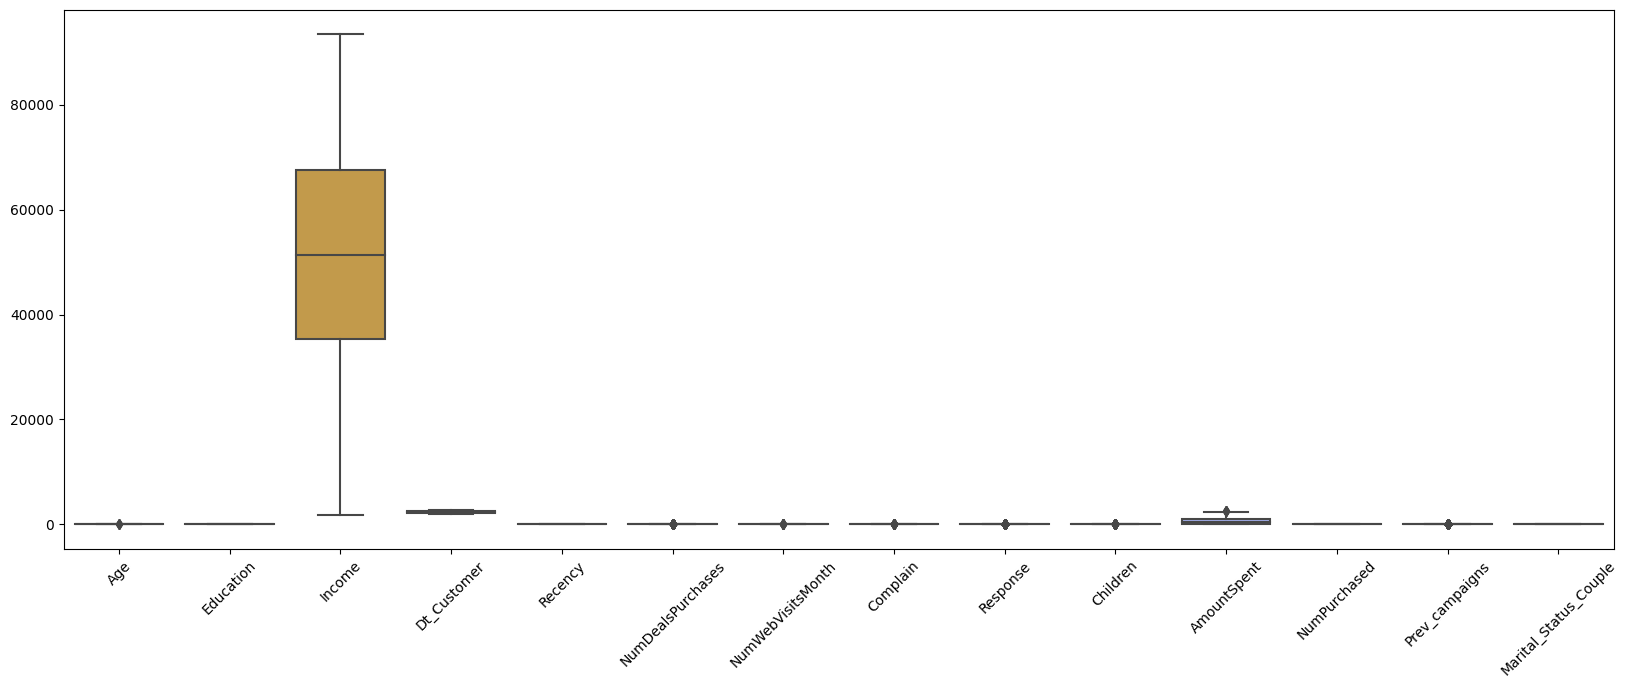

In [33]:
plt.figure(figsize=(20,7))
x = sns.boxplot(data=data)
x.set_xticklabels(x.get_xticklabels(),rotation=45)

Box plot shows Income having outliers and there is a vast difference between range of values between Income and other columns. We need to normalize data so all variables have equal weightage

In [34]:
# from sklearn import preprocessing

# # Create x to store scaled values as floats
# x = data[["Age",	"Education",	"Income",	"Dt_Customer",	"Recency",	"NumDealsPurchases",	"NumWebVisitsMonth",	"Children",	"AmountSpent",	"NumPurchased",	"Prev_campaigns"]].values.astype(float)

# # Preparing for normalizing
# min_max_scaler = preprocessing.MinMaxScaler()

# # Transform the data to fit minmax processor
# x_scaled = min_max_scaler.fit_transform(x)

# # Run the normalizer on the dataframe
# data[["Age",	"Education",	"Income",	"Dt_Customer",	"Recency",	"NumDealsPurchases",	"NumWebVisitsMonth",	"Children",	"AmountSpent",	"NumPurchased",	"Prev_campaigns"]] = pd.DataFrame(x_scaled)

# data.head()

[Text(0, 0, 'Age'),
 Text(1, 0, 'Education'),
 Text(2, 0, 'Income'),
 Text(3, 0, 'Dt_Customer'),
 Text(4, 0, 'Recency'),
 Text(5, 0, 'NumDealsPurchases'),
 Text(6, 0, 'NumWebVisitsMonth'),
 Text(7, 0, 'Complain'),
 Text(8, 0, 'Response'),
 Text(9, 0, 'Children'),
 Text(10, 0, 'AmountSpent'),
 Text(11, 0, 'NumPurchased'),
 Text(12, 0, 'Prev_campaigns'),
 Text(13, 0, 'Marital_Status_Couple')]

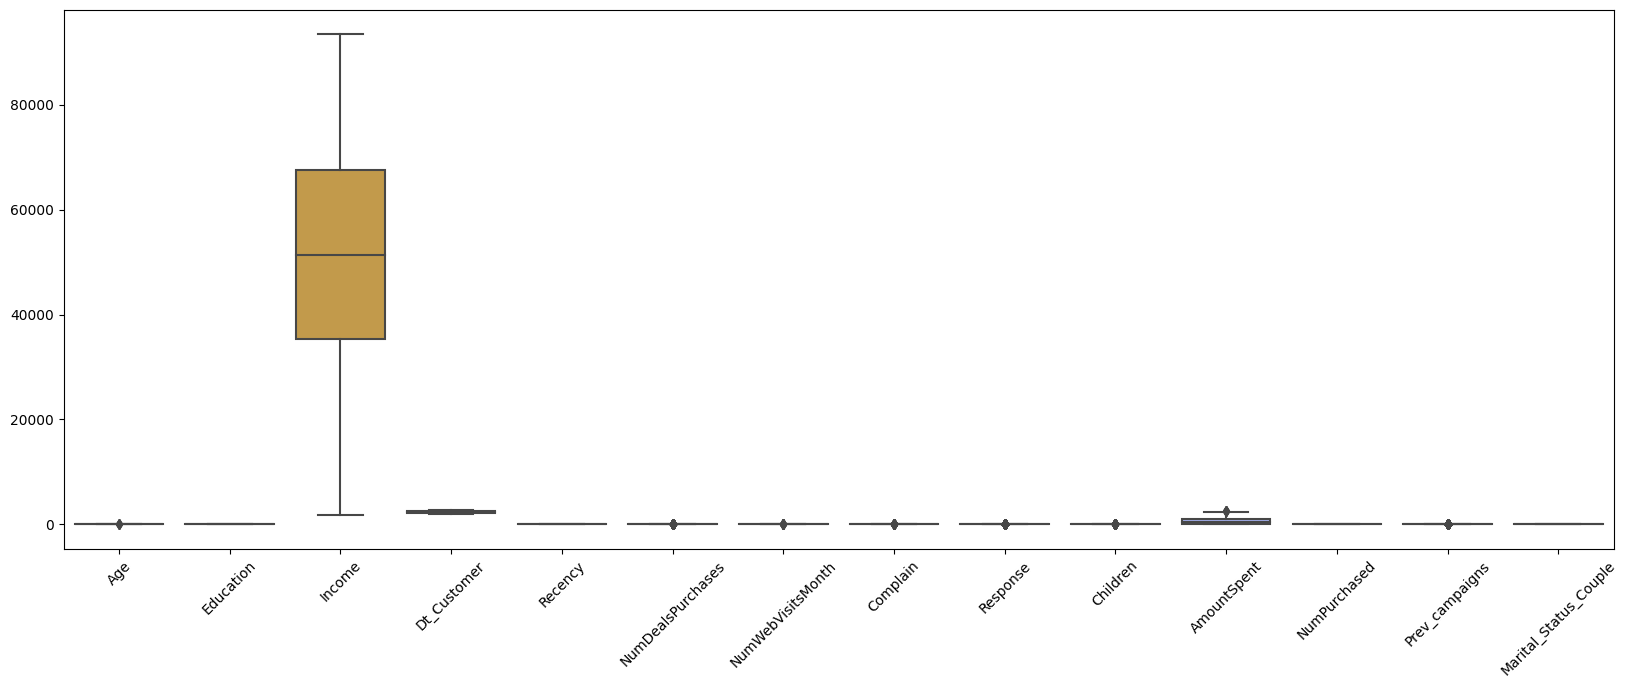

In [35]:
plt.figure(figsize=(20,7))
x = sns.boxplot(data=data)
x.set_xticklabels(x.get_xticklabels(),rotation=45)

<Figure size 800x500 with 0 Axes>

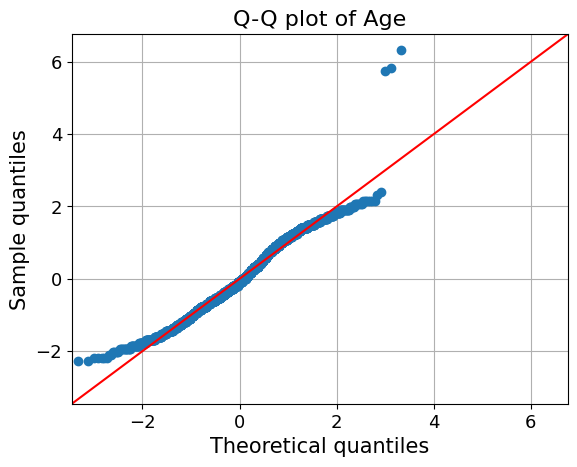

<Figure size 800x500 with 0 Axes>

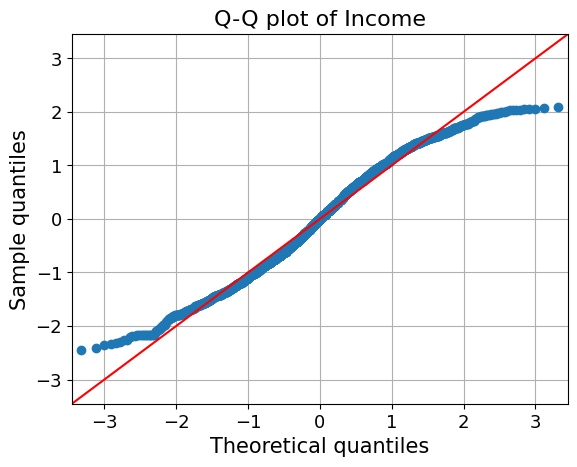

<Figure size 800x500 with 0 Axes>

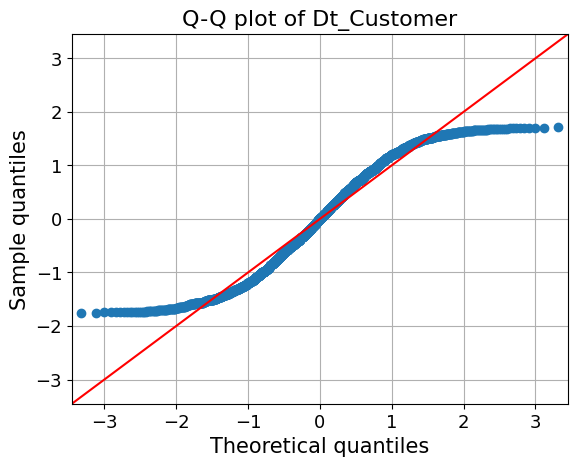

<Figure size 800x500 with 0 Axes>

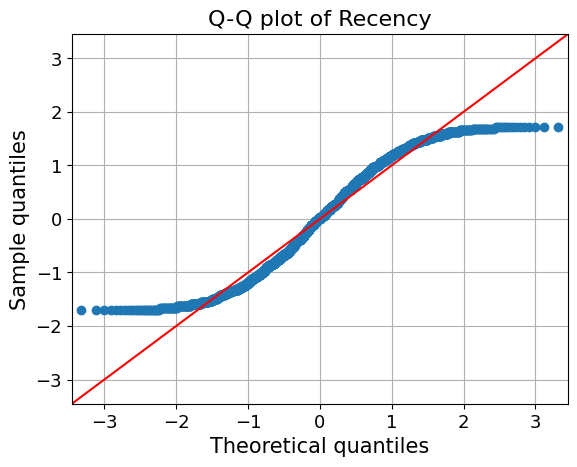

<Figure size 800x500 with 0 Axes>

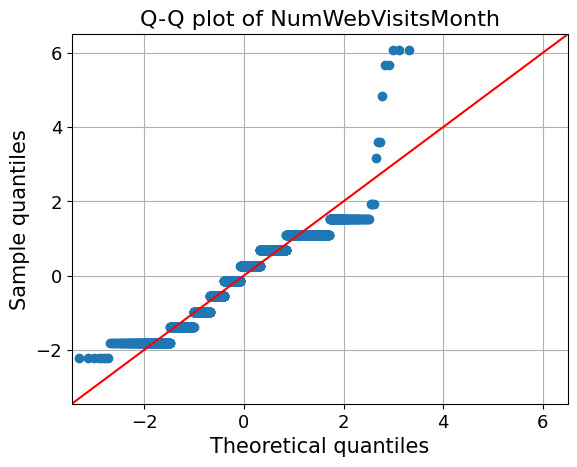

<Figure size 800x500 with 0 Axes>

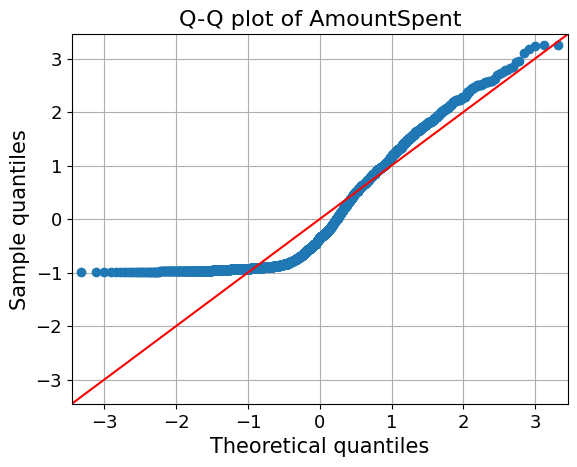

In [36]:
#checking the distribution of independent variables
data = data.dropna()
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Age','Income','Dt_Customer','Recency','NumWebVisitsMonth','AmountSpent']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()



*   Q-Q plots show most of the data is normally distributed
*   There are few Outliers in Income and age



# Inputation Methods

In [37]:
from sklearn.impute import KNNImputer
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [38]:
#checking if the any data is missing
def checkMissing(dataset):
  percent_missing = dataset.isnull().sum() * 100 / len(data)
  null_values_total = dataset.isnull().sum()
  missing_value_df = pd.DataFrame({
                                  'Missing_Total' : null_values_total,
                                  'percent_missing': percent_missing,
                                  })
  return missing_value_df

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

def print_Errors(column,number_1_idx,data_original,data_filled):
  # The mean squared error
  data_mn = data_filled.iloc[number_1_idx]
  data_og = data_original.iloc[number_1_idx]
  print("=--- Error values for ",column," ------")
  print('Mean squared error: %.2f'% mean_squared_error(data_og[column], data_mn[column]))
  # The coefficient of determination: 1 is perfect prediction
  print('Coefficient of determination: %.2f'% r2_score(data_og[column], data_mn[column]))
  r2 = r2_score(data_og[column], data_mn[column])
  print('R^2 score on test set =',r2)


## Inputation by Average

In [40]:
df_missing = data.copy()

# Remove 1%, 5%, and 10% of three separate columns
create_missing(df_missing, 0.01, 'Income')
create_missing(df_missing, 0.05, 'NumPurchased')
create_missing(df_missing, 0.1, 'Recency')
checkMissing(df_missing)

Missing_Total  percent_missing
Age                                0         0.000000
Education                          0         0.000000
Income                            22         0.993677
Dt_Customer                        0         0.000000
Recency                          221         9.981933
NumDealsPurchases                  0         0.000000
NumWebVisitsMonth                  0         0.000000
Complain                           0         0.000000
Response                           0         0.000000
Children                           0         0.000000
AmountSpent                        0         0.000000
NumPurchased                     111         5.013550
Prev_campaigns                     0         0.000000
Marital_Status_Couple              0         0.000000

In [41]:
number_1_idx = list(np.where(df_missing['Income'].isna())[0])
number_5_idx = list(np.where(df_missing['NumPurchased'].isna())[0])
number_10_idx = list(np.where(df_missing['Recency'].isna())[0])

In [42]:
df_missing['Income'].fillna(value=df_missing['Income'].mean(), inplace=True)
df_missing['NumPurchased'].fillna(value=df_missing['NumPurchased'].mean(), inplace=True)
df_missing['Recency'].fillna(value=df_missing['Recency'].mean(), inplace=True)

In [43]:
print_Errors("Income",number_1_idx,data,df_missing)
print_Errors("NumPurchased",number_5_idx,data,df_missing)
print_Errors("Recency",number_10_idx,data,df_missing)

=--- Error values for  Income  ------
Mean squared error: 607583693.11
Coefficient of determination: -0.00
R^2 score on test set = -0.0004204712746351813
=--- Error values for  NumPurchased  ------
Mean squared error: 53.26
Coefficient of determination: -0.00
R^2 score on test set = -1.529756149820649e-05
=--- Error values for  Recency  ------
Mean squared error: 860.35
Coefficient of determination: -0.01
R^2 score on test set = -0.00797902960224195


## Categorical Mean

In [44]:
df_missing = data.copy()

# Remove 1%, 5%, and 10% of three separate columns
create_missing(df_missing, 0.01, 'Income')
create_missing(df_missing, 0.05, 'NumPurchased')
create_missing(df_missing, 0.1, 'Recency')
checkMissing(df_missing)

Missing_Total  percent_missing
Age                                0         0.000000
Education                          0         0.000000
Income                            22         0.993677
Dt_Customer                        0         0.000000
Recency                          221         9.981933
NumDealsPurchases                  0         0.000000
NumWebVisitsMonth                  0         0.000000
Complain                           0         0.000000
Response                           0         0.000000
Children                           0         0.000000
AmountSpent                        0         0.000000
NumPurchased                     111         5.013550
Prev_campaigns                     0         0.000000
Marital_Status_Couple              0         0.000000

In [45]:
number_1_idx = list(np.where(df_missing['Income'].isna())[0])
number_5_idx = list(np.where(df_missing['NumPurchased'].isna())[0])
number_10_idx = list(np.where(df_missing['Recency'].isna())[0])

In [46]:
df_missing['Income'].fillna(df_missing.groupby('Education')['Income'].transform('mean'), inplace = True)
df_missing['NumPurchased'].fillna(df_missing.groupby('Education')['NumPurchased'].transform('mean'), inplace = True)
df_missing['Recency'].fillna(df_missing.groupby('Education')['Recency'].transform('mean'), inplace = True)

In [47]:
print_Errors("Income",number_1_idx,data,df_missing)
print_Errors("NumPurchased",number_5_idx,data,df_missing)
print_Errors("Recency",number_10_idx,data,df_missing)

=--- Error values for  Income  ------
Mean squared error: 345546631.14
Coefficient of determination: 0.06
R^2 score on test set = 0.06004220638225499
=--- Error values for  NumPurchased  ------
Mean squared error: 41.70
Coefficient of determination: 0.02
R^2 score on test set = 0.02292735946567981
=--- Error values for  Recency  ------
Mean squared error: 868.98
Coefficient of determination: -0.01
R^2 score on test set = -0.006778878580348868


## KNN Inpute

In [48]:
df_missing = data.copy()

# Remove 1%, 5%, and 10% of three separate columns
create_missing(df_missing, 0.01, 'Income')
create_missing(df_missing, 0.05, 'NumPurchased')
create_missing(df_missing, 0.1, 'Recency')
checkMissing(df_missing)

Missing_Total  percent_missing
Age                                0         0.000000
Education                          0         0.000000
Income                            22         0.993677
Dt_Customer                        0         0.000000
Recency                          221         9.981933
NumDealsPurchases                  0         0.000000
NumWebVisitsMonth                  0         0.000000
Complain                           0         0.000000
Response                           0         0.000000
Children                           0         0.000000
AmountSpent                        0         0.000000
NumPurchased                     111         5.013550
Prev_campaigns                     0         0.000000
Marital_Status_Couple              0         0.000000

In [49]:
number_1_idx = list(np.where(df_missing['Income'].isna())[0])
number_5_idx = list(np.where(df_missing['NumPurchased'].isna())[0])
number_10_idx = list(np.where(df_missing['Recency'].isna())[0])

In [50]:
imputer = KNNImputer(n_neighbors=5)
df_missing = pd.DataFrame(imputer.fit_transform(df_missing), columns = df_missing.columns)
checkMissing(df_missing)

Missing_Total  percent_missing
Age                                0              0.0
Education                          0              0.0
Income                             0              0.0
Dt_Customer                        0              0.0
Recency                            0              0.0
NumDealsPurchases                  0              0.0
NumWebVisitsMonth                  0              0.0
Complain                           0              0.0
Response                           0              0.0
Children                           0              0.0
AmountSpent                        0              0.0
NumPurchased                       0              0.0
Prev_campaigns                     0              0.0
Marital_Status_Couple              0              0.0

In [51]:
print_Errors("Income",number_1_idx,data,df_missing)
print_Errors("NumPurchased",number_5_idx,data,df_missing)
print_Errors("Recency",number_10_idx,data,df_missing)

=--- Error values for  Income  ------
Mean squared error: 76072022.93
Coefficient of determination: 0.81
R^2 score on test set = 0.8129398505123144
=--- Error values for  NumPurchased  ------
Mean squared error: 7.44
Coefficient of determination: 0.84
R^2 score on test set = 0.841974170505006
=--- Error values for  Recency  ------
Mean squared error: 989.93
Coefficient of determination: -0.15
R^2 score on test set = -0.1513367394068923


# Logistic Regression

In [52]:
from sklearn.model_selection import  train_test_split

X = data[ ["Age",	"Education",	"Income",	"Dt_Customer",
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",
                                       "Prev_campaigns",	"Marital_Status_Couple"]]

y = data['Response']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

Splitting data for train test and validation
10% testing
15% of remaining train data for validation

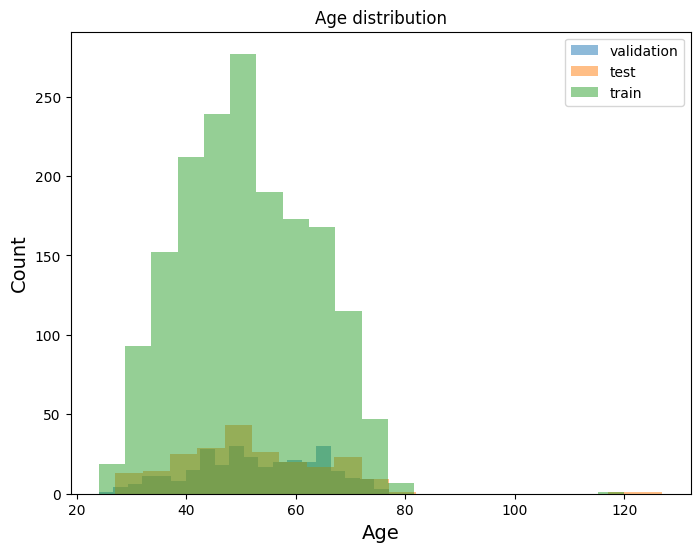

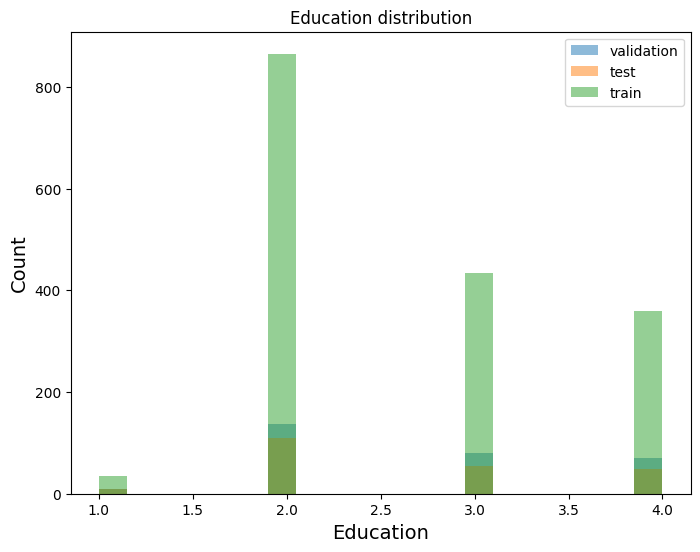

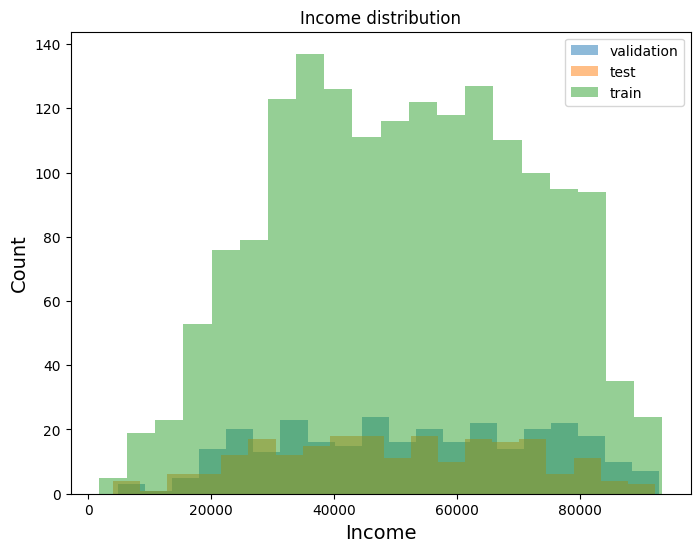

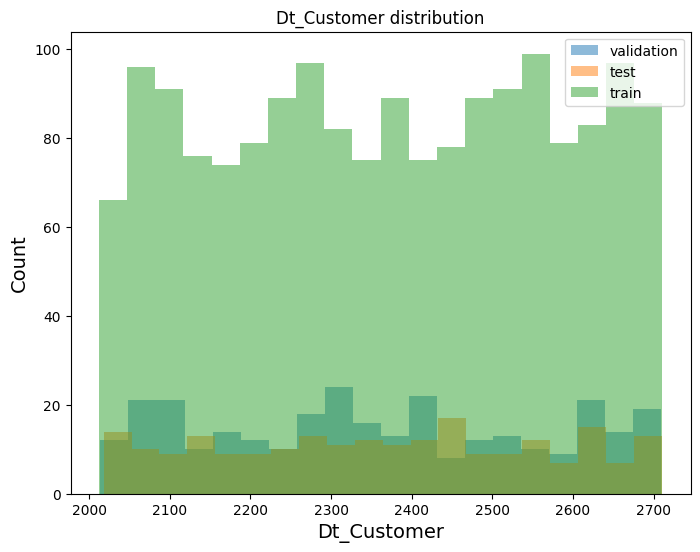

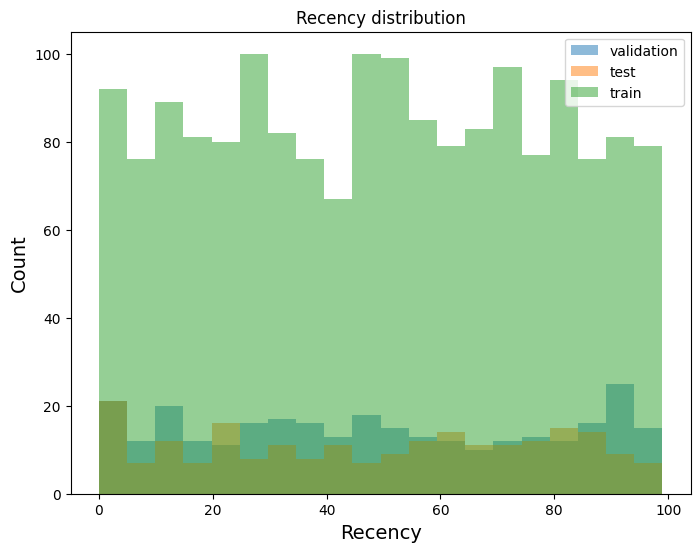

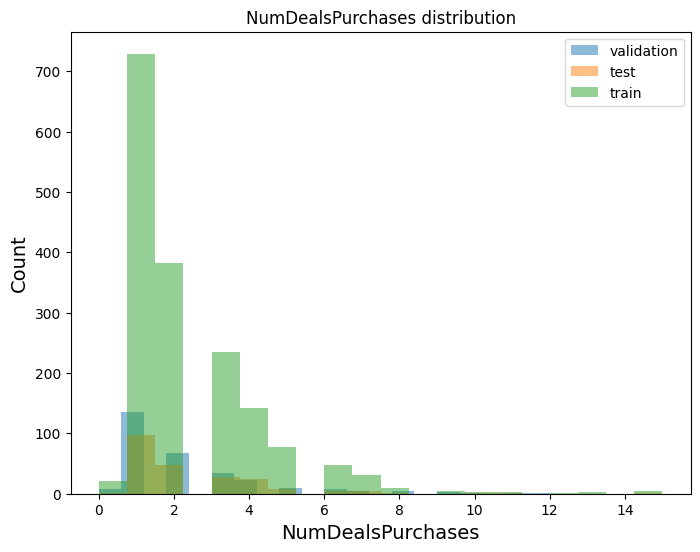

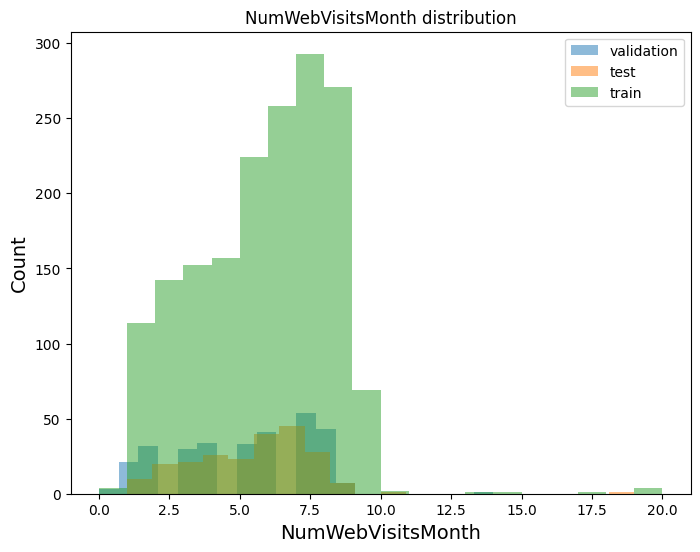

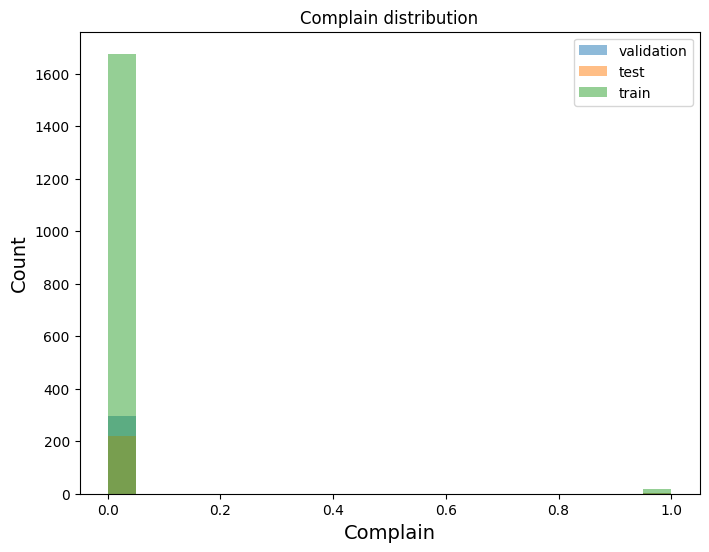

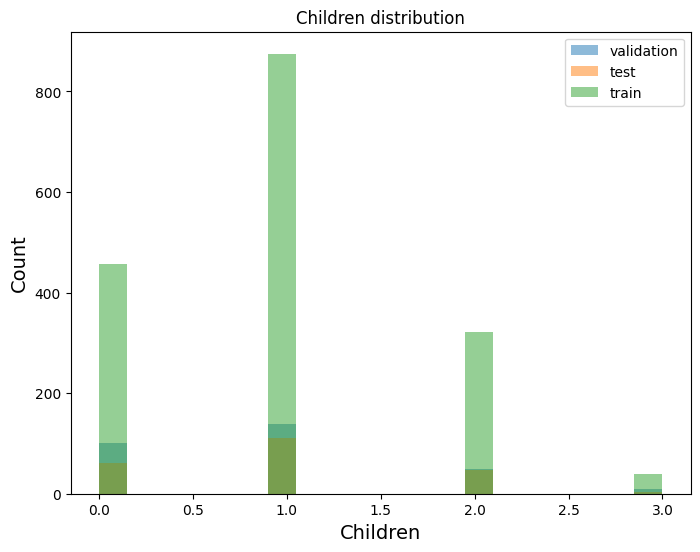

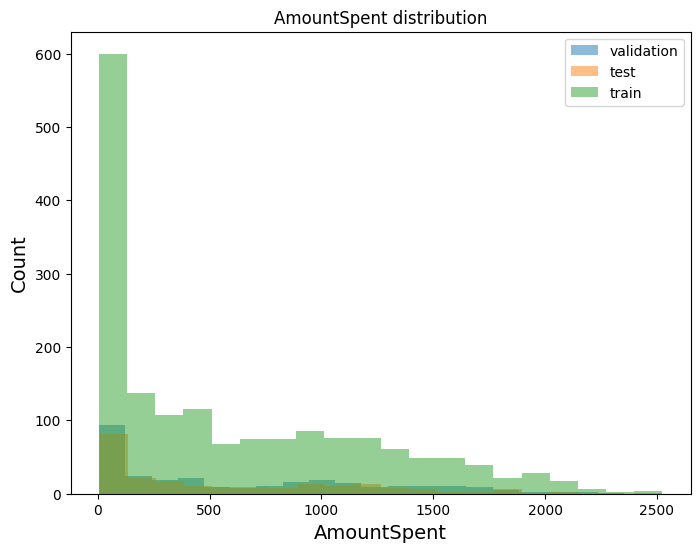

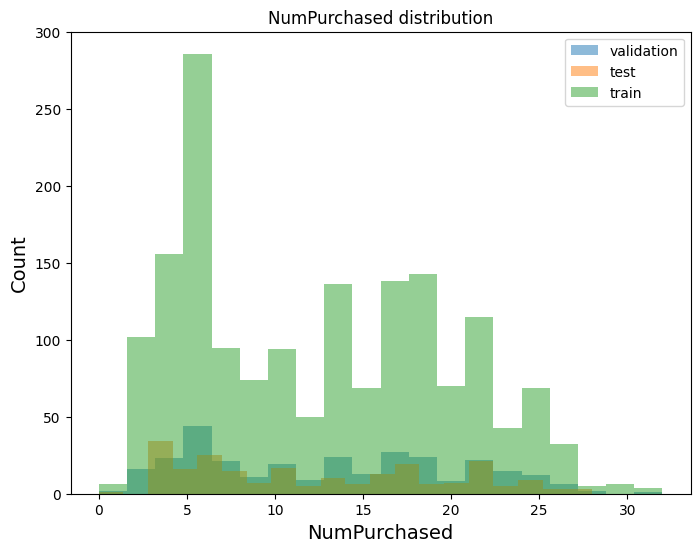

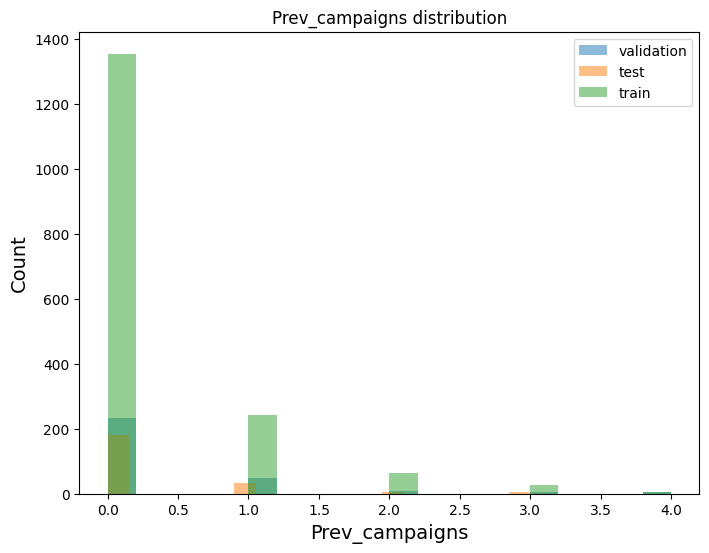

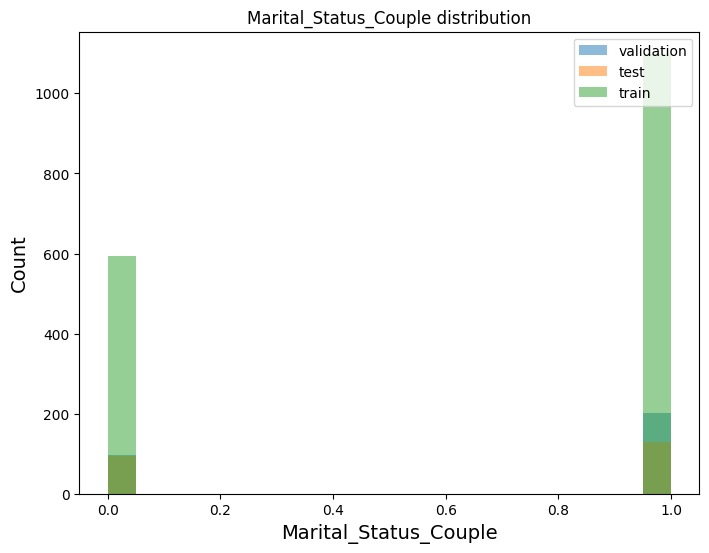

In [53]:
# Looking the data for test, training and validation set
X_test_plot = X_test[["Age",	"Education",	"Income",	"Dt_Customer",
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",
                                       "Prev_campaigns",	"Marital_Status_Couple"]]

X_val_plot = X_val[["Age",	"Education",	"Income",	"Dt_Customer",
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",
                                       "Prev_campaigns",	"Marital_Status_Couple"]]

X_train_plot = X_train[["Age",	"Education",	"Income",	"Dt_Customer",
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",
                                       "Prev_campaigns",	"Marital_Status_Couple"]]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

Distribution shows our data splits are evenly distributed

In [54]:
logreg=LogisticRegression()
loggreg_final=logreg.fit(X_train,y_train)
print(loggreg_final.score(X_train,y_train))

0.8564678086237448


Our model has 88.32% training accuracy

## Making Predictions

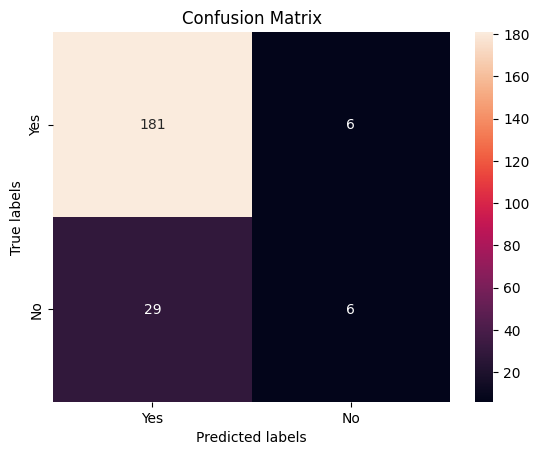

In [55]:
y_pred=logreg.predict(X_test)

cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Yes', 'No']);
ax.yaxis.set_ticklabels(['Yes', 'No']);

Above confusion matrix shows a good percentage of testing data is accurately predicted

In [56]:
print(classification_report(y_test, y_pred))
#classification report for logistic model prediction

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       187
           1       0.50      0.17      0.26        35

    accuracy                           0.84       222
   macro avg       0.68      0.57      0.58       222
weighted avg       0.80      0.84      0.81       222



We have a higher precision for "No" i.e 0 of 0.91 while precision for "Yes" is 0.62 indicating we have a more accurate prediction chance for a negative customer response

In [57]:
#Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Features in increasing order of significance as evident from permutaion importance



1.   Prev_campaigns
2.   NumWebVisitsMonth
3. NumPurchased
4. NumDealsPurchases
5. Education
6. Marital_Status_Couple
7. AmountSpent
8. Recency



## Interpreing Regression Coefficients

In [58]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Response'], data[["Age",	"Education",	"Income",	"Dt_Customer",
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",
                                       "Prev_campaigns",	"Marital_Status_Couple"]]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Response   R-squared (uncentered):                   0.381
Model:                            OLS   Adj. R-squared (uncentered):              0.377
Method:                 Least Squares   F-statistic:                              104.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                   6.41e-218
Time:                        03:52:45   Log-Likelihood:                         -472.99
No. Observations:                2214   AIC:                                      972.0
Df Residuals:                    2201   BIC:                                      1046.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0009      0.001     -1.729      0.084      -0.002       0.000
Education                 0.0287      0.008      3.765      0.000       0.014       0.044
Income                 -1.24e-06   6.66e-07     -1.862      0.063   -2.55e-06     6.6e-08
Dt_Customer               0.0001   1.92e-05      6.858      0.000    9.42e-05       0.000
Recency                  -0.0026      0.000    -11.705      0.000      -0.003      -0.002
NumDealsPurchases         0.0156      0.004      3.530      0.000       0.007       0.024
NumWebVisitsMonth         0.0048      0.004      1.188      0.235      -0.003       0.013
Complain                  0.0512      0.066      0.775      0.438      -0.078       0.181
Children                 -0.0431      0.012     -3.602      0.000      -0.067      -0.020
AmountSpent               0.0001   2.46e-05      5.216      0.000    7.99e-05       0.000
NumPurchased             -0.0064      0.002     -3.490      0.000      -0.010      -0.003
Prev_campaigns            0.1929      0.011     17.208      0.000       0.171       0.215
Marital_Status_Couple    -0.1168      0.013     -8.781      0.000      -0.143      -0.091
==============================================================================
Omnibus:                      540.446   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1118.471
Skew:                           1.422   Prob(JB):                    1.34e-243
Kurtosis:                       5.009   Cond. No.                     5.71e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpretting the Regression Coefficients

The coefficients of the independent variables in the regression model represent the change in the dependent variable for a one-unit increase in the corresponding independent variable, holding all other independent variables constant.

1. The coefficient for "Age" is -0.0013. This means that for every one unit increase in age, the dependent variable (Response) is expected to decrease by 0.0013, holding all other variables constant.

2. The coefficient for "Education" is 0.0266. This means that for every one unit increase in education, the dependent variable is expected to increase by 0.0266, holding all other variables constant.

3. The coefficient for "Income" is -5.288e-07. This means that for every one unit increase in income, the dependent variable is expected to decrease by 5.288e-07, holding all other variables constant. However, the p-value associated with this coefficient is 0.149, which is greater than the commonly used threshold of 0.05, indicating that this coefficient may not be statistically significant.

4. The coefficient for "Complain" is 0.0514, but the p-value associated with this coefficient is 0.438, which is greater than 0.05, indicating that this variable may not be statistically significant in the model.

5. The coefficients for "Recency", "Children", "AmountSpent", "NumPurchased", "Prev_campaigns", and "Marital_Status_Couple" all have p-values less than 0.05, indicating that they are statistically significant in the model.

It is important to note that the coefficients should be interpreted with caution, as the presence of multicollinearity or other numerical problems can affect their validity. Therefore, it is recommended to further investigate the model to ensure the robustness of the results.

The adjusted R-squared value is 0.391, which means that about 39.1% of the variability in the response variable can be explained by the independent variables in the model. The F-statistic is 111.8, and the p-value associated with it is very low (1.18e-231), which suggests that at least one of the independent variables is significantly related to the response variable.

The coefficients of the independent variables represent the amount of change in the dependent variable for a one-unit increase in the corresponding independent variable, holding all other independent variables constant. The p-value associated with each coefficient represents the statistical significance of that variable, i.e., whether or not the variable is significantly related to the response variable.

The model does not contain a constant, as indicated by the note [1], which means that the intercept is zero. The note [2] indicates that the standard errors assume that the covariance matrix of the errors is correctly specified.

The large condition number (6.03e+05) mentioned in note [3] suggests that there may be strong multicollinearity or other numerical problems in the model. This should be further investigated to ensure the validity of the results.

Overall, the model appears to be a good fit for the data, but further analysis is needed to assess the robustness of the results.




* Do the training and test sets have the same data?

        No they donot have the same values

* In the predictor variables independent of all the other predictor variables?
        There are some variables like amount spent and number of orders that are correlated

* Which predictor variables are the most important?
1.   Prev_campaigns
2.   NumWebVisitsMonth
3. NumPurchased
4. NumDealsPurchases
5. Education
6. Marital_Status_Couple
7. AmountSpent
8. Recency

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

      From the confusion matrix it is evident we are getting better model and predictions

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

      For our dataset while removing values for Income column all 3 methods have similar results although one can argue KNN is most accurate imputation method

## Shap Analysis for Linear model

PermutationExplainer explainer: 1694it [02:16, 11.94it/s]                          


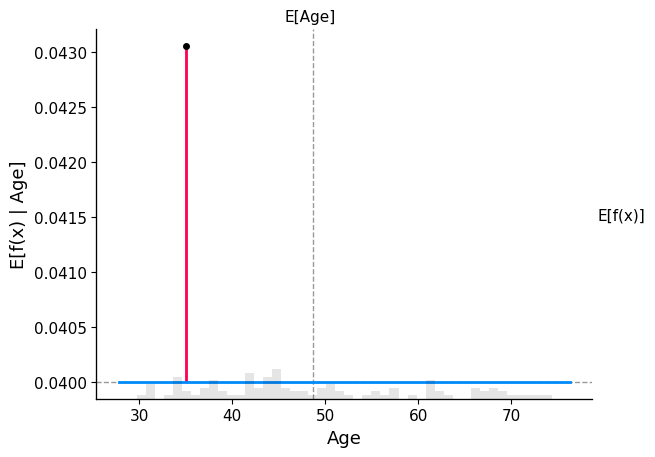

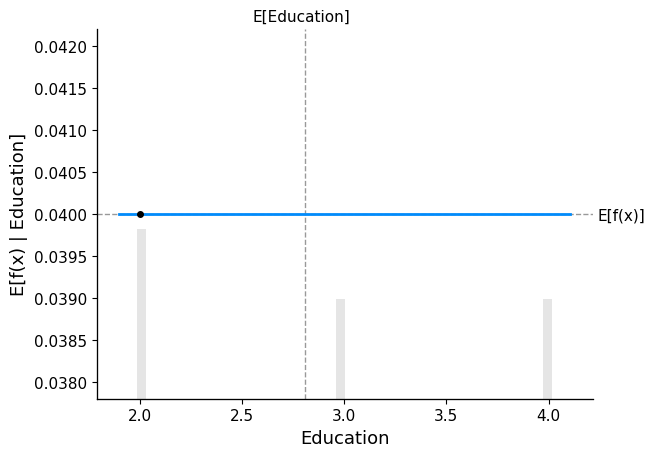

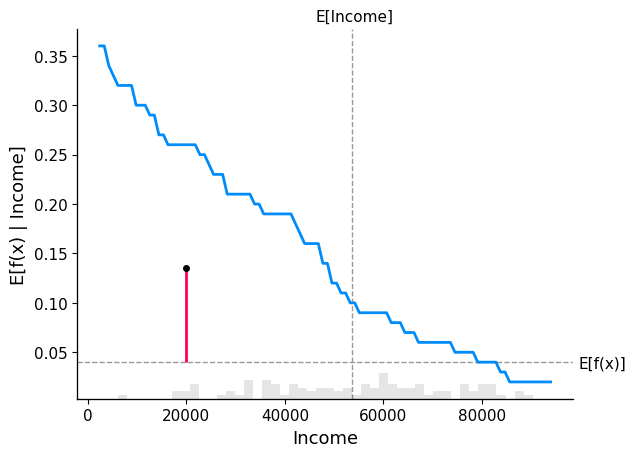

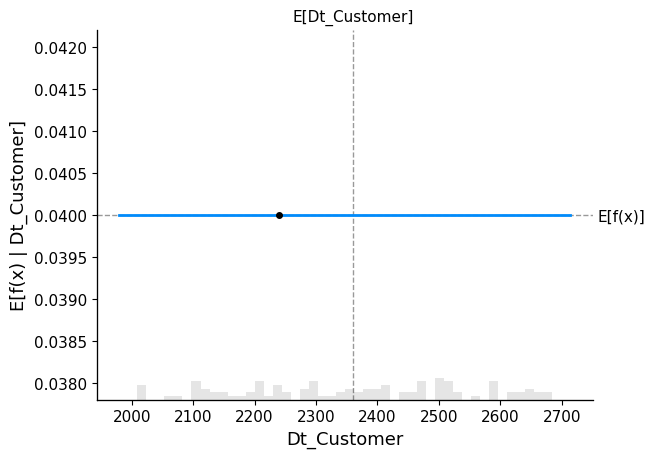

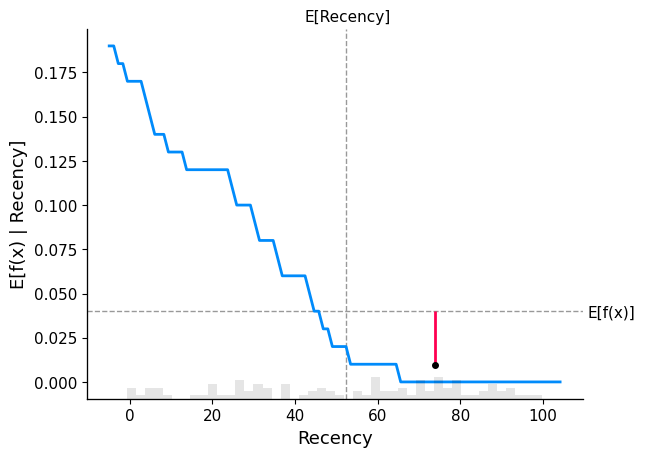

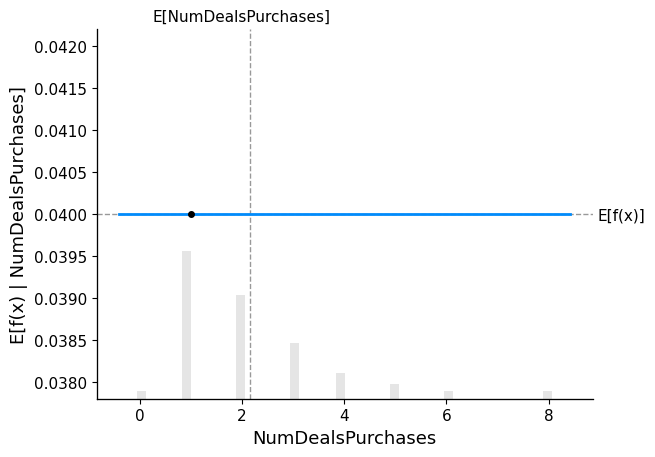

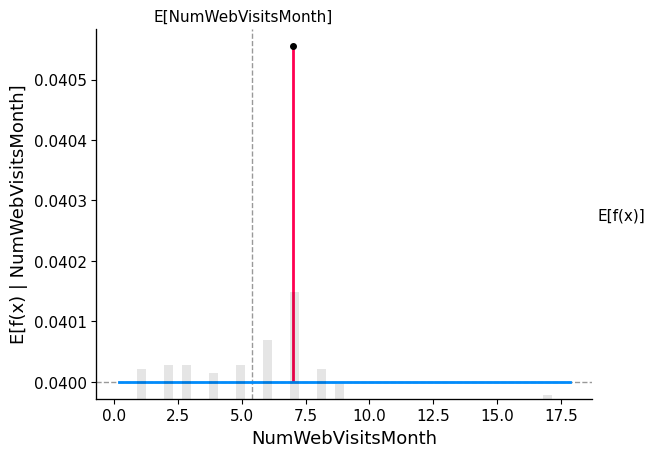

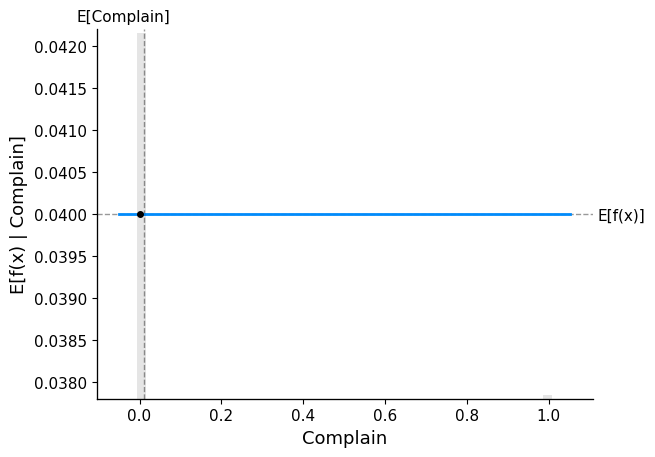

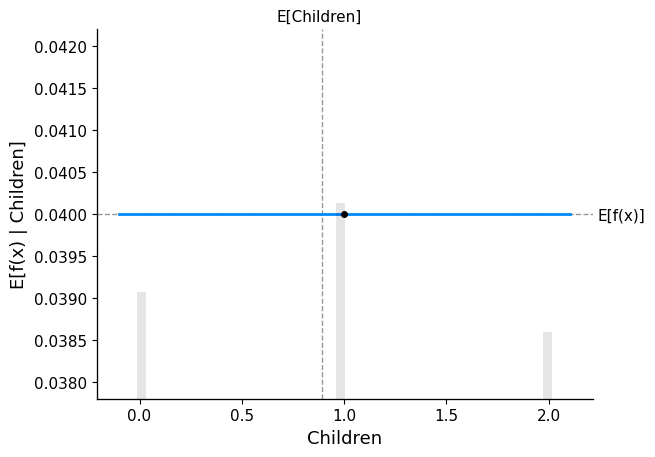

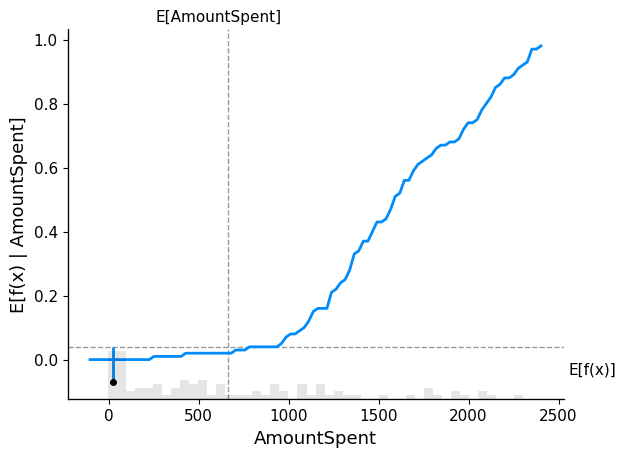

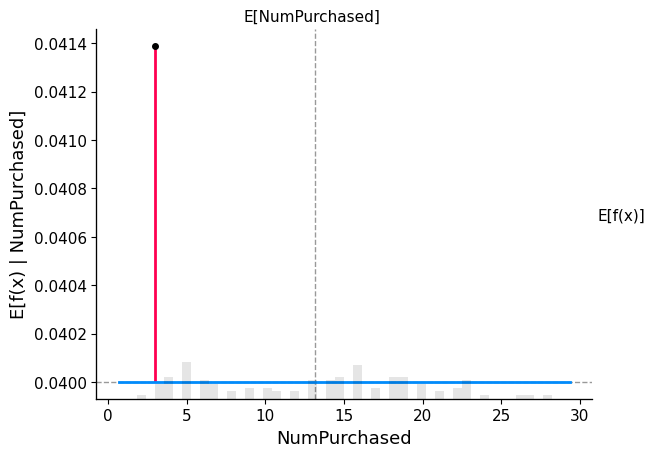

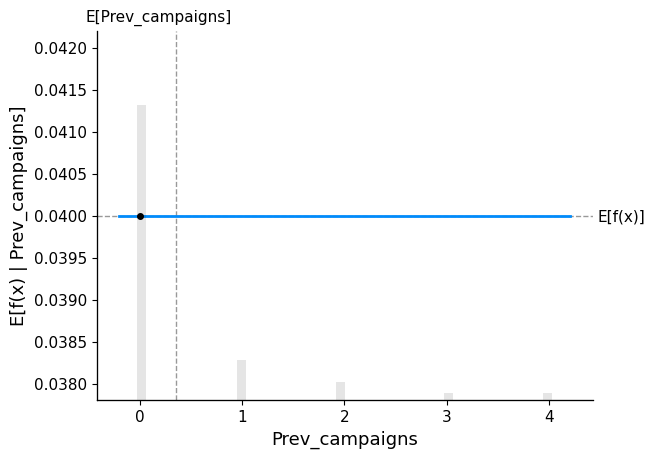

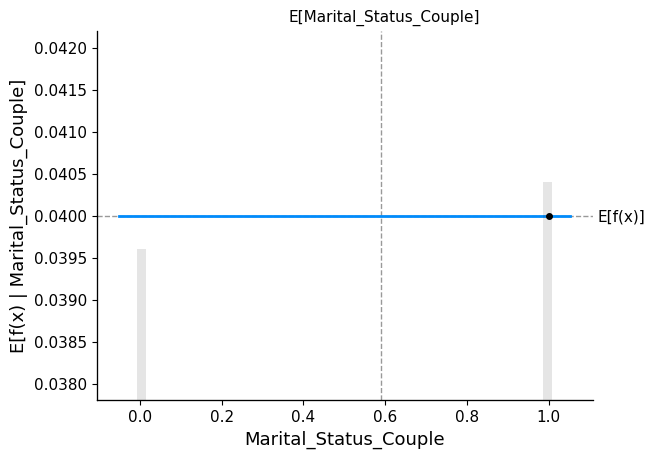

In [59]:
import shap

x_train_100 = shap.utils.sample(
    x_train, 100
)
# SHAP explanation of a Linear Model
linear_explainer = shap.Explainer(logreg.predict, x_train_100)
linear_shap_values = linear_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        logreg.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )

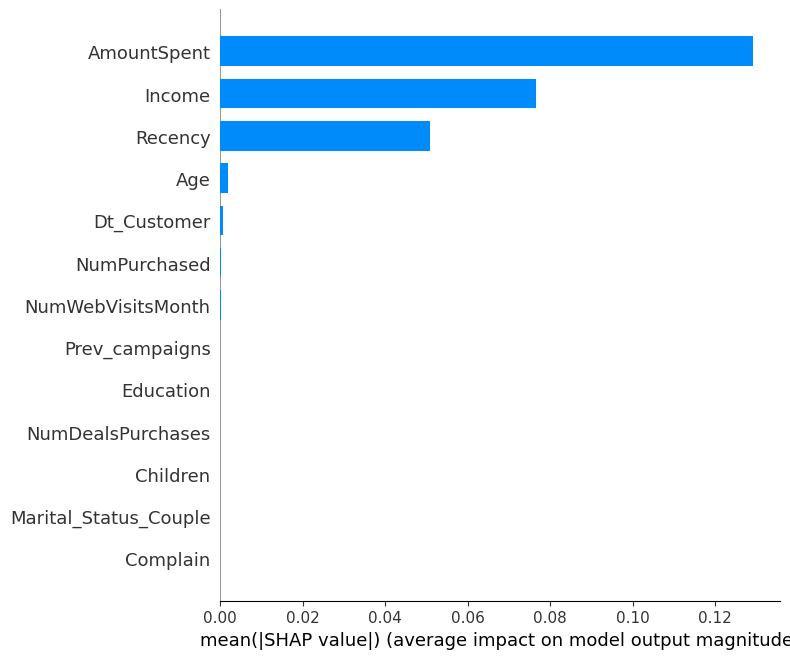

In [60]:
# SHAP variable importance for a Linear Model
shap.summary_plot(linear_shap_values, x_train, plot_type="bar")

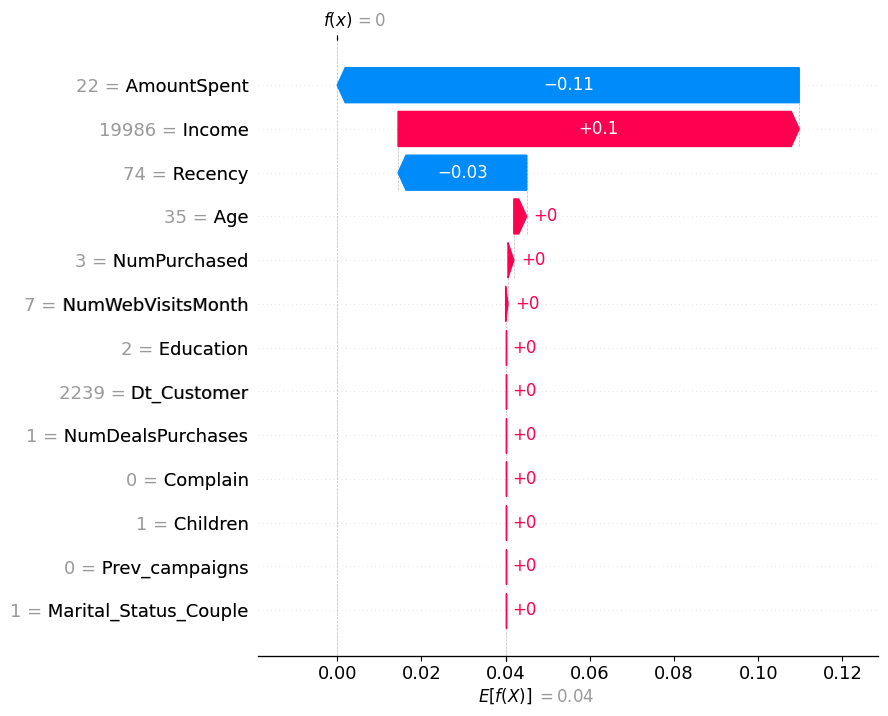

In [61]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

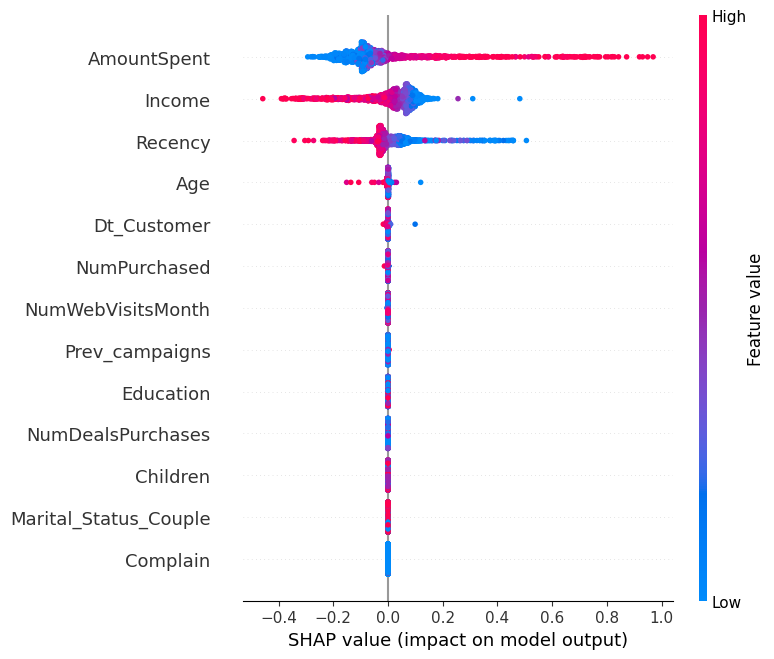

In [62]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, x_train)

### Interpreting SHAP dependence plot for Linear model
The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the linear model using the SHAP dependence plot.

1. For the Linear model we can see how amount spent, recency and Income have a linear dependency on prediction.

## Partial Dependency Plot for Linear Model

creates partial dependence plots for a logistic regression model, visualizing the relationship between marketing features and predicted outcomes on the test data. It also customizes the appearance of the plot, sets a title, adjusts subplot spacing, and specifies a default figure size for future plots.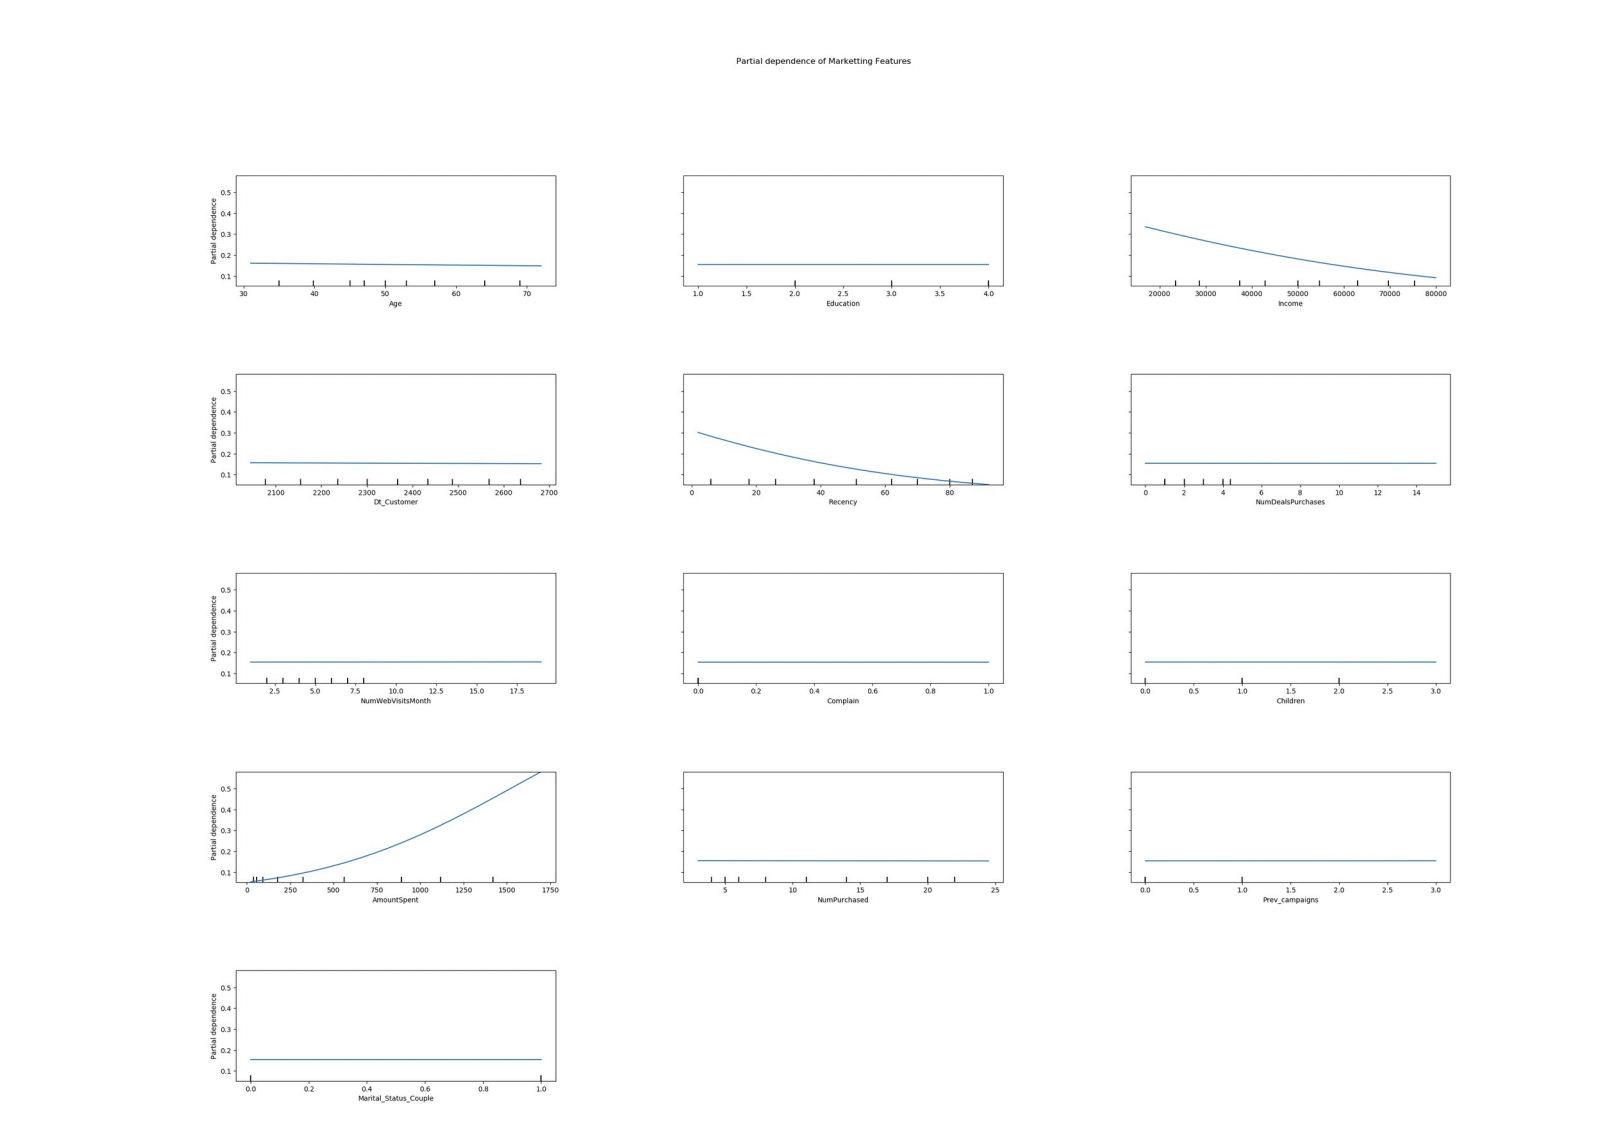

Income, AmountSpent and Recency shows linear dependence which is similar to what to what we see in shap values

# Decision Tree Classifier

Accuracy Score: 0.8468468468468469
Confusion Matrix:
[[172  15]
 [ 19  16]]

Decision Tree:



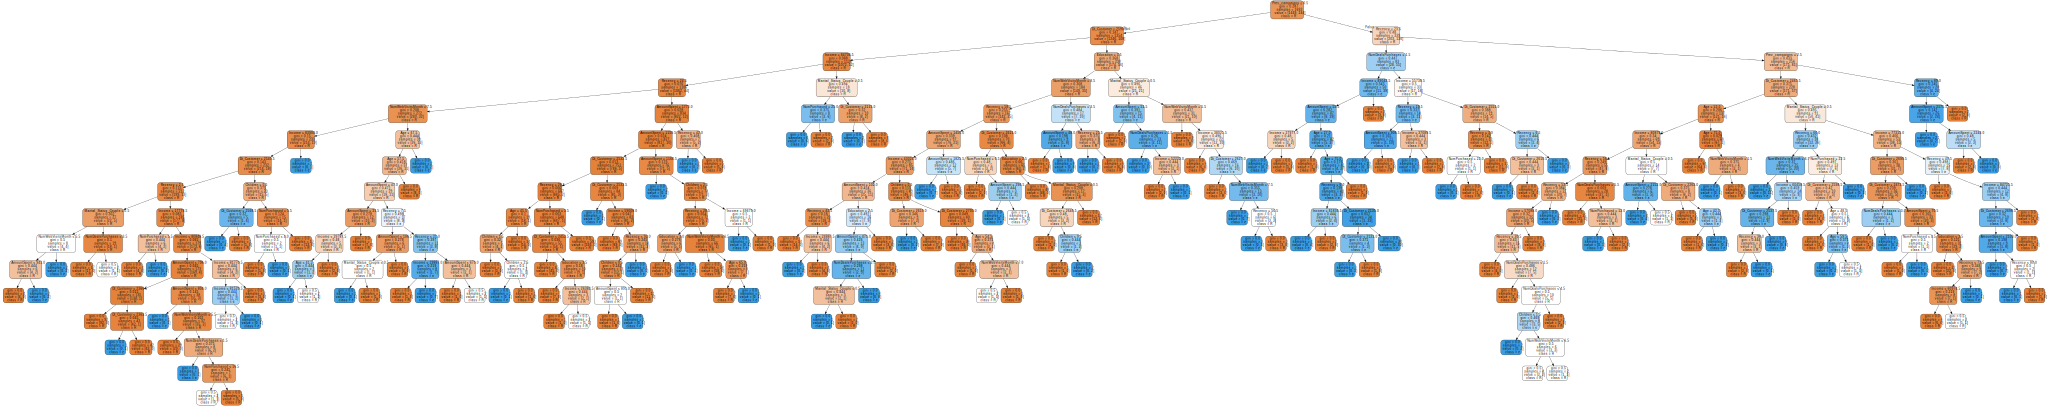

In [63]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import graphviz

# Create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training set
dtc.fit(x_train, y_train)

# Use the decision tree classifier to make predictions on the testing set
y_pred = dtc.predict(X_test)

# Calculate accuracy score and confusion matrix
acc_score = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Print the accuracy score and confusion matrix
print("Accuracy Score: {}".format(acc_score))
print("Confusion Matrix:\n{}".format(conf_mat))

# Visualize the decision tree using graphviz
dot_data = export_graphviz(dtc, out_file=None, feature_names=x_train.columns, class_names=y_train.name, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("breast_cancer_decision_tree")

# Print the decision tree
print("\nDecision Tree:\n")
graph = graphviz.Source(dot_data)
graph


## Interpretting the tree

The Gini value, also known as the Gini index or Gini impurity, is a measure of the impurity or randomness of a set of data, often used in decision trees. In decision trees, the Gini value is used to determine the optimal split at each node based on the purity of the data subsets resulting from the split.

The Gini value ranges from 0 to 1, with 0 indicating perfect purity (all data belongs to the same class) and 1 indicating perfect impurity (data is evenly distributed among all classes). In decision trees, the Gini value is calculated for each potential split, and the split with the lowest Gini value is chosen as the optimal split.

In practice, the Gini value is often used in conjunction with other measures of impurity, such as entropy, to help build more accurate decision trees.

As we have a problem og binary classification the model a split decision at every node depending on the given parameter value.

In [64]:

# Get numerical feature importances
tree_importances = list(dtc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [65]:

# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: Prev_campaigns       Importance: 0.18
Variable: Dt_Customer          Importance: 0.16
Variable: Recency              Importance: 0.14
Variable: Income               Importance: 0.13
Variable: AmountSpent          Importance: 0.11
Variable: NumWebVisitsMonth    Importance: 0.05
Variable: Marital_Status_Couple Importance: 0.05
Variable: Age                  Importance: 0.04
Variable: NumDealsPurchases    Importance: 0.04
Variable: NumPurchased         Importance: 0.04
Variable: Education            Importance: 0.03
Variable: Children             Importance: 0.02
Variable: Complain             Importance: 0.0


**Interpretting variable importance**

The feature importance shows Prev_campaign, Dt_Customer, Recency and Income have a high significance similar to the linear model

## Shap Analysis for Tree model

PermutationExplainer explainer: 1694it [01:24, 17.60it/s]                          


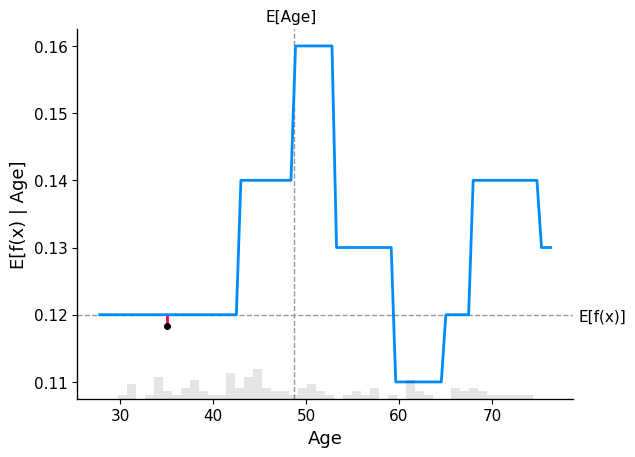

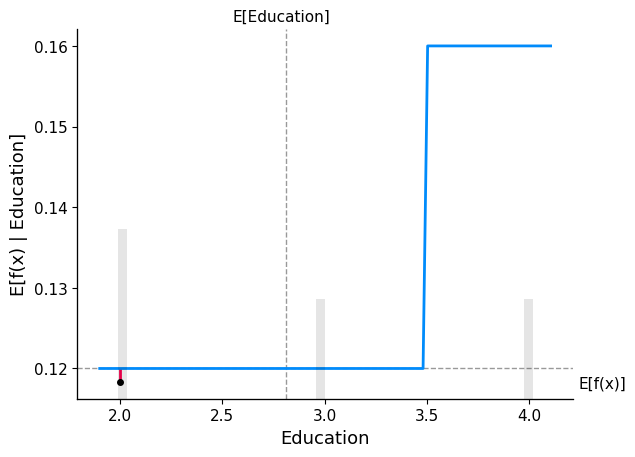

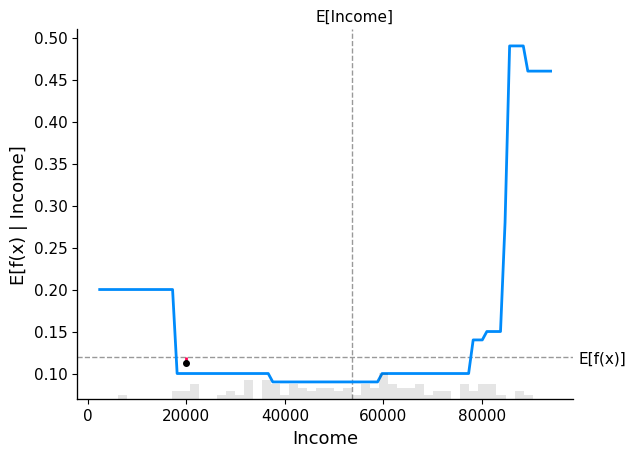

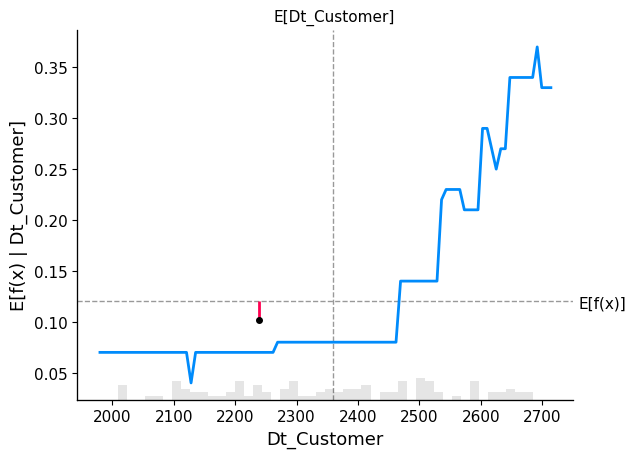

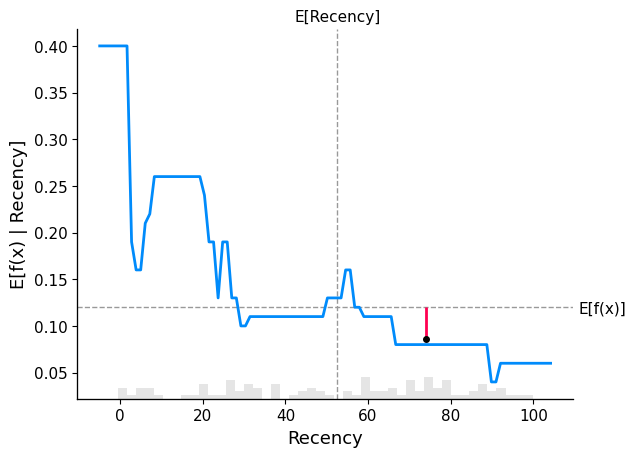

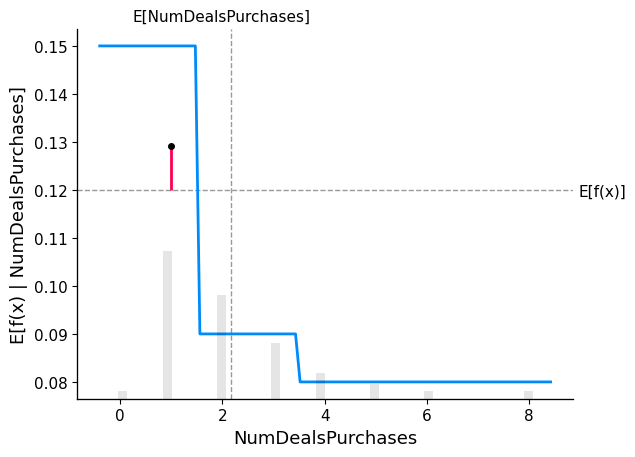

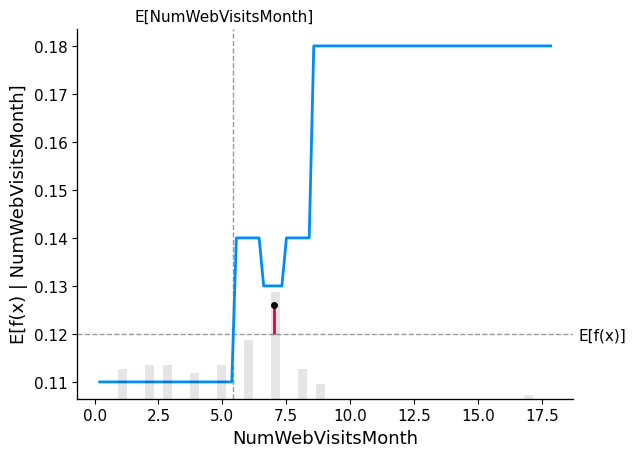

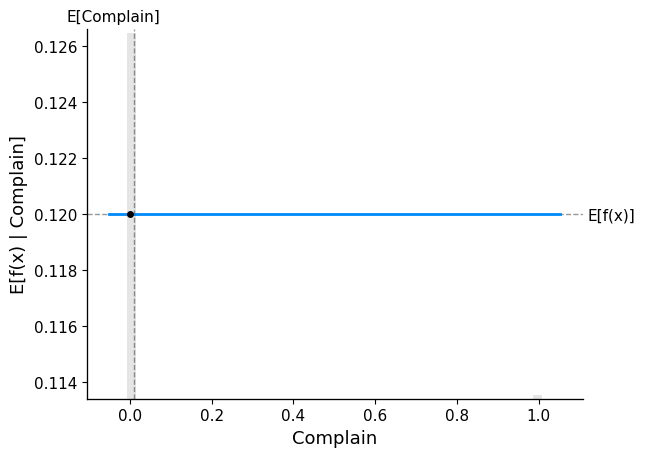

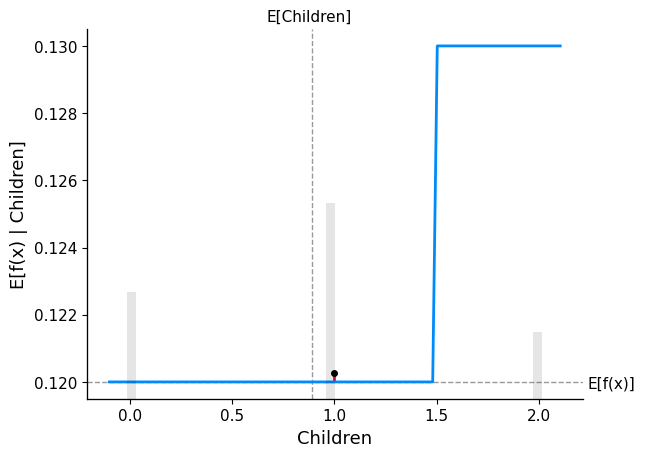

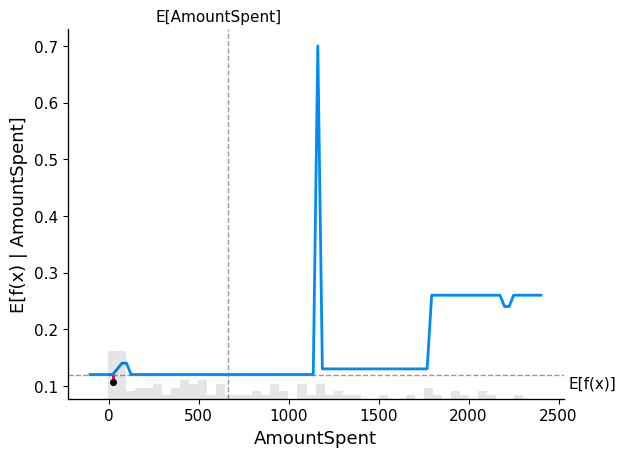

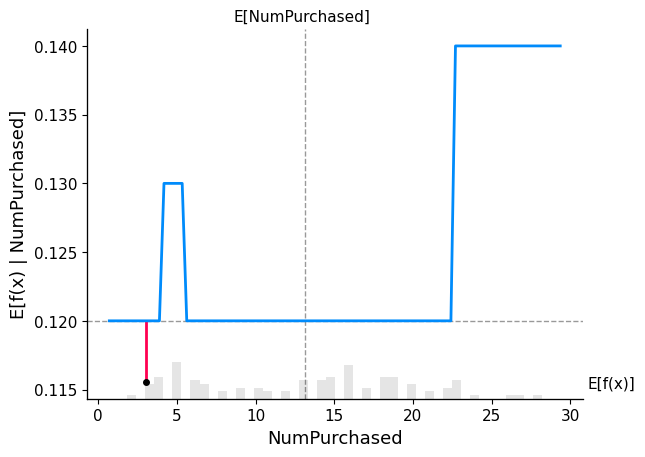

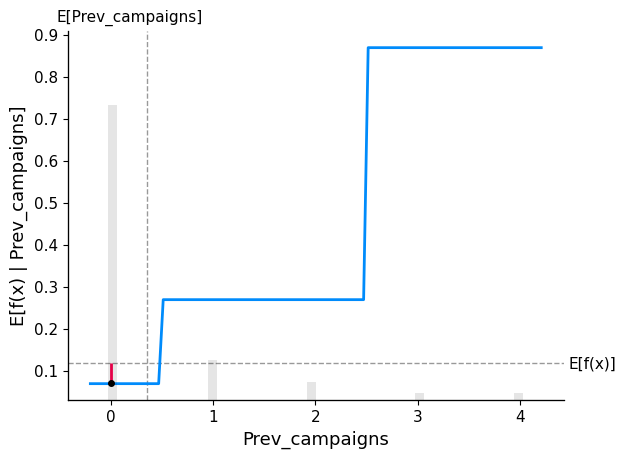

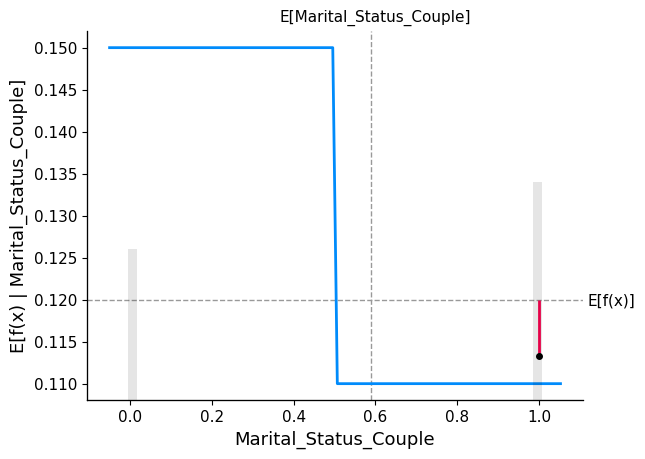

In [66]:
# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(dtc.predict, x_train_100)
tree_shap_values = tree_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        dtc.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

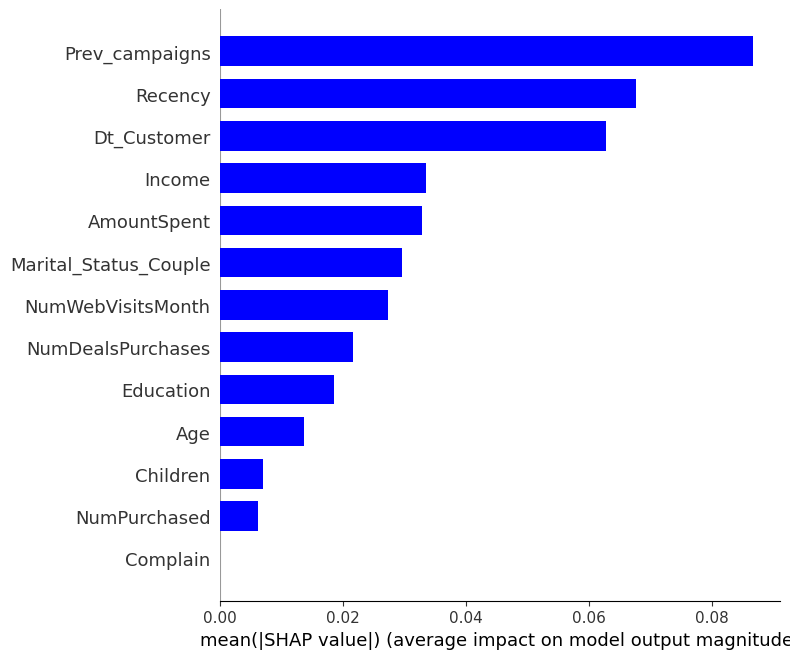

In [67]:
# SHAP variable importance for Tree based model
shap.summary_plot(tree_shap_values, x_train, plot_type="bar", color="blue")

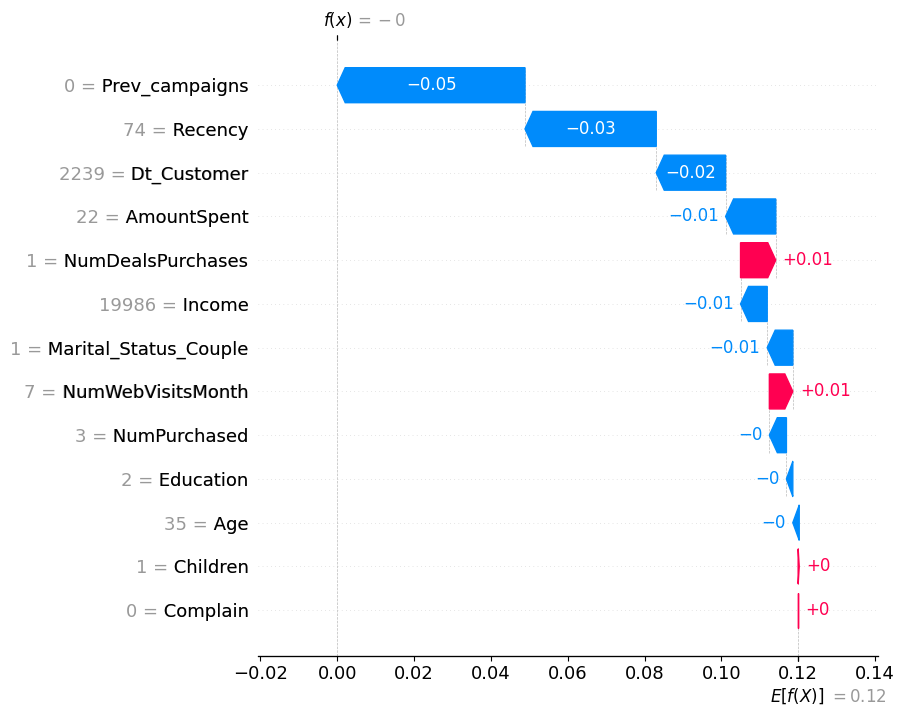

In [68]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

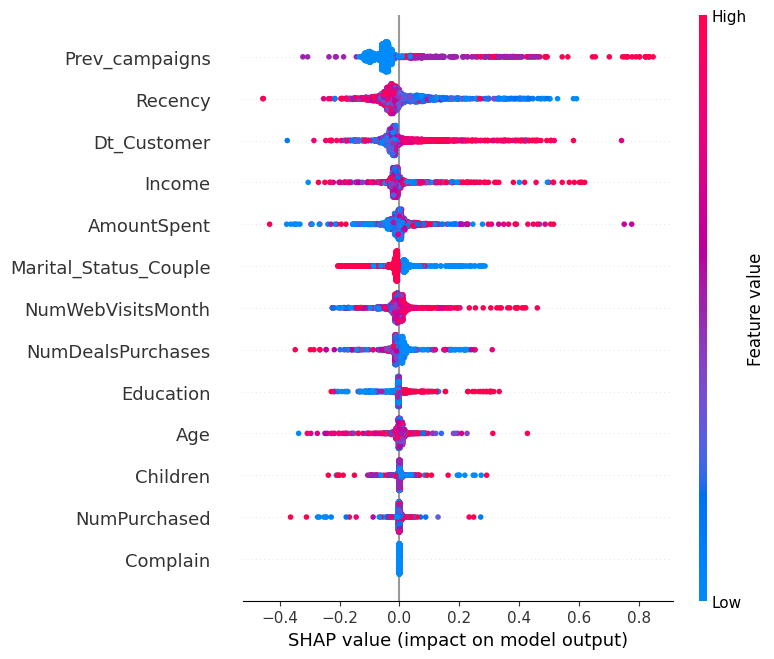

In [69]:
# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, x_train)

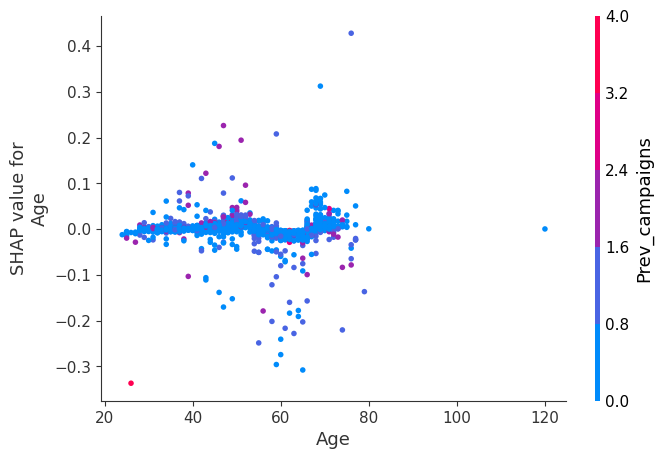

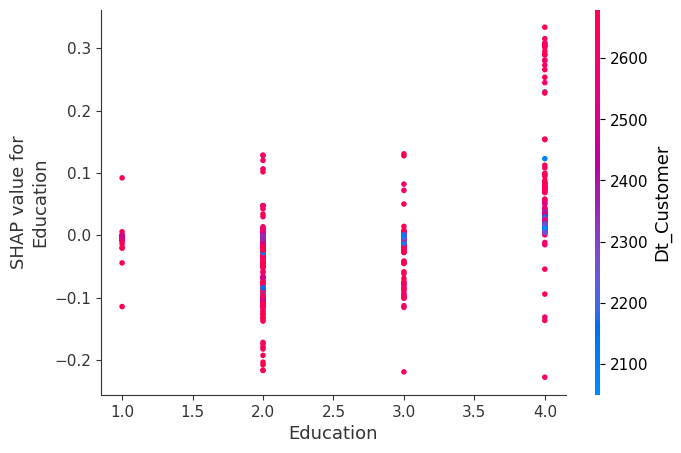

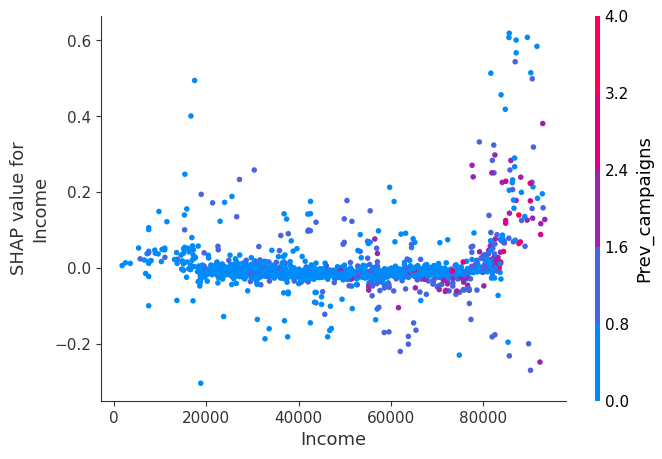

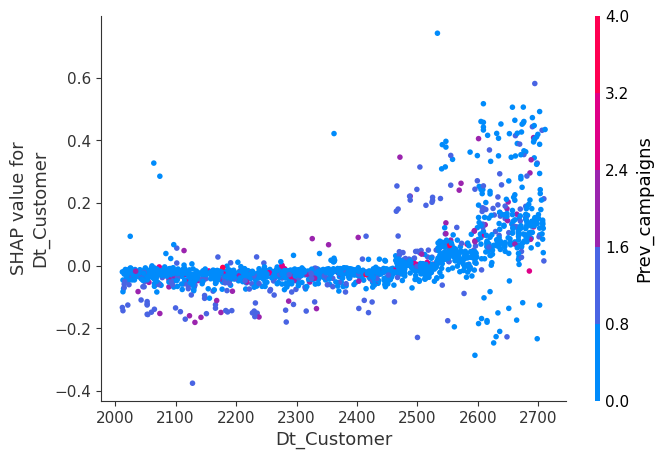

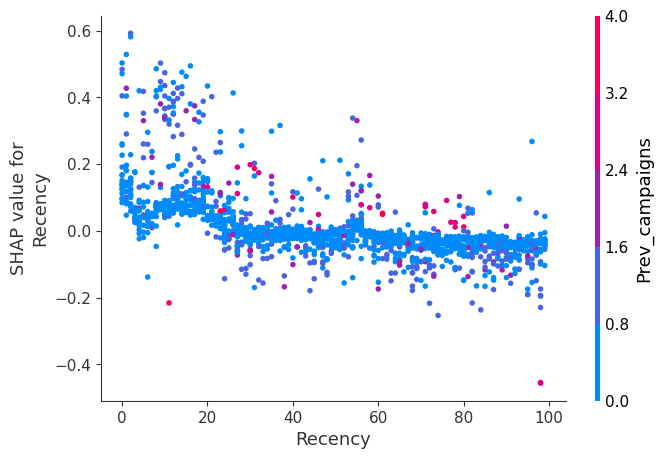

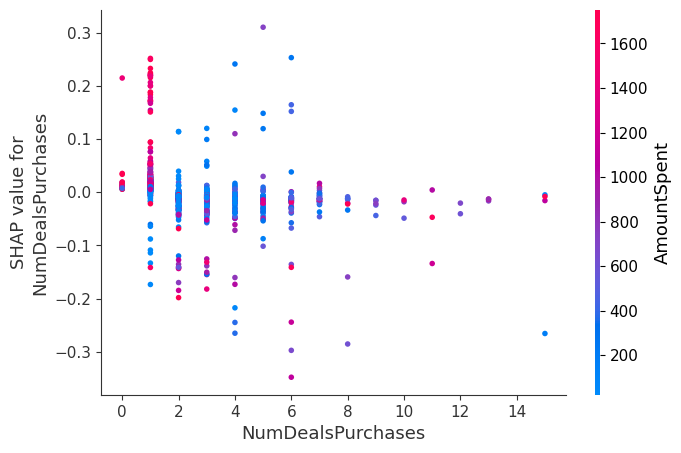

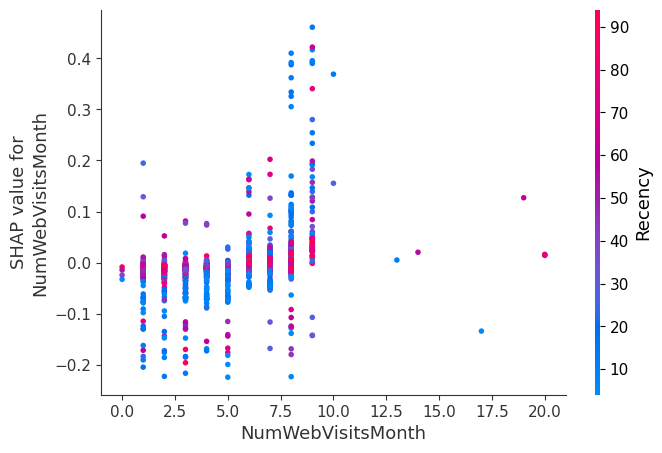

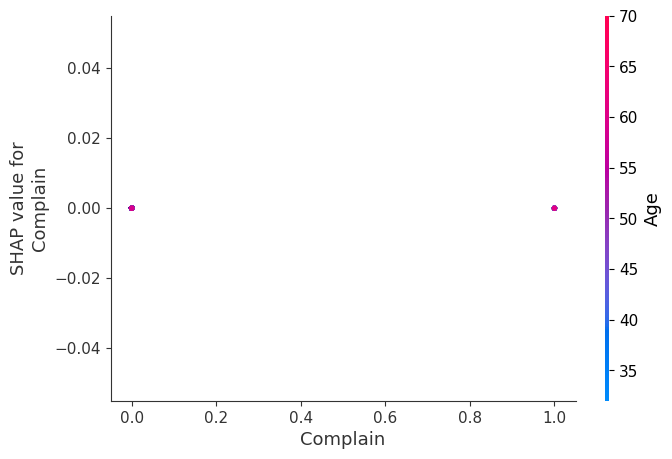

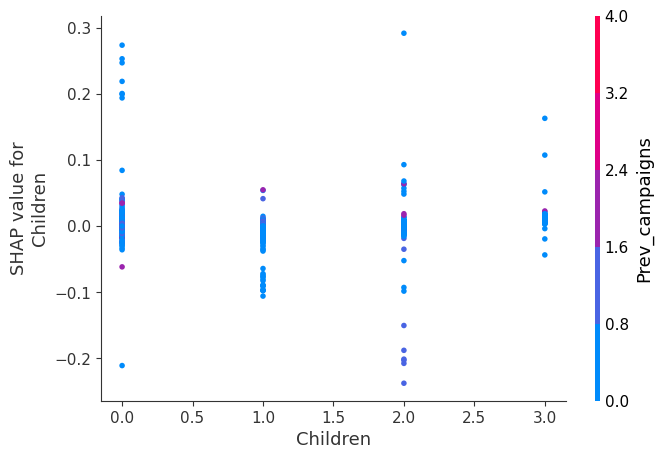

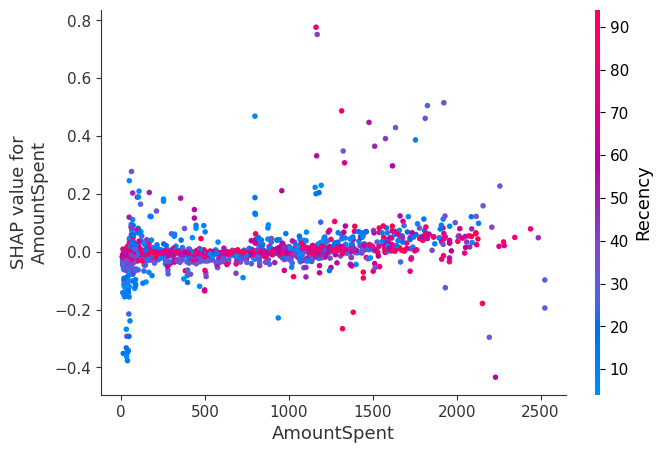

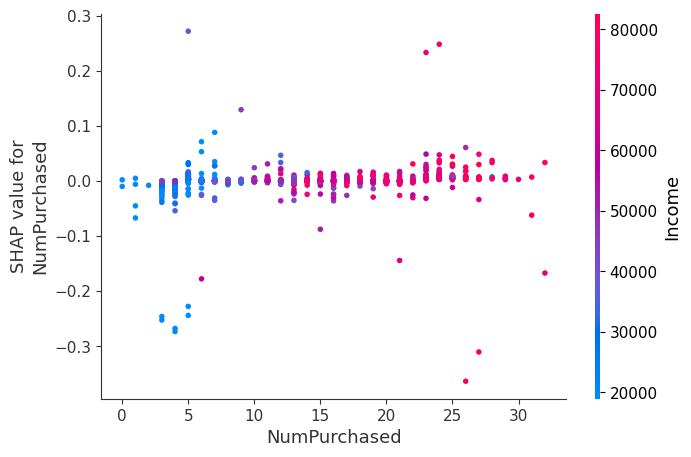

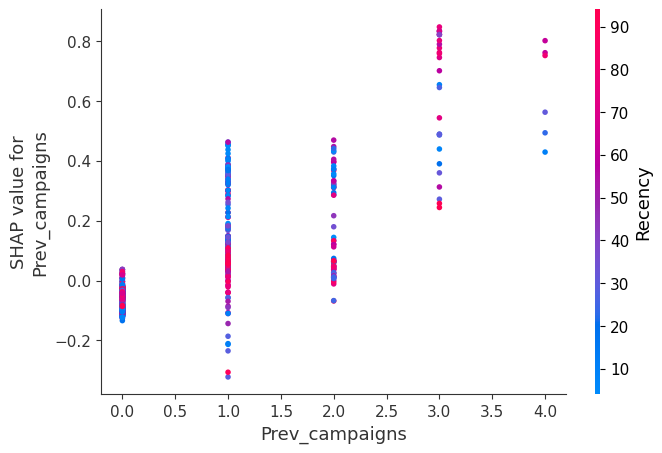

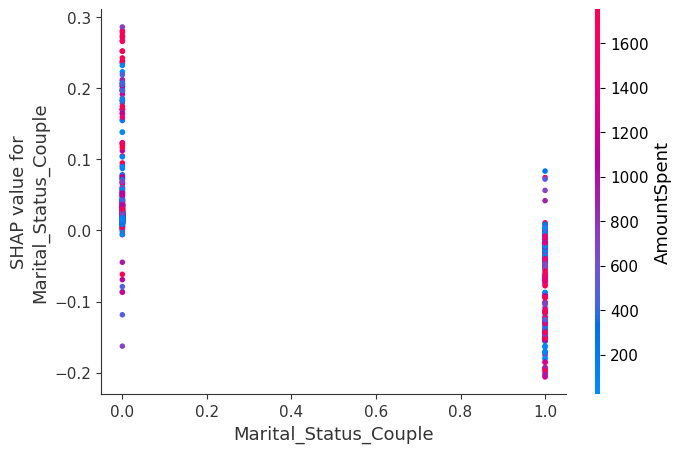

In [70]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, x_train)

## Interpreting SHAP dependence plot for Tree-based model
The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the Tree-based models using the SHAP dependence plot.

1. The tree model shows  a very complex dependency for every feature which is difficult to interpret

Generates partial dependence plots for a decision tree classifier (dtc) using the scikit-learn library. It visualizes the relationship between marketing features and predicted outcomes on the test data. The plot_partial_dependence function is used to create these plots, and the code also customizes the appearance of the plot, sets a title, adjusts subplot spacing, and specifies a default figure size.
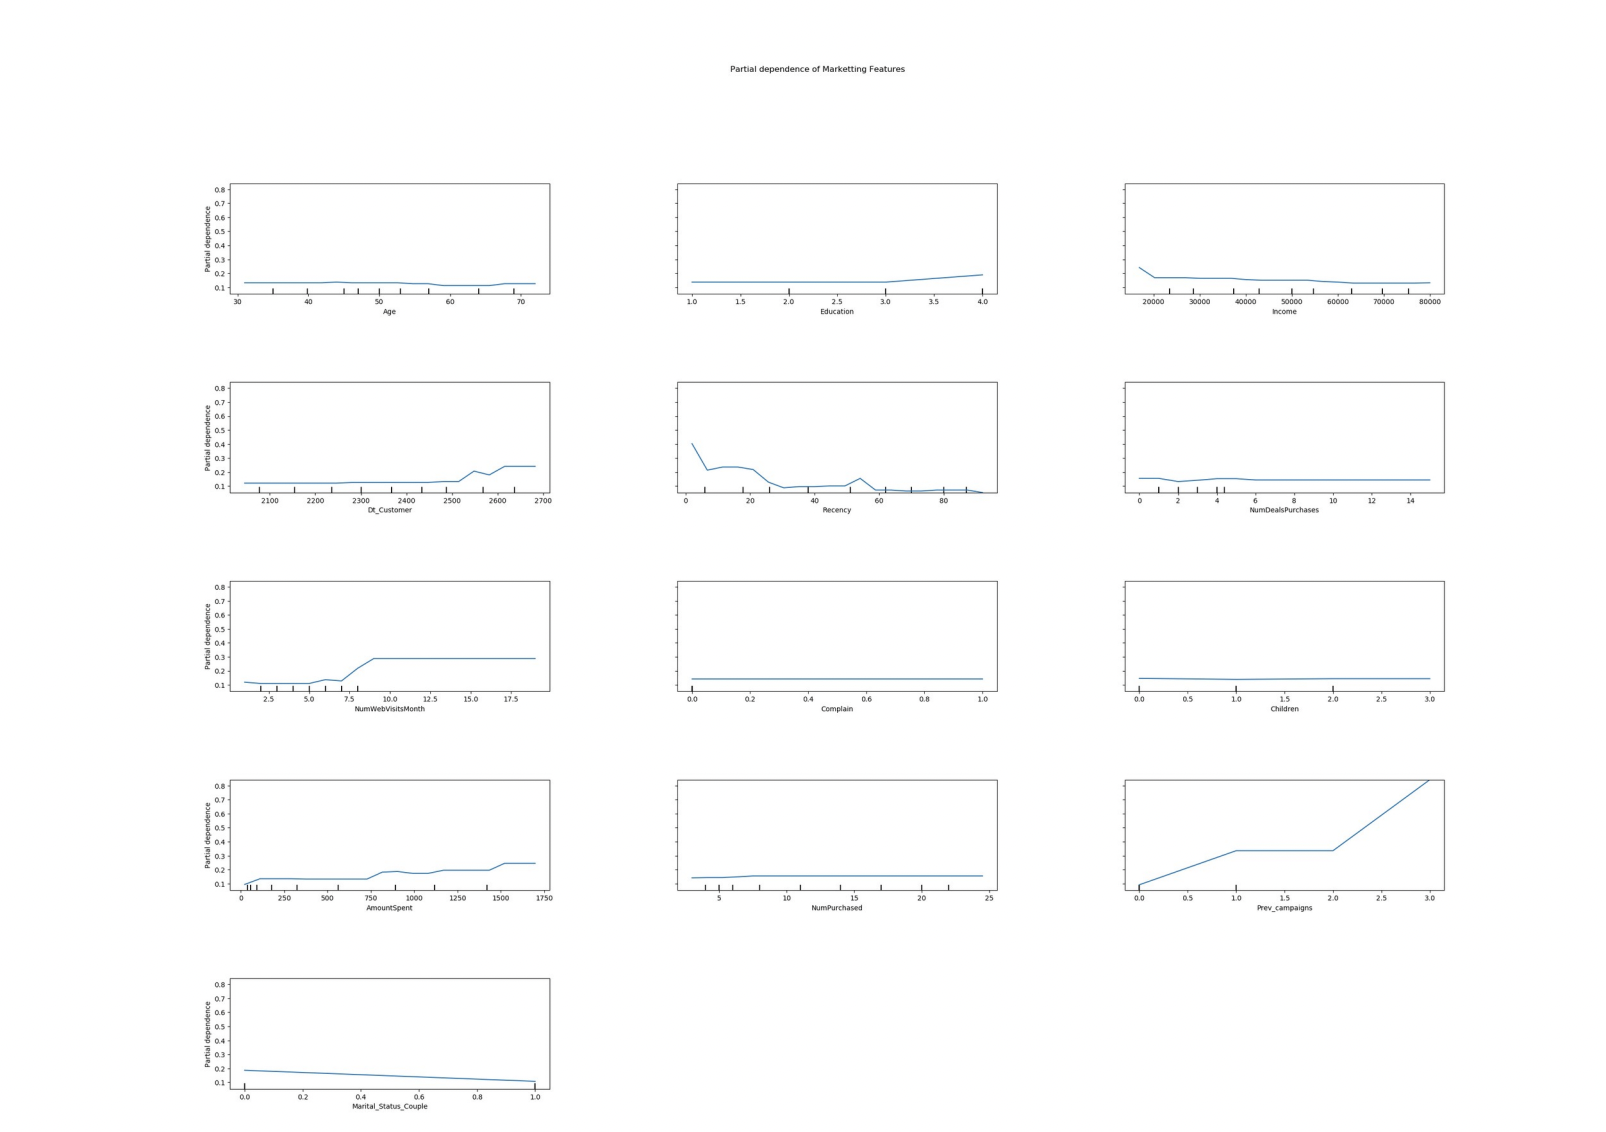







**Comparision between SHAP and Partial Dependence Plot Analysis**


SHAP uses the black-box model to calculate the marginal contribution to the prediction for each feature and then relies on the theoretically sound game theory concept of Shapley values to calculate the feature importance. In this way

1. PDP gives the extent of effect a variable has on the output by freezing the rest of them
2. SHAP gives how much each variable contributes to the prediction

We have to analyze our needs and then consider the tradeoff to select the best suitable interpretable method for the ML model

# AutoML

In [71]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpus8rh69j
  JVM stdout: /tmp/tmpus8rh69j/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpus8rh69j/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.2
H2O_cluster_version_age:    1 month and 3 days
H2O_cluster_name:           H2O_from_python_unknownUser_0us5xt
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [72]:
df = h2o.H2OFrame(data)
df["Response"] = df["Response"].asfactor()
df.describe(chunk_summary=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:2214
Cols:14

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size     size_percentage
------------  -------------------------  -------  ------------------  -------  -----------------
CBS           Binary                     2        14.2857             694  B   1.51396
CXI           Sparse Integers            1        7.14286             118  B   0.257417
C1N           1-Byte Integers (w/o NAs)  8        57.1429             17.8 KB  39.8255
C2            2-Byte Integers            2        14.2857             8.8 KB   19.6161
C8D           64-bit Reals               1        7.14286             17.4 KB  38.7871

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  44.8 KB  2214              1                              14
mean             44.8 KB  2214              1                              14
min              44.8 KB  2214              1                              14
max              44.8 KB  2214              1                              14
stddev           0  B     0                 0                              0
total            44.8 KB  2214              1                              14

Age                 Education           Income              Dt_Customer         Recency             NumDealsPurchases    NumWebVisitsMonth    Complain              Response    Children            AmountSpent        NumPurchased        Prev_campaigns      Marital_Status_Couple
-------  ------------------  ------------------  ------------------  ------------------  ------------------  -------------------  -------------------  --------------------  ----------  ------------------  -----------------  ------------------  ------------------  -----------------------
type     int                 int                 real                int                 int                 int                  int                  int                   enum        int                 int                int                 int                 int
mins     24.0                1.0                 1730.0              2012.0              0.0                 0.0                  0.0                  0.0                               0.0                 5.0                0.0                 0.0                 0.0
mean     51.21318879855459   2.6644083107497774  51266.54151810947   2365.746160794945   49.175700090334274  2.333785004516709    5.355465221318874    0.009485094850948509              0.9579945799457986  597.1404697380312  12.468383017163509  0.2836495031616975  0.6454381210478771
maxs     127.0               4.0                 93404.0             2711.0              99.0                15.0                 20.0                 1.0                               3.0                 2525.0             32.0                4.0                 1.0
sigma    11.971976898459362  0.8389671998614283  20244.354655689065  202.18840379501523  28.94522190386703   1.8937351087986132   2.4064276849329103   0.0969503648918201                0.7500846453017618  594.2820231606587  7.1490264841217295  0.6544602133173475  0.4784884153133252
zeros    0                   0                   0                   0                   28                  30                   7                    2193                              618                 0                  4                   1768                785
missing  0                   0                   0                   0                   0                   0                    0                    0                     0           0                   0                  0                   0                   0
0        63.0                2.0                 58138.0             2675.0              58.0                3.0                  7.0                  0.0                   1           0.0                 1617.0             22.0                0.0                 0.0
1        66.0                2.0                 46344.0             2125.0              38.0                2.0                  5.0                  0.0                   0           2.0                 27.0               4.0                 0.0                 0.0
2        55.0                2.0                 71613.0             2324.0              26.0                1.0                  4.0                  0.0                   0           0.0                 776.0              20.0                0.0                 1.0
3        36.0                2.0                 26646.0             2151.0              26.0                2.0                  6.0                  0.0                   0           1.0                 53.0               6.0                 0.0                 1.0
4        39.0                4.0                 58293.0             2173.0              94.0                5.0                  5.0                  0.0                   0           1.0                 422.0              14.0                0.0                 1.0
5        53.0                3.0                 62513.0             2305.0              16.0                2.0                  6.0                  0.0                   0           1.0   

Splitting data into train test and validation with 70%, 20% and 10% distribution

In [73]:
train, test, valid = df.split_frame(ratios=[0.7, 0.20], seed=1)

In [74]:
aml = H2OAutoML(max_models=10, balance_classes=True, seed=1)
aml.train(training_frame = train, y = 'Response')

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231212_35726


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  6/10
# GBM base models (used / total)      1/4
# XGBoost base models (used / total)  2/3
# DRF base models (used / total)      2/2
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.02513076316907771
RMSE: 0.15852685314822126
LogLoss: 0.10737258858047657
AUC: 0.9942958560343405
AUCPR: 0.9701095466321841
Gini: 0.9885917120686809
Null degrees of freedom: 1570
Residual degrees of freedom: 1564
Null deviance: 1290.6315009362133
Residual deviance: 337.3646733198574
AIC: 351.3646733198574

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46839369964068095
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1330  16   0.0119   (16.0/1346.0)
1      16    209  0.0711   (16.0/225.0)
Total  1346  225  0.0204   (32.0/1571.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.468394     0.928889  145
max f2                       0.468394     0.928889  145
max f0point5                 0.591759     0.937808  123
max accuracy                 0.468394     0.979631  145
max precision                0.996578     1         0
max recall                   0.10178      1         268
max specificity              0.996578     1         0
max absolute_mcc             0.468394     0.917002  145
max min_per_class_accuracy   0.330238     0.96      172
max mean_per_class_accuracy  0.266927     0.963257  186
max tns                      0.996578     1346      0
max fns                      0.996578     224       0
max fps                      0.000257865  1346      399
max tps                      0.10178      225       268
max tnr                      0.996578     1         0
max fnr                      0.996578     0.995556  0
max fpr                      0.000257865  1         399
max tpr                      0.10178      1         268

Gains/Lift Table: Avg response rate: 14.32 %, avg score: 16.60 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101846                   0.968391           6.98222    6.98222            1                0.982437     1                           0.982437            0.0711111       0.0711111                  598.222   598.222            0.0711111
2        0.0203692                   0.949854           6.98222    6.98222            1                0.959423     1                           0.97093             0.0711111       0.142222                   598.222   598.222            0.142222
3        0.0305538                   0.932369           6.98222    6.98222            1                0.94265      1                           0.961503            0.0711111       0.213333                   598.222   598.222            0.213333
4        0.0401018                   0.913198           6.98222    6.98222            1                0.922709     1   

## Understanding the Terminologies

**MSE** (Mean Squared Error) is a commonly used metric for evaluating regression models that measures the average of the squared differences between the predicted values and the actual values.

**RMSE** (Root Mean Squared Error) is the square root of the MSE and is also used as a metric for evaluating regression models. It is preferred over MSE because it is in the same units as the target variable and is easier to interpret.

**LogLoss** (Logarithmic Loss) is a commonly used metric for evaluating classification models that measures the performance of the model based on the predicted probabilities. It penalizes the model more heavily for incorrect predictions with high confidence.

**AUC** (Area Under the Curve) is a metric for evaluating binary classification models that measures the performance of the model across all possible threshold values. It represents the probability that a randomly chosen positive example will be ranked higher than a randomly chosen negative example.

**AUCPR** (Area Under the Precision-Recall Curve) is another metric for evaluating binary classification models that measures the trade-off between precision and recall. It represents the average precision across all possible threshold values.

**Gini** is a metric for evaluating classification models that measures the difference between the observed distribution of class labels and the expected distribution under random chance. It is often used in conjunction with the AUC.

**Null degrees of freedom and residual degrees of freedom** are used in statistical models to describe the number of parameters estimated and the number of independent observations used in the model. The null degrees of freedom represent the number of parameters estimated in a null model (usually a model with no predictors), and the residual degrees of freedom represent the number of independent observations minus the number of parameters estimated in the full model.

**Null deviance and residual deviance** are measures of the goodness-of-fit of a statistical model. The null deviance represents the deviance of a null model (usually a model with no predictors), and the residual deviance represents the deviance of the full model after accounting for the predictors.

**AIC** (Akaike Information Criterion) is a measure of the relative quality of a statistical model for a given set of data. It balances the goodness-of-fit of the model with the complexity of the model, penalizing models with a larger number of parameters. Lower values of AIC indicate a better fit.


In [75]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------
StackedEnsemble_AllModels_1_AutoML_1_20231212_35726     0.893325   0.262511  0.614141                0.211217  0.28172   0.0793662
StackedEnsemble_BestOfFamily_1_AutoML_1_20231212_35726  0.892675   0.263316  0.616474                0.204212  0.281641  0.0793217
GBM_1_AutoML_1_20231212_35726                           0.883001   0.278643  0.599883                0.212013  0.291548  0.0850005
DRF_1_AutoML_1_20231212_35726                           0.875463   0.48597   0.548558                0.207973  0.324676  0.105414
XGBoost_1_AutoML_1_20231212_35726                       0.875311   0.343623  0.547183                0.210168  0.325547  0.105981
XGBoost_2_AutoML_1_20231212_35726                       0.874212   0.328239  0.558974                0.239024  0.318935  0.101719
XGBoost_3_AutoML_1_20231212_35726                       0.869406   0.336382  0.539001                0.243456  0.317048  0.10052
XRT_1_AutoML_1_20231212_35726                           0.868519   0.356545  0.518774                0.223163  0.330512  0.109238
GLM_1_AutoML_1_20231212_35726                           0.868493   0.282184  0.586147                0.242341  0.291099  0.0847389
GBM_3_AutoML_1_20231212_35726                           0.863929   0.318096  0.544229                0.214998  0.30941   0.0957348
GBM_2_AutoML_1_20231212_35726                           0.86154    0.315409  0.544486                0.253087  0.308526  0.0951885
GBM_4_AutoML_1_20231212_35726                           0.857499   0.325449  0.545706                0.227203  0.311404  0.0969725
[12 rows x 7 columns]

## Model Leaderboard

The above leaderboard shows models ranked according to their AUC, with highest AUC being the best performing model

Our best performing model is a stacked Ensemble model made by combining different GBM XGBoost or XRT models

In [76]:
#Getting the best model
best_model = h2o.get_model(lb[0,"model_id"])
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.07969624237659438
RMSE: 0.2823052290989212
LogLoss: 0.2713632108588032
AUC: 0.8972368211498647
AUCPR: 0.6980599243349521
Gini: 0.7944736422997294
Null degrees of freedom: 432
Residual degrees of freedom: 426
Null deviance: 380.7153717961534
Residual deviance: 235.00054060372366
AIC: 249.00054060372366

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30426708822237103
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      342  22   0.0604   (22.0/364.0)
1      25   44   0.3623   (25.0/69.0)
Total  367  66   0.1085   (47.0/433.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.304267     0.651852  63
max f2                       0.189829     0.729167  103
max f0point5                 0.549347     0.714286  34
max accuracy                 0.405019     0.900693  49
max precision                0.989366     1         0
max recall                   0.000459729  1         390
max specificity              0.989366     1         0
max absolute_mcc             0.393673     0.599592  51
max min_per_class_accuracy   0.175712     0.826087  111
max mean_per_class_accuracy  0.189829     0.834369  103
max tns                      0.989366     364       0
max fns                      0.989366     68        0
max fps                      0.000109676  364       399
max tps                      0.000459729  69        390
max tnr                      0.989366     1         0
max fnr                      0.989366     0.985507  0
max fpr                      0.000109676  1         399
max tpr                      0.000459729  1         390

Gains/Lift Table: Avg response rate: 15.94 %, avg score: 14.78 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0115473                   0.925987           6.27536   6.27536            1                0.965458     1                           0.965458            0.0724638       0.0724638                  527.536   527.536            0.0724638
2        0.0207852                   0.853652           6.27536   6.27536            1                0.877348     1                           0.926298            0.057971        0.130435                   527.536   527.536            0.130435
3        0.0300231                   0.803772           4.70652   5.79264            0.75             0.832682     0.923077                    0.897493            0.0434783       0.173913                   370.652   479.264            0.171166
4        0.0415704                   0.775286           3.76522   5.22947            0.6              0.793913     0.833333                    0.868721            0.0434783       0.217391                   276.522   422.947            0.20915
5        0.0531178                   0.715801           5.02029   5.18399            0.8              0.732819     0.826087                    0.839177            0.057971        0.275362                   402.029   418.399            0.264373
6        0.101617                    0.502499           4.18357   4.70652            0.666667         0.57338      0.75                        0.712319            0.202899        0.478261                   318.357   370.652            0.448041
7        0.150115                    0.304697           2.98827   4.15139            0.47619          0.388833     0.661538                    0.607

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

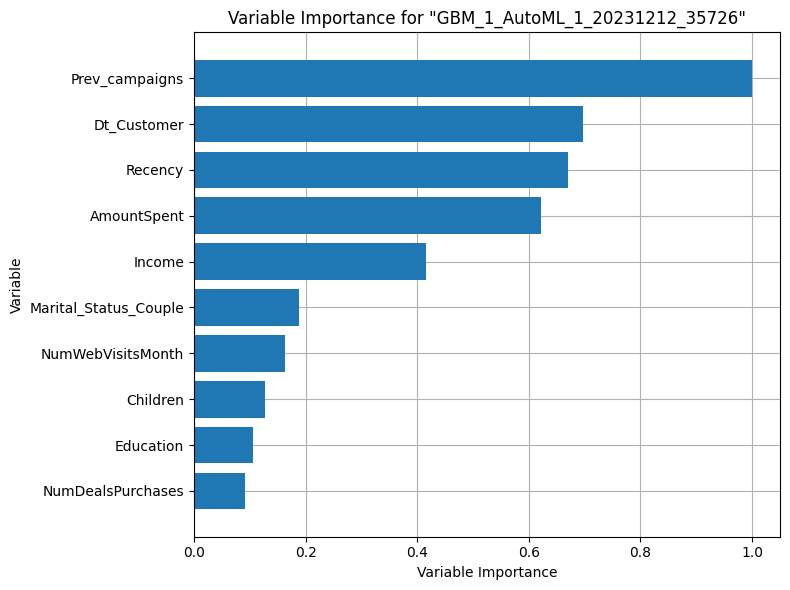

In [77]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])


## Variable Importance

*   The above graph shows prev_campaigns has the highest variable importance which was expected as a customer who has previously reponded to a campaign is more likely to respond to a new campaign
*   The lease important column being Maritial_status dummy column, age and number of children with less than 20% importance as compared to prev_campaigns




# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

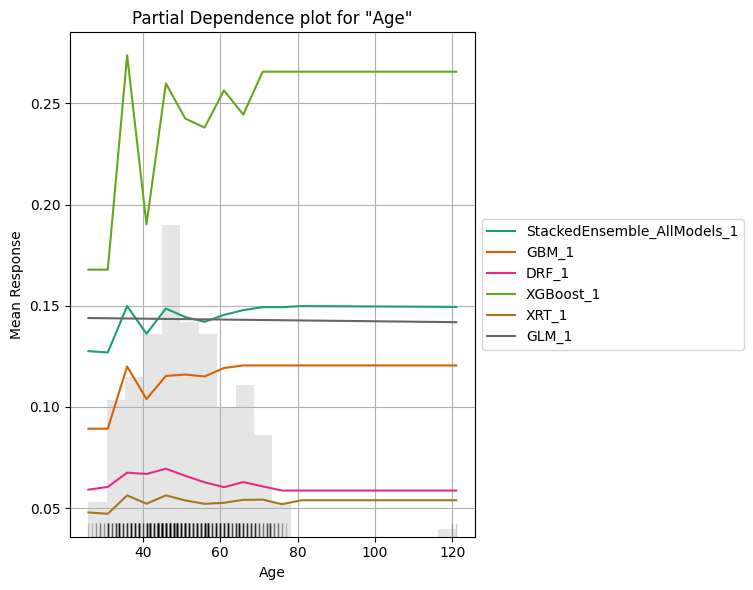

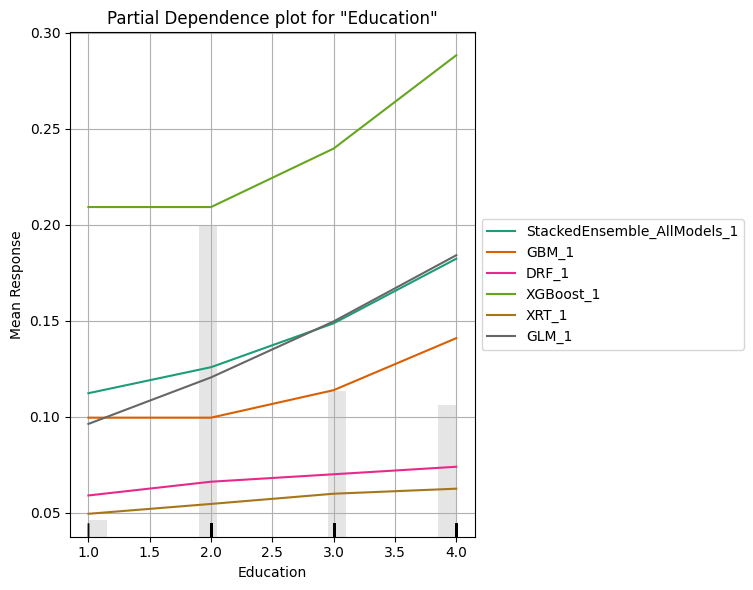

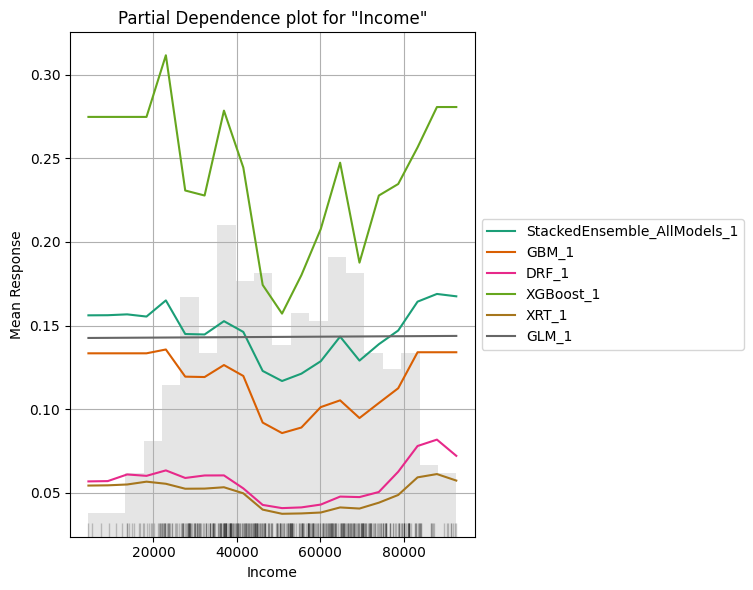

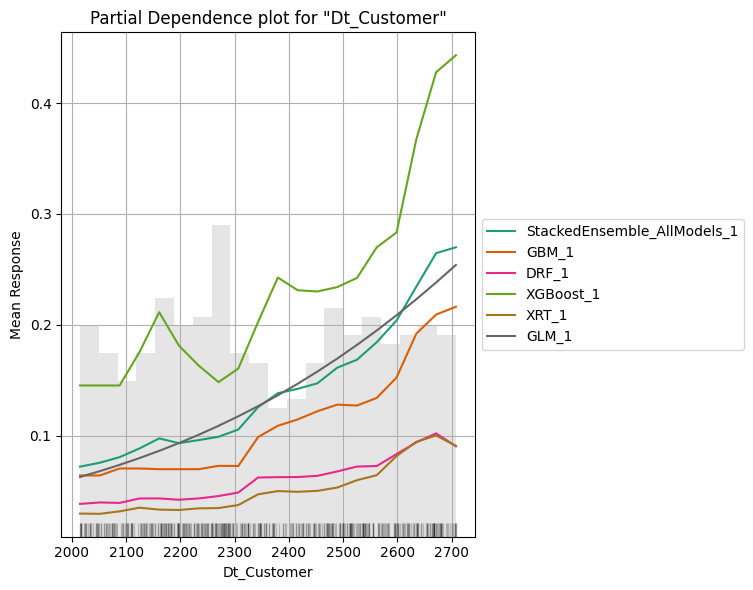

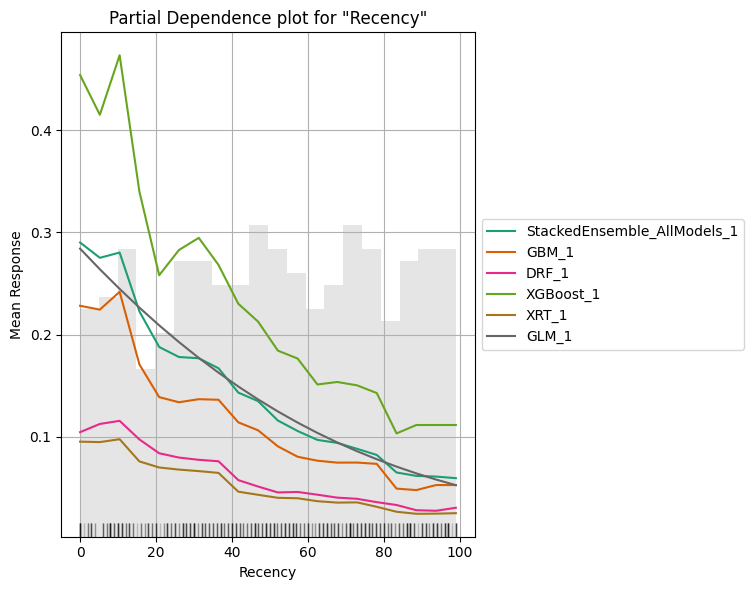

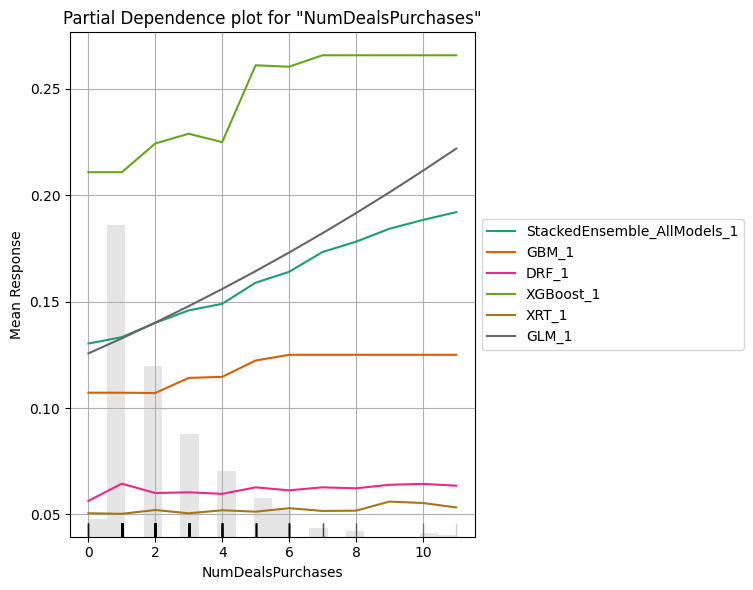

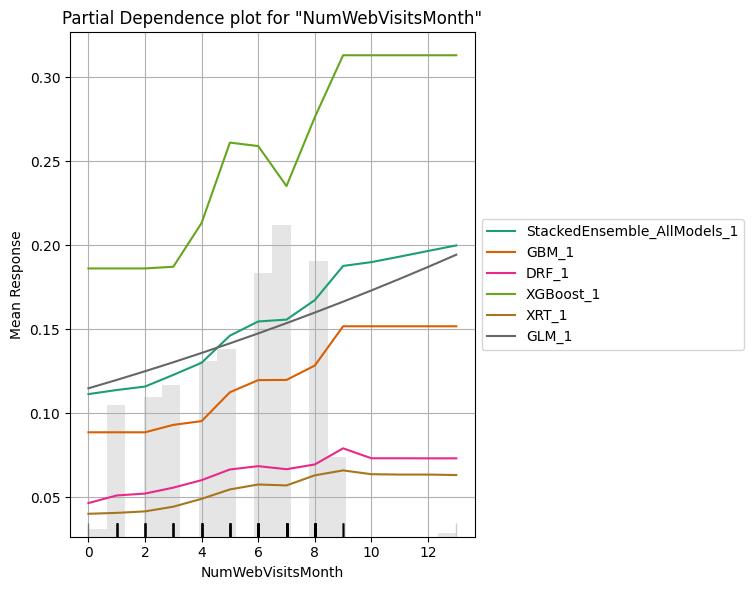

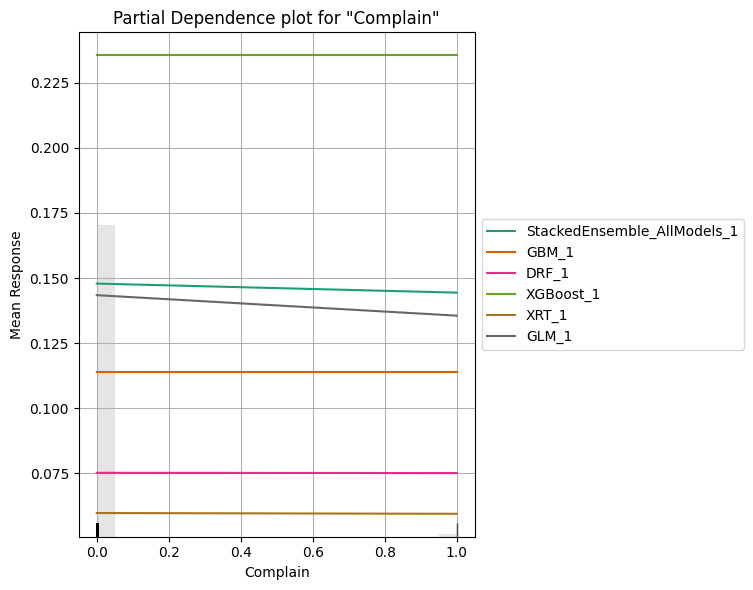

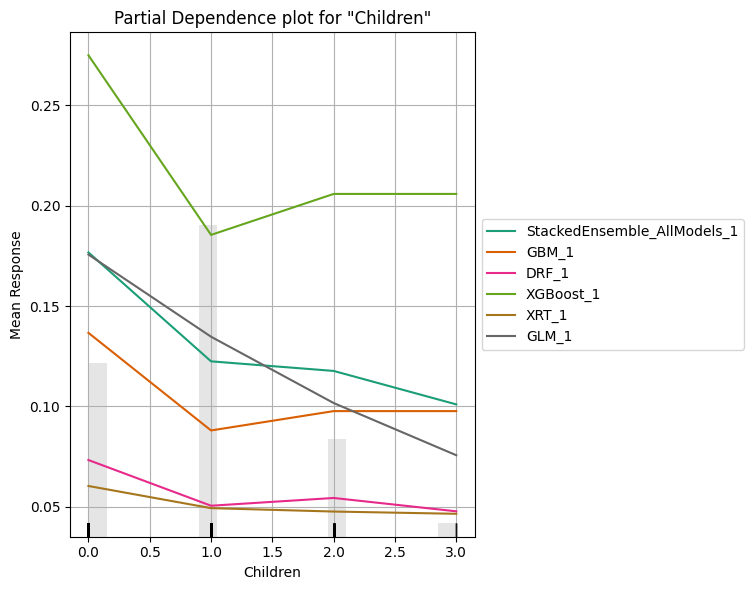

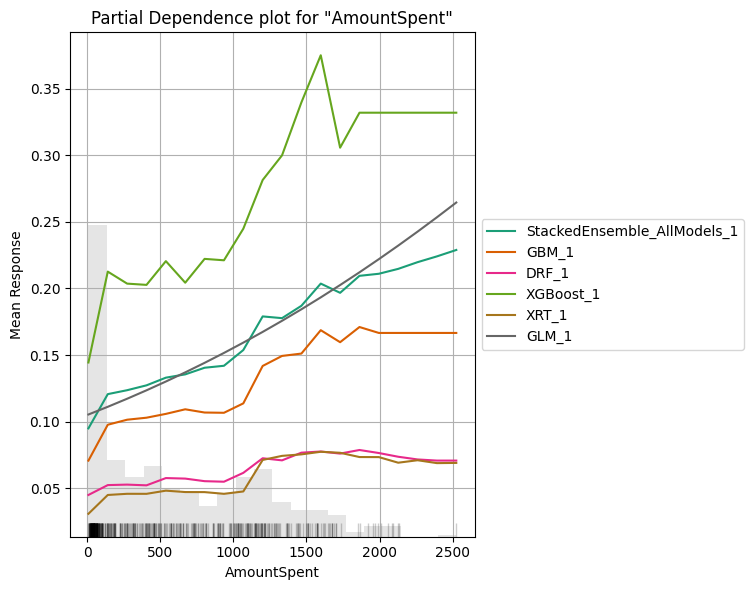

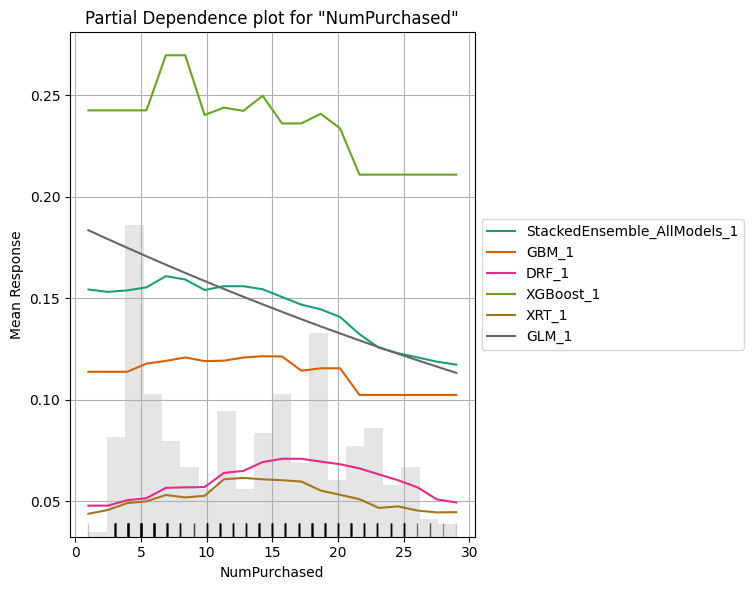

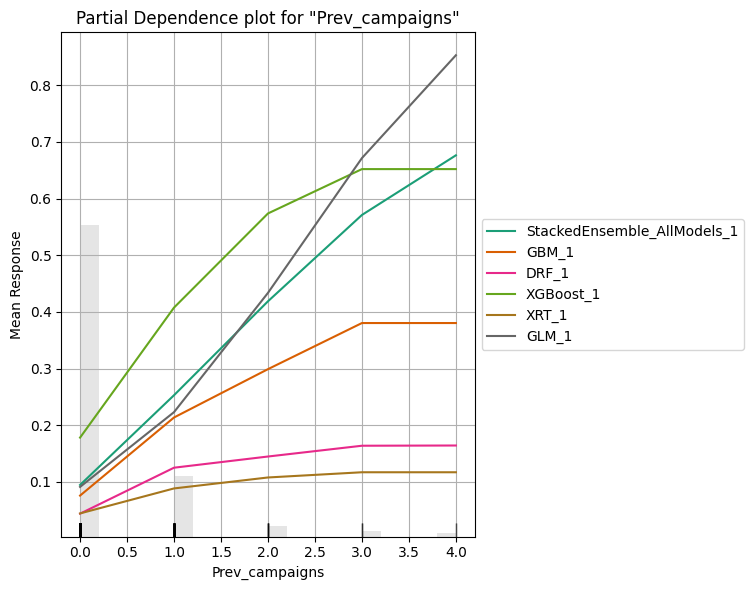

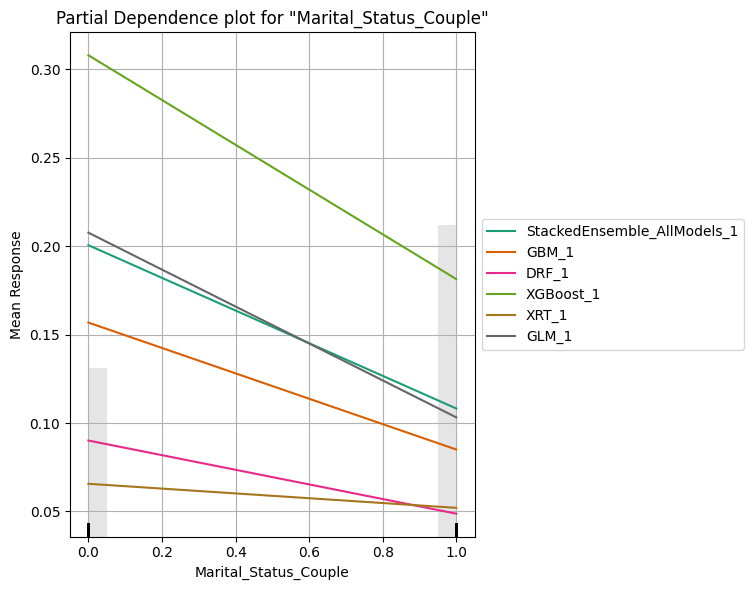

In [78]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])

**Interpreting Variable Importance**

The variable importance graph of best model of autoML shows us thet Prev_campaign is most important feature of the model followed by amount spent and Dt_customer, recency

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

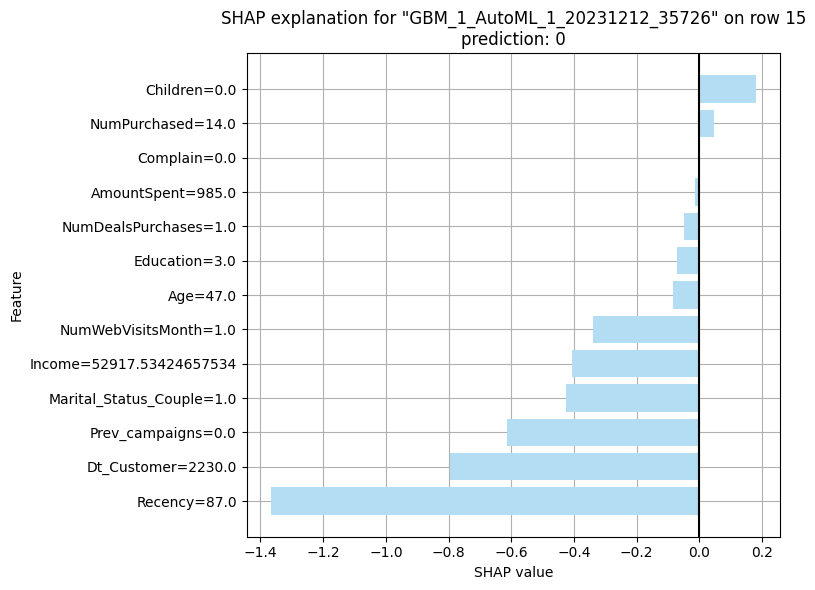

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

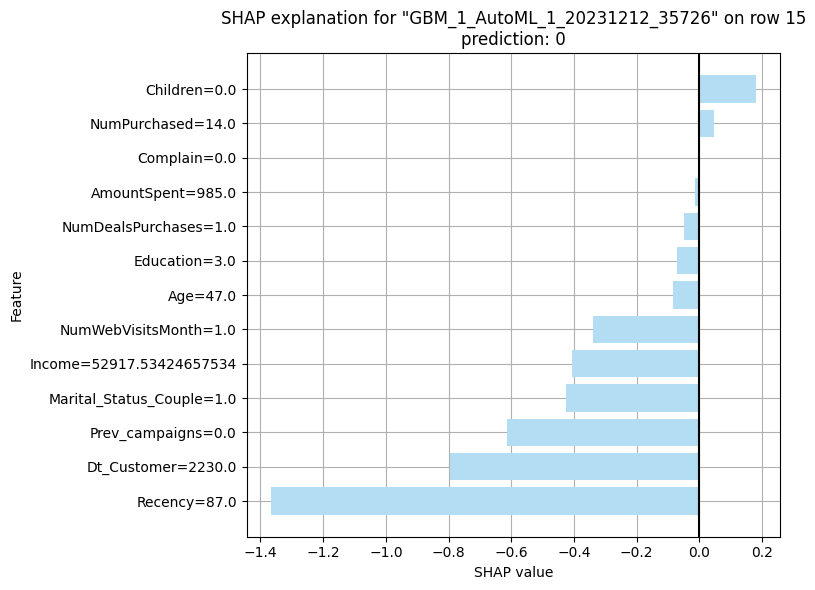

In [79]:
aml.explain_row(frame = test, row_index = 15, figsize = (8,6), exclude_explanations = "leaderboard")

## Ridge Regularization in H20

In [80]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# set the response column and predictor columns
response_col = "Response"
predictor_cols = df.columns
predictor_cols.remove("Response")

# create a logistic regression model with Ridge regularization
glm = H2OGeneralizedLinearEstimator(family="binomial", alpha=0, lambda_=0.1)

# train the model on your data
glm.train(x=predictor_cols, y=response_col, training_frame=train)

# view the model performance metrics
print(glm.model_performance())

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09082020073105623
RMSE: 0.30136390084257975
LogLoss: 0.3054109728542615
AUC: 0.8678438170711573
AUCPR: 0.5865194277305888
Gini: 0.7356876341423146
Null degrees of freedom: 1570
Residual degrees of freedom: 1557
Null deviance: 1290.6315009362133
Residual deviance: 959.6012767080898
AIC: 987.6012767080898

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1941237137436041
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1185  161  0.1196   (161.0/1346.0)
1      73    152  0.3244   (73.0/225.0)
Total  1258  313  0.1489   (234.0/1571.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.194124     0.565056  175
max f2                     

## Lasso Regularization

In [81]:
glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=1, nfolds=5
)  # LASSO Regularization

In [82]:
glm_regularization_lasso.train(x=predictor_cols, y=response_col, training_frame=train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1702353434311_1784


GLM Model: summary
    family    link    regularization             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  -------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 1.39E-4 )  13                            11                             4                       py_3_sid_a4a6

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.08249306310064208
RMSE: 0.2872160564812526
LogLoss: 0.2746451781943107
AUC: 0.8764289252105003
AUCPR: 0.6070438511757077
Gini: 0.7528578504210006
Null degrees of freedom: 1570
Residual degrees of freedom: 1559
Null deviance: 1290.6315009362133
Residual deviance: 862.9351498865241
AIC: 886.9351498865241

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29958156653283496
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      1249  97   0.0721   (97.0/1346.0)
1      91    134  0.4044   (91.0/225.0)
Total  1340  231  0.1197   (188.0/1571.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.299582     0.587719  154
max f2                       0.130072     0.652493  243
max f0point5                 0.529153     0.624071  85
max accuracy                 0.553555     0.892425  80
max precision                0.99835      1         0
max recall                   0.012298     1         378
max specificity              0.99835      1         0
max absolute_mcc             0.299582     0.517802  154
max min_per_class_accuracy   0.130072     0.787519  243
max mean_per_class_accuracy  0.182237     0.790528  210
max tns                      0.99835      1346      0
max fns                      0.99835      224       0
max fps                      0.000688878  1346      399
max tps                      0.012298     225       378
max tnr                      0.99835      1         0
max fnr                      0.99835      0.995556  0
max fpr                      0.000688878  1         399
max tpr                      0.012298     1         378

Gains/Lift Table: Avg response rate: 14.32 %, avg score: 14.32 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101846                   0.901118           5.67306    5.67306            0.8125           0.94307     0.8125                      0.94307             0.0577778       0.0577778                  467.306   467.306            0.055549
2        0.0203692                   0.84615            6.98222    6.32764            1                0.871797    0.90625                     0.907434            0.0711111       0.128889                   598.222   532.764            0.12666
3        0.0305538                   0.778106           5.67306    6.10944            0.8125           0.807066    0.875                       0.873978            0.0577778       0.186667                   467.306   510.944            0.182209
4        0.0401018                   0.712712           5.1203     5.87393            0.733333         0.747581    0.84127                     0.843883            0.0488889       0.235556                   412.03    487.393            0.228126
5        0.0502864           

## Understanding Regularization Results


*   The MSE increased from 0.079 to 0.085, RMSE increased from 0.28 to 0.29 in cross-validation results
*   The AUC values were between 0.86 - 0.89 across all three instances morever the regularized models having slightly lower values

*   This suggests that for this particular dataset regularization did not help in improving the model





# Hyper Parameter Tunning

In [83]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [84]:
hyper_params = {
    "learn_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "sample_rate": [0.8, 0.9, 1.0],
    "col_sample_rate": [0.8, 0.9, 1.0]
}
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [85]:
gbm_grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=hyper_params,
    search_criteria=search_criteria,
)

gbm_grid.train(
    x=predictor_cols, y=response_col, training_frame=train, validation_frame=valid, ntrees=100, seed=1
)



gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing logloss
     col_sample_rate    learn_rate    max_depth    sample_rate    model_ids           logloss
---  -----------------  ------------  -----------  -------------  ------------------  -------------------
     0.8                0.05          7.0          0.8            gbm_grid2_model_8   0.2243222381450682
     0.8                0.05          5.0          0.9            gbm_grid2_model_23  0.2245855105913488
     0.9                0.1           5.0          0.8            gbm_grid2_model_10  0.22499757891027283
     0.8                0.1           5.0          0.9            gbm_grid2_model_7   0.22643303470718534
     1.0                0.05          5.0          0.9            gbm_grid2_model_29  0.22672999825598736
     1.0                0.1           5.0          1.0            gbm_grid2_model_6   0.22759967598865022
     0.9                0.05          5.0          0.9            gbm_grid2_model_3   0.22761910915575218
     1.0                0.05          7.0          0.9            gbm_grid2_model_2   0.2278252738572041
     0.8                0.05          5.0          0.8            gbm_grid2_model_1   0.22813715108239335
     0.9                0.05          7.0          0.8            gbm_grid2_model_21  0.23107409809426813
---  ---                ---           ---          ---            ---                 ---
     0.9                0.01          7.0          0.9            gbm_grid2_model_14  0.27409686600103944
     1.0                0.01          7.0          0.8            gbm_grid2_model_18  0.2756006906439407
     0.8                0.01          5.0          1.0            gbm_grid2_model_36  0.28162180357554817
     1.0                0.01          3.0          1.0            gbm_grid2_model_5   0.30715433247370455
     0.8                0.01          3.0          0.8            gbm_grid2_model_11  0.3074045234160428
     1.0                0.01          3.0          0.8            gbm_grid2_model_32  0.3077493541327802
     0.9                0.01          3.0          0.8            gbm_grid2_model_20  0.3083176278901996
     0.9                0.01          3.0          0.9            gbm_grid2_model_4   0.3086663944350721
     0.8                0.01          3.0          1.0            gbm_grid2_model_9   0.3095074833880169
     1.0                0.01          3.0          0.9            gbm_grid2_model_12  0.3111522820754991
[36 rows x 7 columns]

In [86]:
parameterGrid = gbm_grid.get_grid(sort_by="logloss", decreasing=False)


In [87]:
list_hyperparameters = []
for i in range(36):
    list_hyperparameters.append(parameterGrid.get_hyperparams_dict(i))

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [88]:
models = parameterGrid.models

In [89]:
list_logloss = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(valid)
    logloss = performance_metrics.logloss()
    list_logloss.append(logloss)

In [90]:
for i in range(36):
    list_hyperparameters[i]["logloss"] = list_logloss[i]

In [91]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)
hyperparameters_dataframe

col_sample_rate  learn_rate  max_depth  sample_rate   logloss
0               0.8        0.05          7          0.8  0.224322
1               0.8        0.05          5          0.9  0.224586
2               0.9        0.10          5          0.8  0.224998
3               0.8        0.10          5          0.9  0.226433
4               1.0        0.05          5          0.9  0.226730
5               1.0        0.10          5          1.0  0.227600
6               0.9        0.05          5          0.9  0.227619
7               1.0        0.05          7          0.9  0.227825
8               0.8        0.05          5          0.8  0.228137
9               0.9        0.05          7          0.8  0.231074
10              0.9        0.05          7          0.9  0.231773
11              1.0        0.05          7          1.0  0.232315
12              1.0        0.10          3          0.9  0.232678
13              1.0        0.10          5          0.9  0.233385
14              0.8        0.10          7          1.0  0.233523
15              0.9        0.10          3          0.9  0.238098
16              1.0        0.05          3          0.9  0.238882
17              0.8        0.05          3          1.0  0.239176
18              0.8        0.05          3          0.9  0.241173
19              0.9        0.05          3          1.0  0.243099
20              0.8        0.10          7          0.8  0.245090
21              1.0        0.10          3          0.8  0.245205
22              0.9        0.05          3          0.8  0.246999
23              1.0        0.10          7          0.8  0.249242
24              0.9        0.10          7          0.9  0.249894
25              0.9        0.01          7          0.8  0.273036
26              0.9        0.01          7          0.9  0.274097
27              1.0        0.01          7          0.8  0.275601
28              0.8        0.01          5          1.0  0.281622
29              1.0        0.01          3          1.0  0.307154
30              0.8        0.01          3          0.8  0.307405
31              1.0        0.01          3          0.8  0.307749
32              0.9        0.01          3          0.8  0.308318
33              0.9        0.01          3          0.9  0.308666
34              0.8        0.01          3          1.0  0.309507
35              1.0        0.01          3          0.9  0.311152

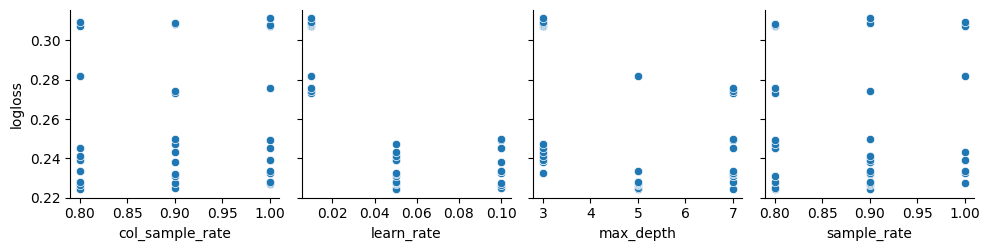

In [92]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["logloss"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

**Hyperparameter Tuning Analysis**

This is a summary of hyperparameter tuning for an XGBoost model, which involved a grid search over a range of values for four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. The search resulted in a total of 36 combinations of hyperparameters, and for each combination, the logloss was calculated as an evaluation metric.



*   Based on the results, the hyperparameter combination with the lowest logloss was a model with col_sample_rate of 1.0, learn_rate of 0.10, max_depth of 5, and sample_rate of 0.9, with a logloss of 0.225866. The worst-performing models had logloss of 0.319389.

*   Overall, the results suggest that the combination of col_sample_rate, learn_rate, max_depth, and sample_rate can have a significant impact on the performance of an XGBoost model, and that hyperparameter tuning can lead to significant improvements in model performance.


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20231212_35726     0.897237   0.271363  0.69806                 0.211379  0.282305  0.0796962                7907                   0.083125  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20231212_35726  0.89445    0.274628  0.693632                0.220377  0.283423  0.0803287                5931                   0.099759  StackedEnsemble
XGBoost_2_AutoML_1_20231212_35726                       0.893255   0.303266  0.644212                0.23487   0.304376  0.0926446                 678                   0.024455  XGBoost
GBM_1_AutoML_1_20231212_35726                           0.889891   0.295518  0.637312                0.190257  0.302367  0.091426                 1741                   0.024247  GBM
GLM_1_AutoML_1_20231212_35726                           0.887064   0.284125  0.655516                0.176003  0.294647  0.0868169                 214                   0.011624  GLM
XGBoost_1_AutoML_1_20231212_35726                       0.884456   0.331018  0.642736                0.191253  0.320295  0.102589                 1966                   0.031665  XGBoost
GBM_2_AutoML_1_20231212_35726                           0.880057   0.318683  0.657237                0.237239  0.310094  0.0961586                 447                   0.024071  GBM
XGBoost_3_AutoML_1_20231212_35726                       0.879877   0.312066  0.64453                 0.245242  0.307574  0.094602                  876                   0.016599  XGBoost
GBM_4_AutoML_1_20231212_35726                           0.867793   0.336997  0.646305                0.2155    0.312978  0.0979555                 477                   0.025869  GBM
GBM_3_AutoML_1_20231212_35726                           0.867236   0.337734  0.62799                 0.219621  0.315842  0.099756                  601                   0.024631  GBM
DRF_1_AutoML_1_20231212_35726                           0.852763   0.654173  0.602023                0.231605  0.329427  0.108522                 1017                   0.035862  DRF
XRT_1_AutoML_1_20231212_35726                           0.852544   0.460065  0.576829                0.218347  0.341437  0.116579                  947                   0.038305  DRF
[12 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20231212_35726

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30426708822237103
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      342  22   0.0604   (22.0/364.0)
1      25   44   0.3623   (25.0/69.0)
Total  367  66   0.1085   (47.0/433.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

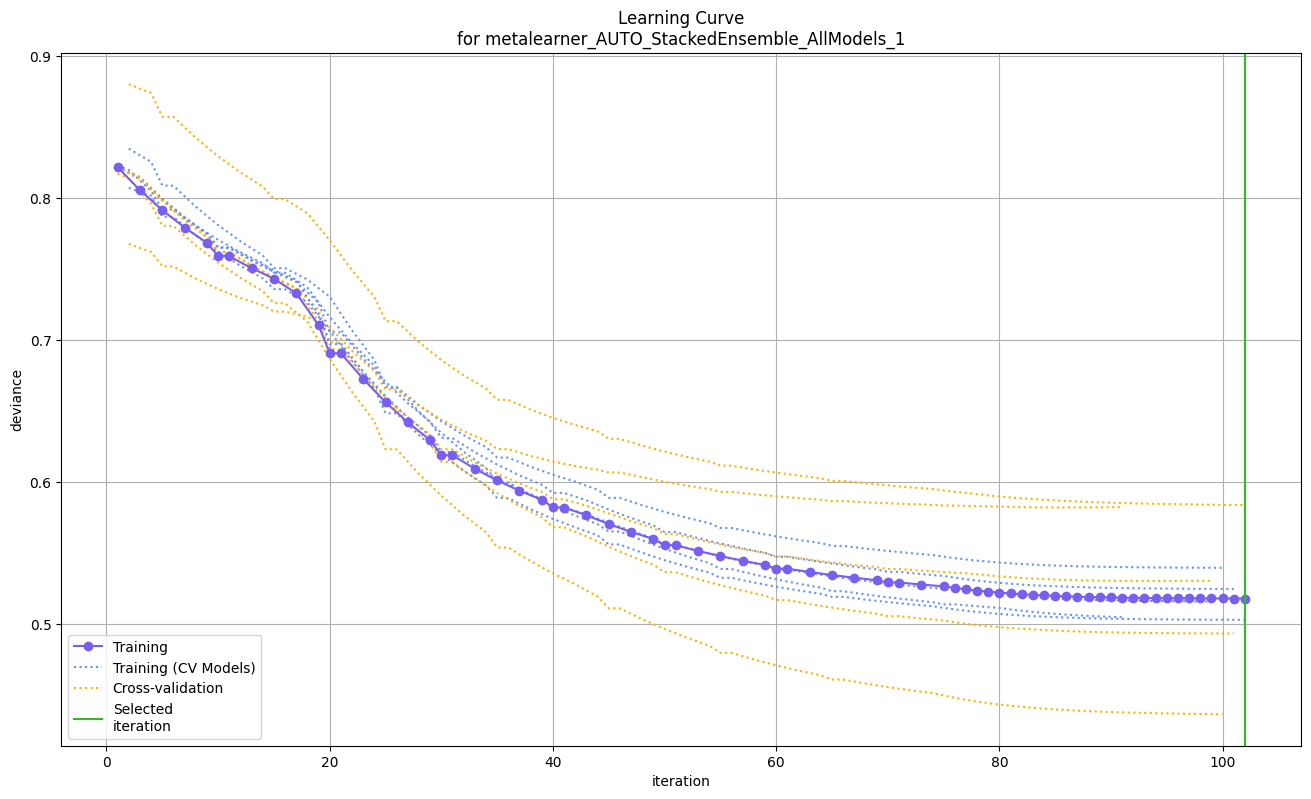

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

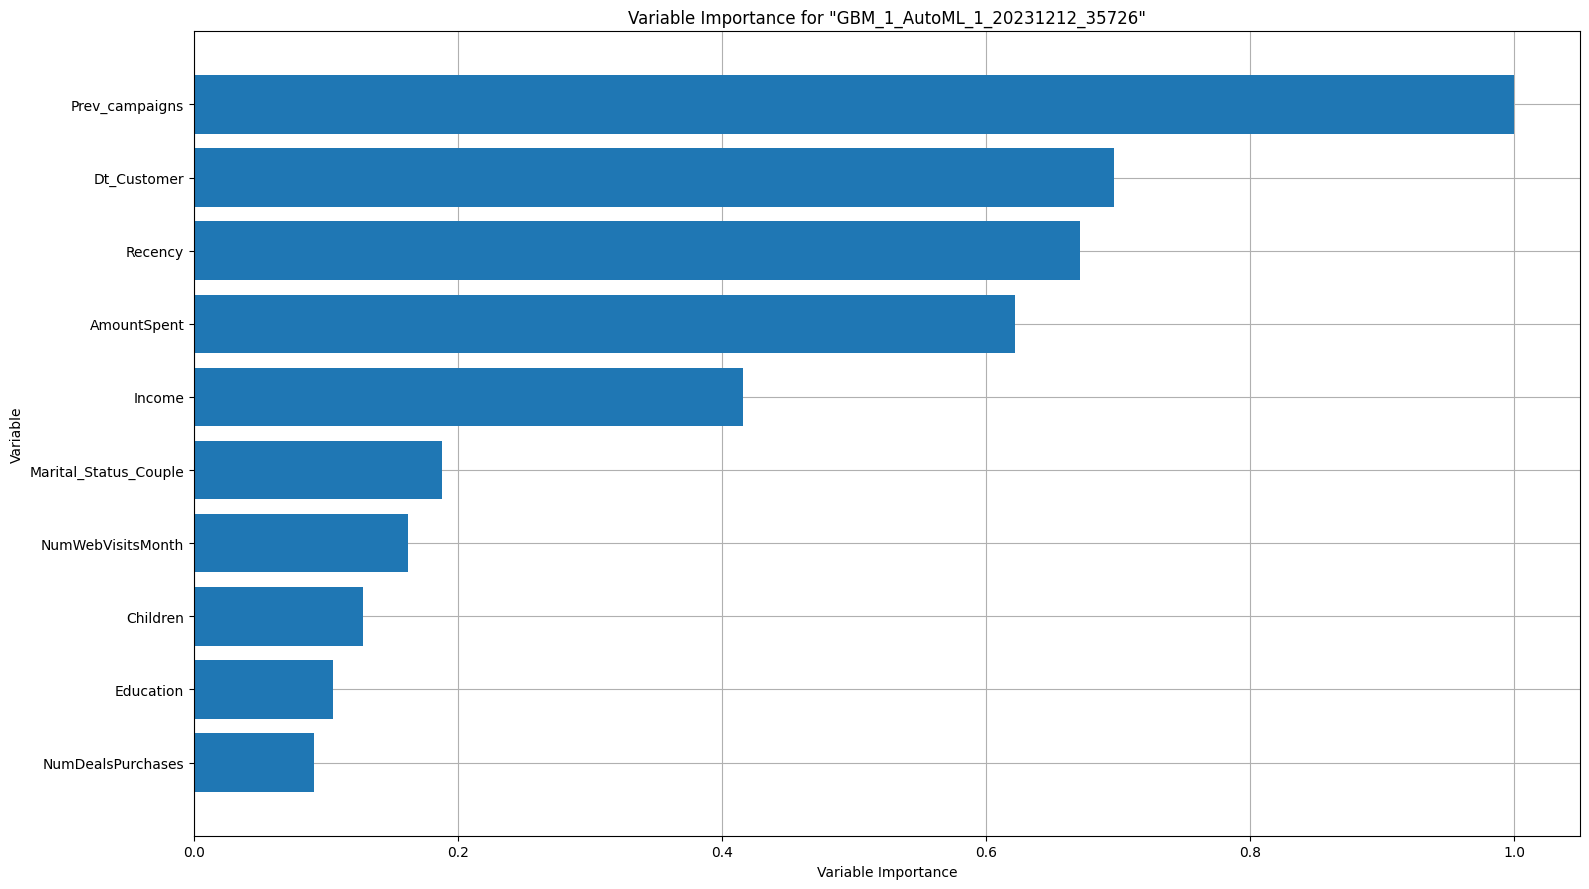

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

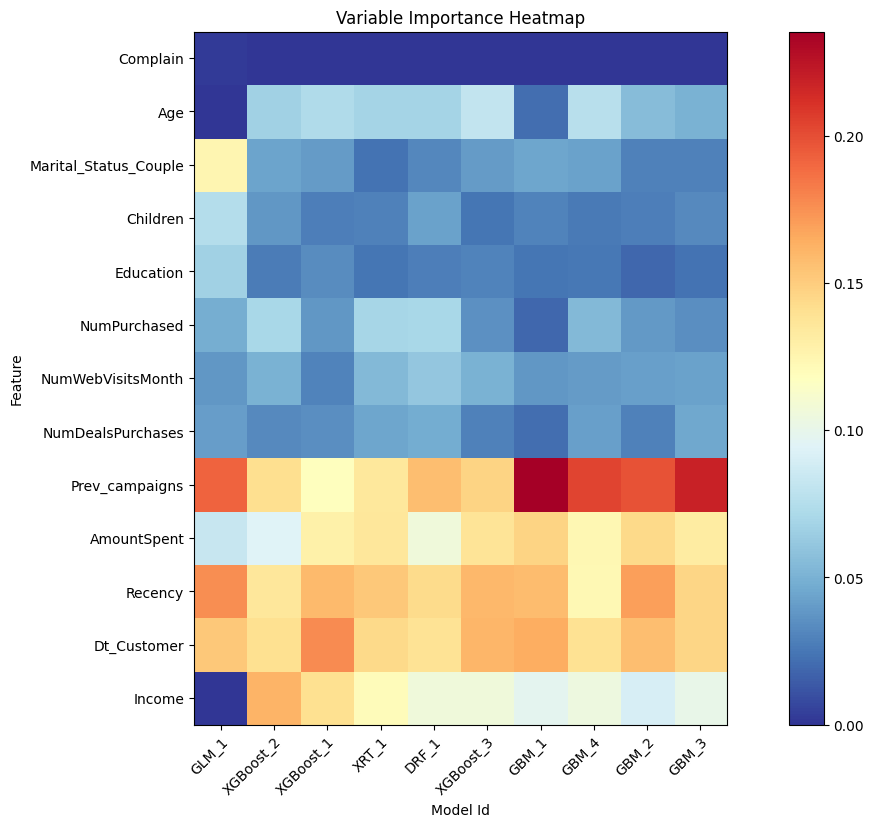

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

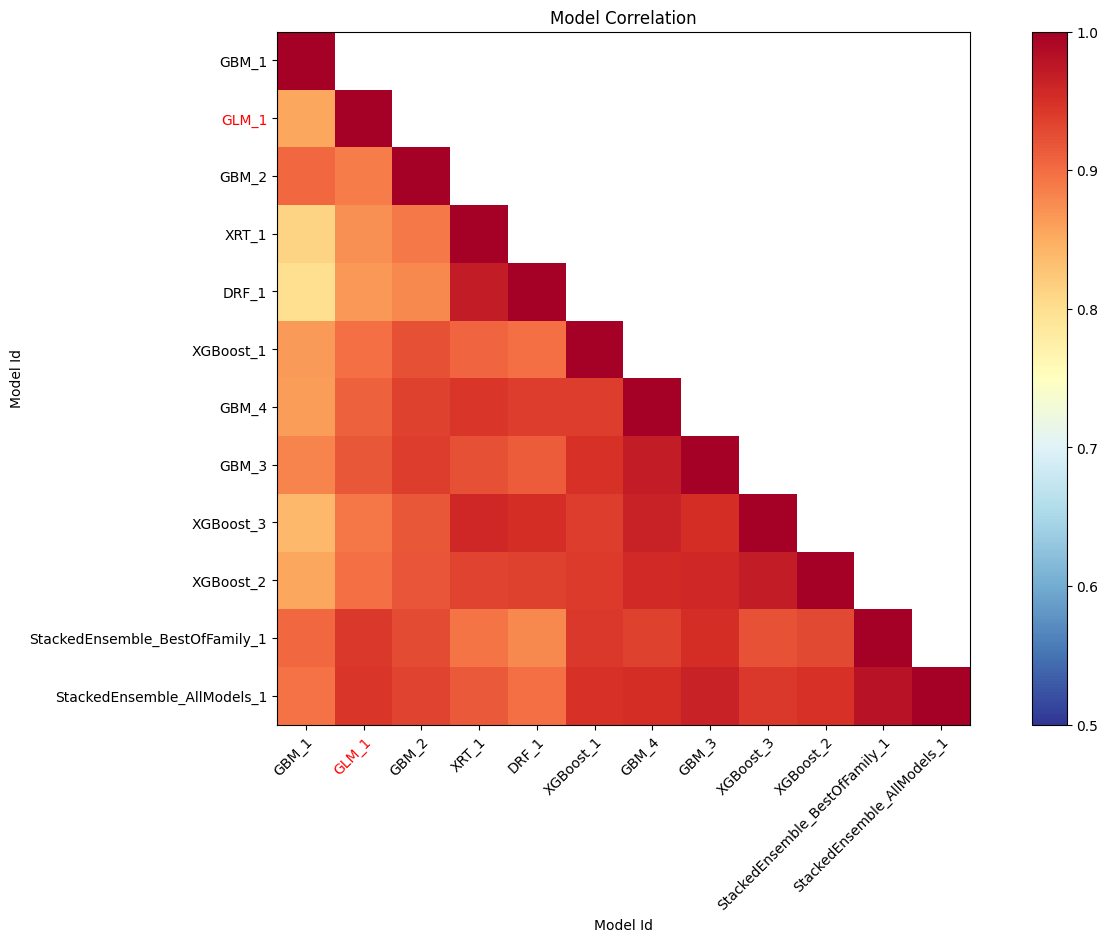

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

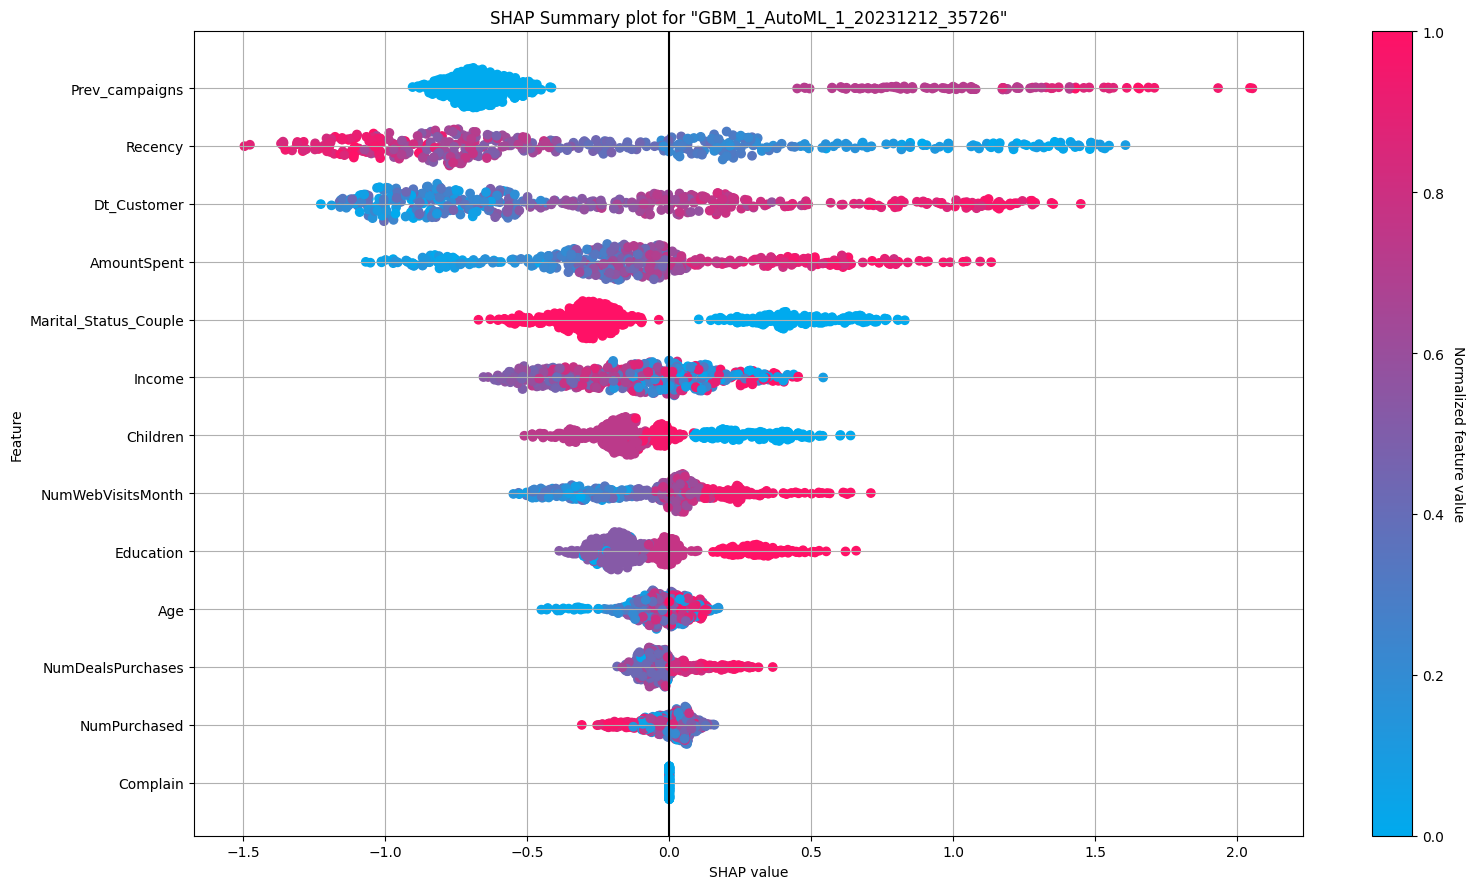

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

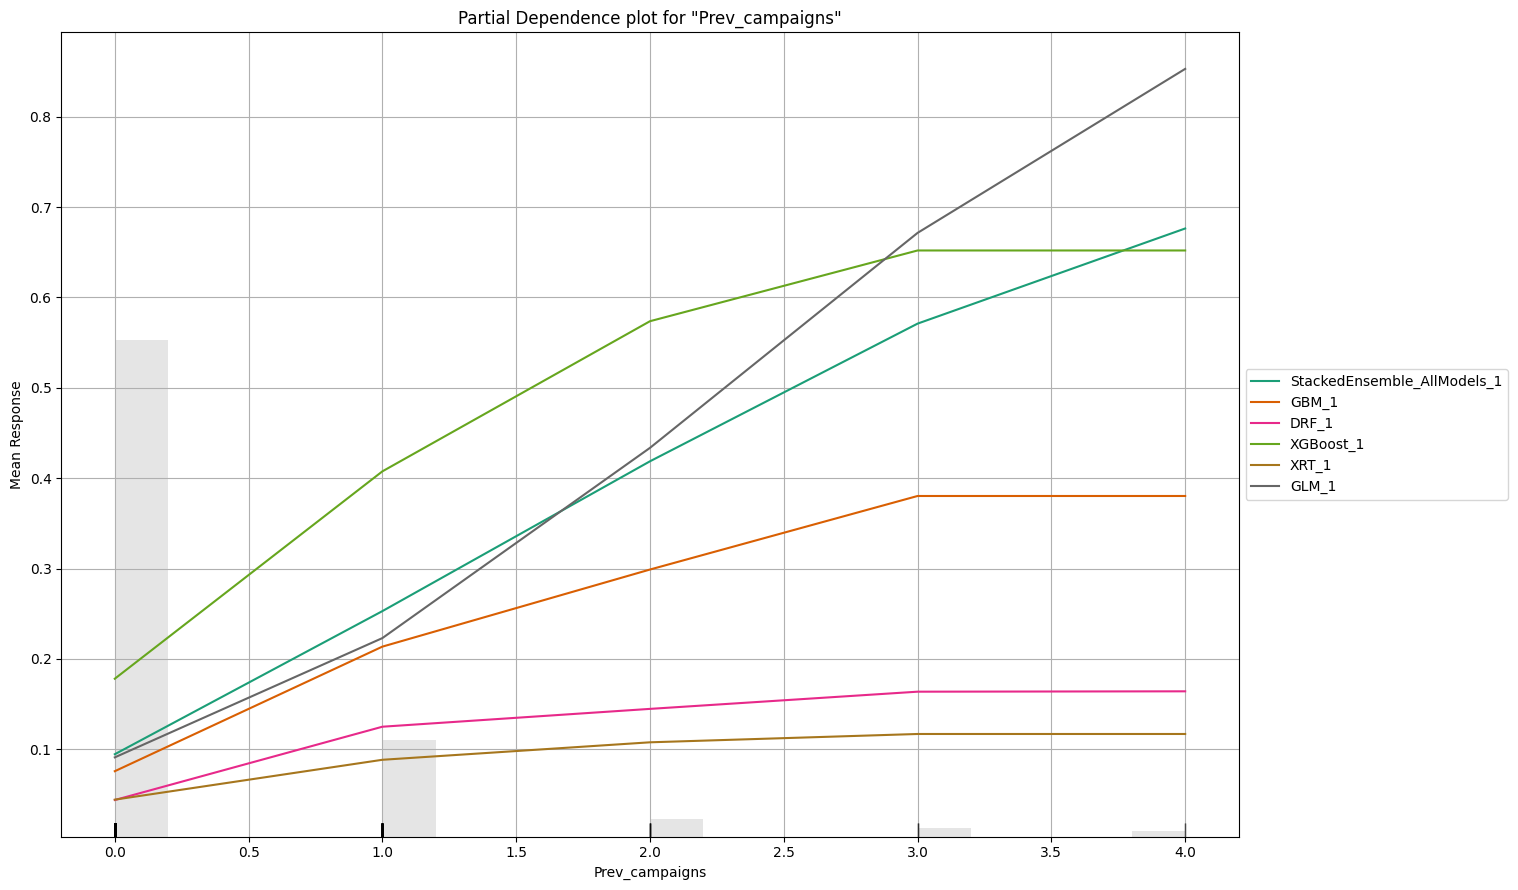

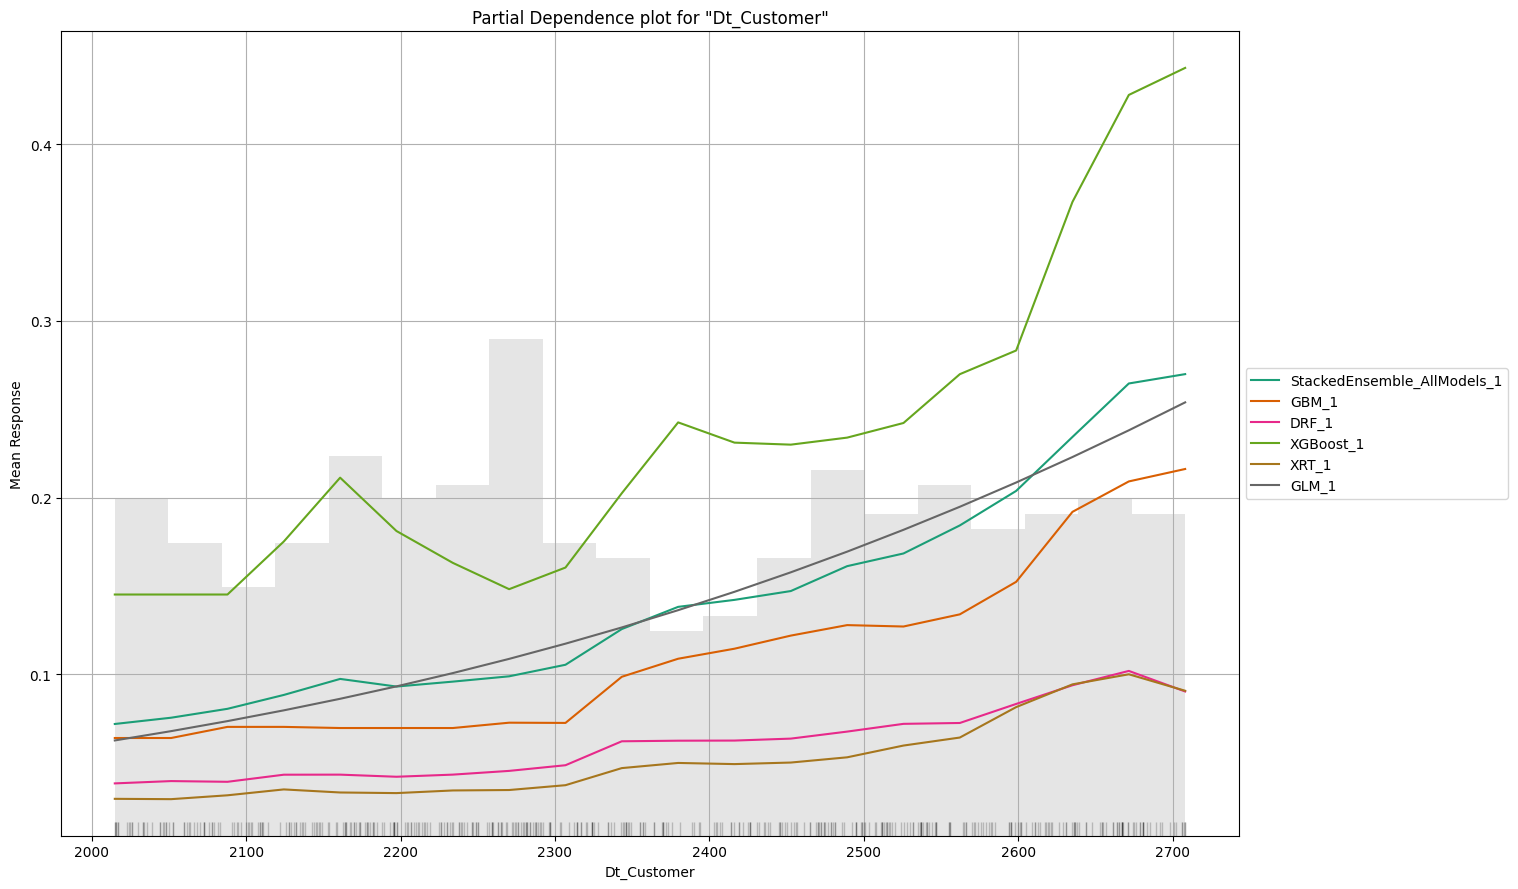

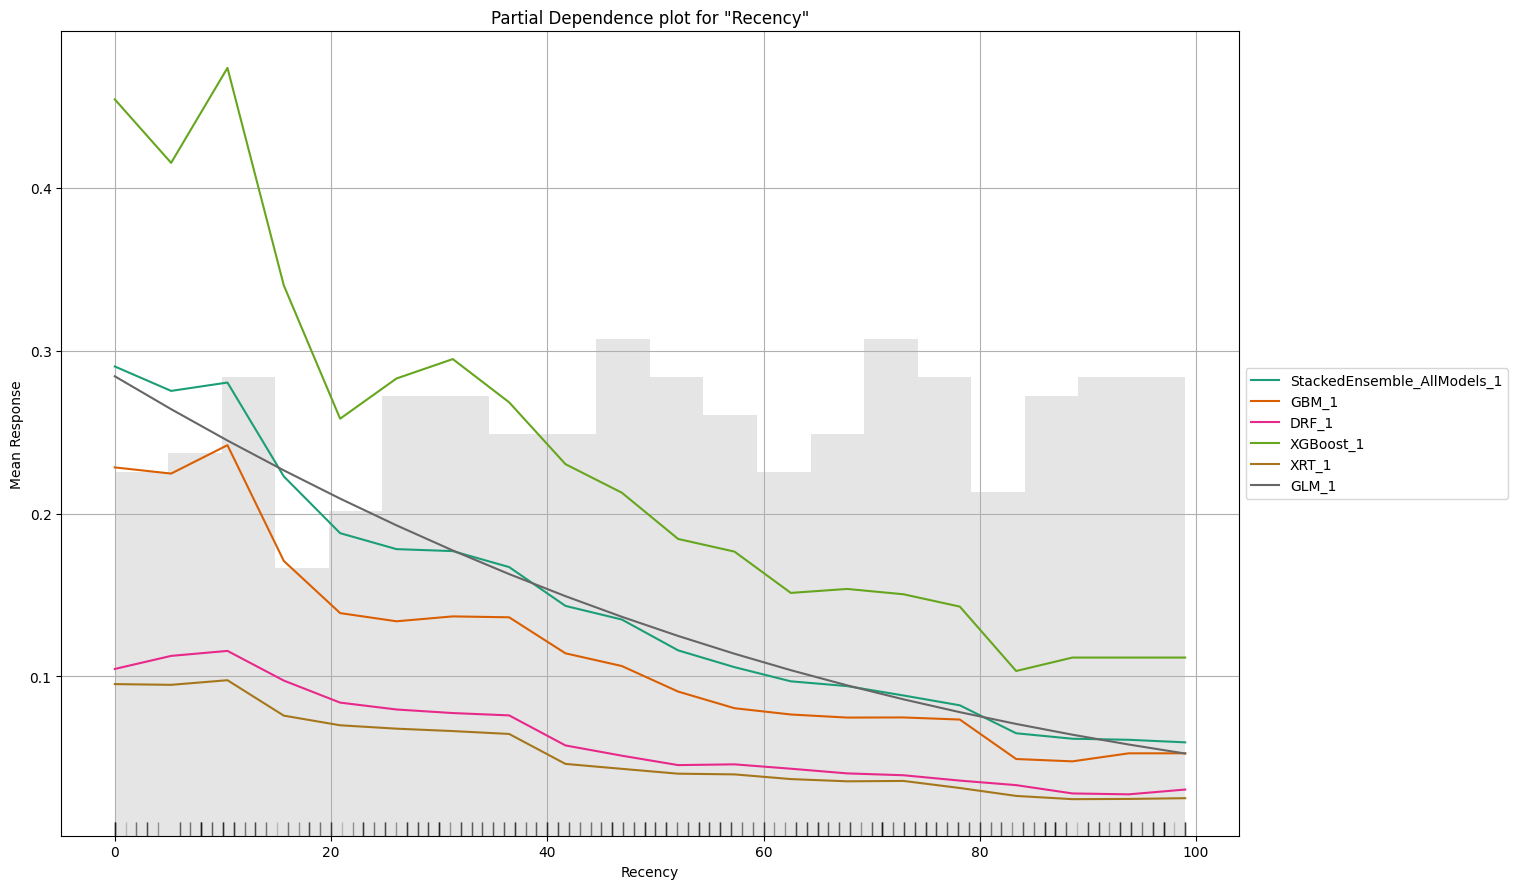

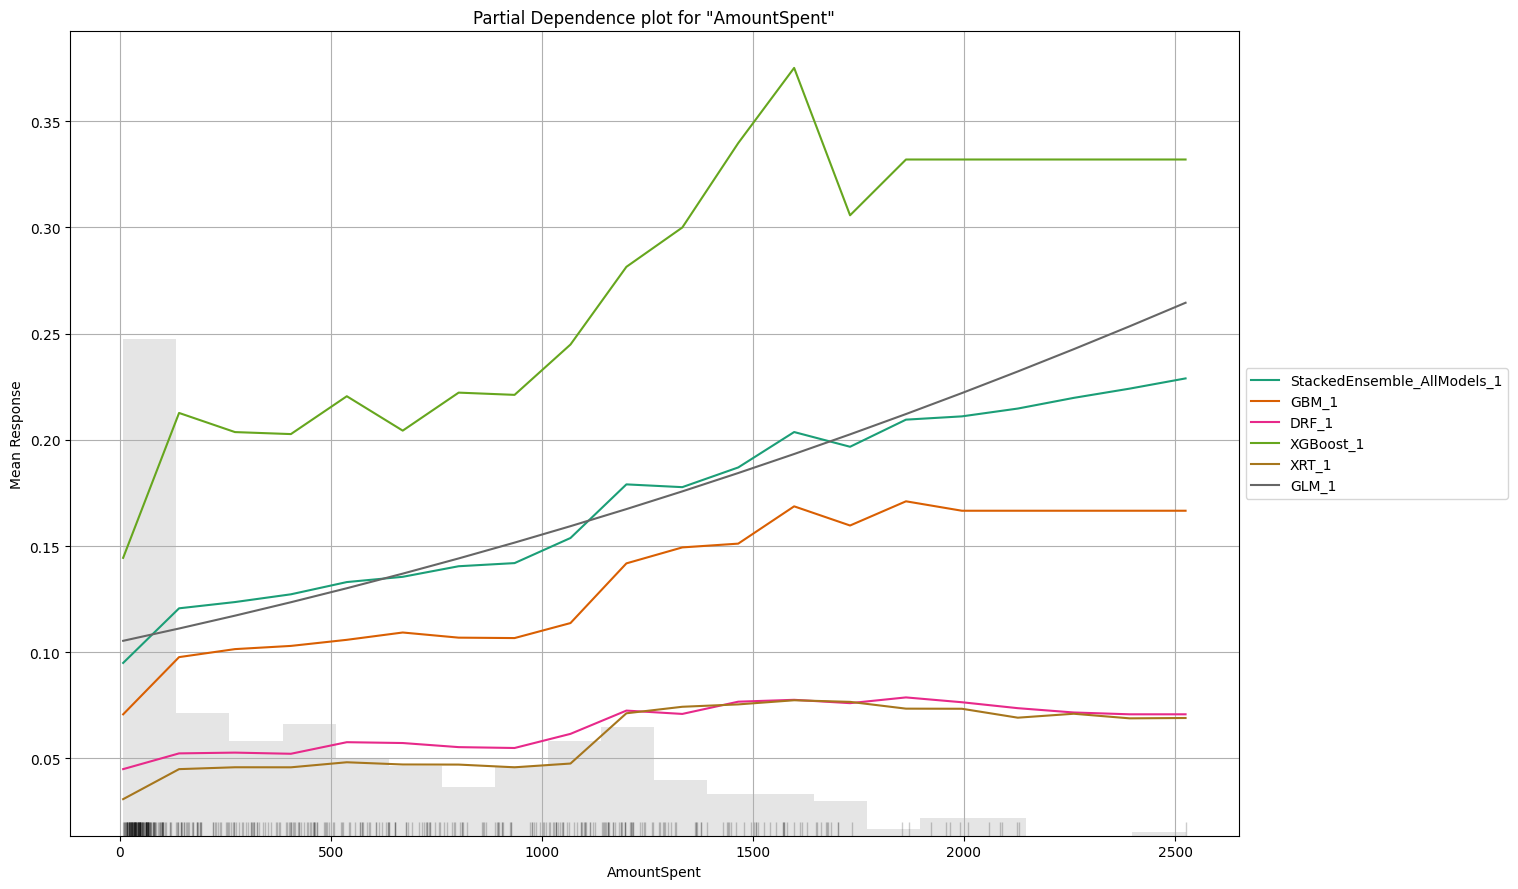

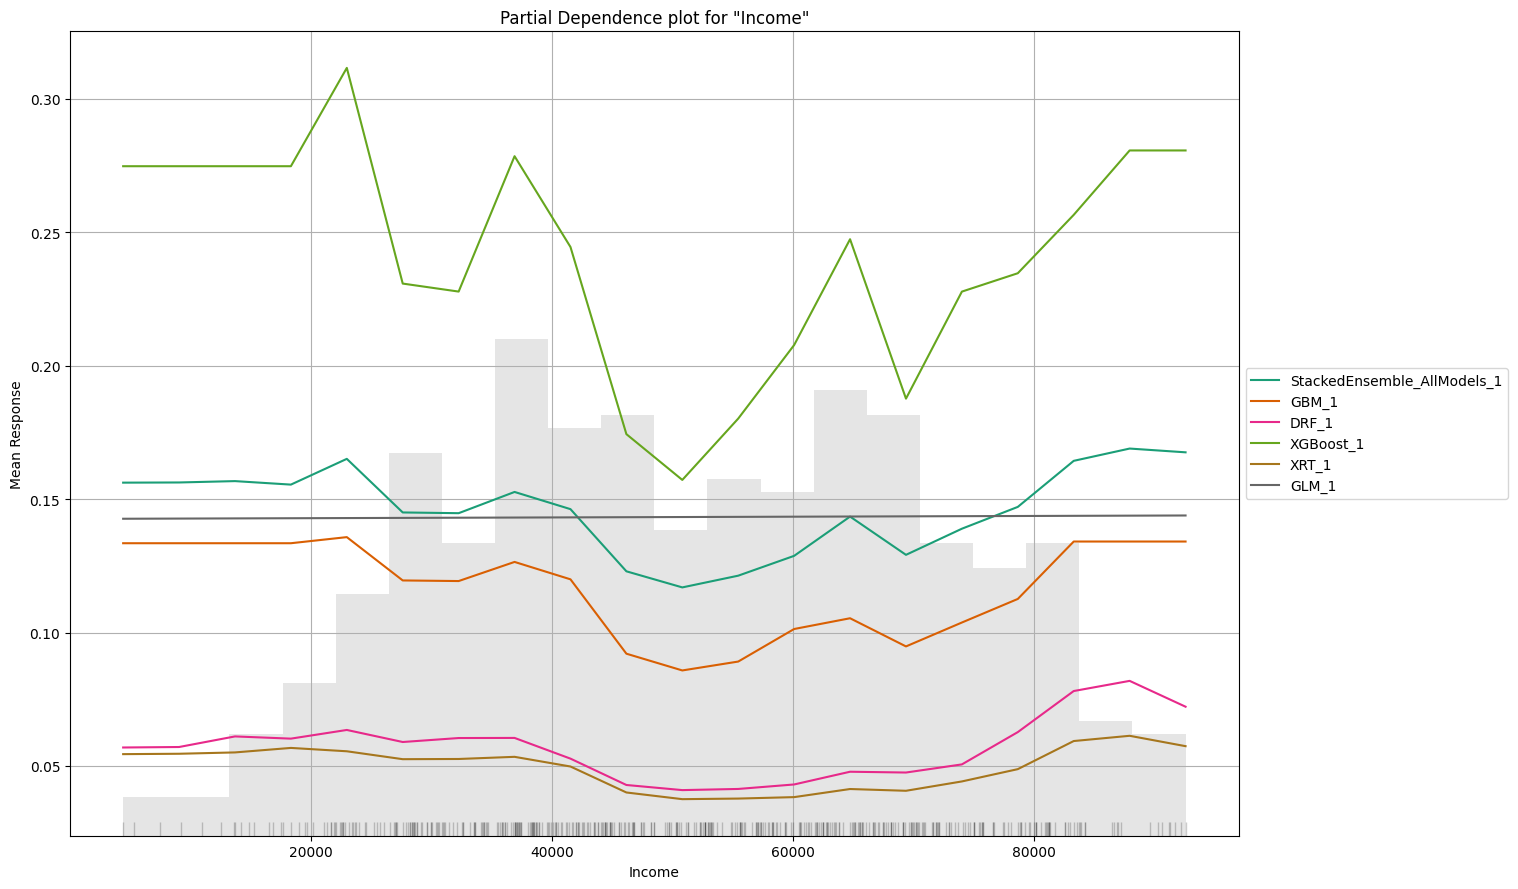

In [93]:
exa = aml.explain(test)

* **Is the relationship significant?**
  
  From the OLS method it was observed that p value for almost all variables was 0 except age, income and complain which suggests that all other relationships are very significant

* **Are any model assumptions violated?**

 no, the model is a multiclassification which did not violate any assumptions

* **Is there any multicollinearity in the model?**

 Multicollinearity can be determined by calculating VIF or correlation matrix, from our correlation matrix we can see that dummy variables for maritial status have high collinearity of -1 and +1 as it is expected for dummy variables. But we also have high collinearity between AmountPurchases, NumPurchased and Income

* **In the multivariate models are predictor variables independent of all the other predictor variables?**

 As stated before from correlation matrix not all variables are independent, Income, NumPurchased and AmtPurchased are somewhat dependant to a certain degree to each other

* **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**
  
  The variable importance ranked -
  1.   Prev_campaign
  2.   Dt_Customer
  3.   Recency
  4.   Amount Spent


* **Does the model make sense?**
  Yes, The model has low logloss, the confusion matrix shows few errors and accuracy close to 90%. Further the model can be improved by hyperparameter tuning
* **Does regularization help?**
  No, as stated above from the regularization results it did not help for this particular dataset
* Which independent variables are significant?
  Significant. independant variables -
  1.   Prev_campaign
  2.   Dt_Customer
  3.   Recency
  4.   Amount Spent
  5.   Income
  6.   Num web visits

* **Which hyperparameters are important?**
  
  The best hyperparameters for this model are:- col_sample_rate of 1.0, learn_rate of 0.10, max_depth of 5, and sample_rate of 0.9


In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = data
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables        VIF
0                     Age  20.380223
1               Education  11.220522
2                  Income  33.068648
3             Dt_Customer  52.219178
4                 Recency   4.104996
5       NumDealsPurchases   4.325739
6       NumWebVisitsMonth  13.635805
7                Complain   1.015311
8                Response   1.615249
9                Children   5.220138
10            AmountSpent  10.617816
11           NumPurchased  16.929596
12         Prev_campaigns   1.778180
13  Marital_Status_Couple   2.897638

# Comparision between SHAP and Partial Dependence Plot Analysis
SHAP uses the black-box model to calculate the marginal contribution to the prediction for each feature and then relies on the theoretically sound game theory concept of Shapley values to calculate the feature importance. In this way

1. PDP gives the extent of effect a variable has on the output by freezing the rest of them
2. SHAP gives how much each variable contributes to the prediction

We have to analyze our needs and then consider the tradeoff to select the best suitable interpretable method for the ML model

## Answers to questions

1. What is the question?

  The main problem is to determine if a customer would respond positively to a marketting campaign or not given his background and history with the store

2. What did you do?

  We have analysed the dataset, picked out features and interpreted those features by training various models and interpretability methods such as regression coefficients, Shap and partial dependency plots. We have also mapped out variable importance for each method

3. How well did it work?

  Logistic regression or a Decision tree by itself aren't the best methods but if combined in a stacked ensemble the resulting model works really well with our dataset and accurately predicts the customer response

4. What did you learn?

 We learned that we need to pick the correct hyper-parameters to improve the accuracy of the model. Regularization methods are not much effective with our dataset. The hypothesis that response would mainly depend on the previous campaign response and the spending power of the customer holds true. Different methods put different parameters at the top when it comes to importance of features in predicting the outcome

# Conclusion

Logistic Regression, Decision tree and AutoML giving stacked ensemble models to forecast consumer response to marketing campaigns was created. Some of the independent variables were thought to be ignored by correlation, p-values, and other tests. The variables from the dataset of the Marketing Campaign were trained and tested using the H20.ai framework. This produced the best model, "Stacked Emsemble," which included different GBM and XGBOOST models and had an accuracy of 89.9% for test data. The results indicate that the suggested model can assess and forecast if the client would respond positively to a certain level. The model has to be improved in future studies as the prediction accuracy is admittedly still constrained in several areas. In further investigation of the associated models, several methodologies, such as removing outliers and normalization or booster can help achieve better prediction. We have to analyze our needs and then consider the tradeoff to select the best suitable interpretable method for the ML model

# References

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

ChatGPT - https://chat.openai.com/chat


All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let others distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 Venkata Sairam Mandapati

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.